# 模块导入

In [1]:
#1.导入文字和表格模组
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH  #设置对象居中、对齐等。
from docx.enum.text import WD_TAB_ALIGNMENT,WD_TAB_LEADER,WD_LINE_SPACING  #设置制表符等
from docx.shared import Inches   #设置图像大小
from docx.shared import Pt,Cm   #设置像素、缩进等
from docx.shared import RGBColor    #设置字体颜色
from docx.shared import Length    #设置宽度
from docx.oxml.ns import qn  #设置中文版式
import os

from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.enum.text import WD_ALIGN_PARAGRAPH


#2.导入数据处理模组
import pymysql
import psycopg2
import pymysql.cursors
import pandas as pd
import numpy as np
from functools import reduce#计算求和
from decimal import Decimal#保证比例呈现两位小数
import re
import math #向上取整函数

#3.导入图像模组
from pyecharts.charts import Bar,Line,PictorialBar,Map,Pie,Sankey,Grid,Gauge,Radar,WordCloud,Liquid
from pyecharts import options as opts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from pyecharts.commons.utils import JsCode
from pyecharts.components import Image
from pyecharts.options import ComponentTitleOpts
import seaborn as sns
import matplotlib.pyplot as plt

# 变量声明

In [2]:
xxmc = '西安工业大学'  #学校名称
xxsf = '陕西省'           #学校省份
xxcs = '西安市'           #学校城市
bynd = 2022               #毕业年份
pic_path = r'X:\报告盘\01就业质量报告\☆☆2022年\报告指南\自动化\马梦珂\报告自动化\1228【调研分析】西安工业大学\\' #存储路径

#颜色设置
color_1 = '#147BC5' #主配色
color_2 = '#FBB03E' #主配色
color_3 = '#24AAE1' #主配色
color_4 = '#E3798D' 
color_5 = '#00ABCB' 

# xl_1 = '本科毕业生'
# xl_2 = '毕业研究生'
xl = '毕业研究生'#定义学历，独立版报告每个学历单独运行


#矢量图设置,可以在阿里巴巴矢量图网站自行查找需要的图标,复制SVG代码
bd = 'path://M945.08544 366.6432l-425.97376-183.1936a20.5312 20.5312 0 0 0-8.12544-1.6896c-2.7648 0-5.52448 0.5632-8.14592 1.6896L76.87168 366.6432c-8.98048 3.84512-14.92992 13.65504-14.92992 24.59136 0 10.9568 5.94944 20.74112 14.92992 24.60672L502.8352 599.04a20.29056 20.29056 0 0 0 16.27136 0l331.1872-142.43328v145.7152c-17.75104 9.40032-30.08512 29.8496-30.08512 53.62688 0 23.7824 12.33408 44.22656 30.08512 53.62688v50.83136h43.6224v-50.82112c17.76128-9.40032 30.1056-29.8496 30.1056-53.63712s-12.34432-44.2368-30.1056-53.63712V437.84704l51.16416-22.00576c8.97536-3.8656 14.9248-13.65504 14.9248-24.60672 0-10.93632-5.94944-20.74624-14.9248-24.59136z m-434.0992 269.16352a47.96928 47.96928 0 0 1-19.03104-3.95776L226.4064 517.632v157.70112c0 129.16224 193.65888 167.936 254.208 167.936h60.69248c45.35808 0 254.22848-38.77376 254.22848-167.936v-157.696l-265.55904 114.21184a47.76448 47.76448 0 0 1-18.9952 3.95776z'
sf = 'path://M0,10 L10,10 C5.5,10 5.5,5 5,0 C4.5,5 4.5,10 0,10 z'
male = 'path://M724.8 314.2c2.8 1.6 5.5 3.2 8.2 5.1l8.2 5.6 0.1 9.8c0.4 28.5-3 52.6-10.4 71.1-6.9 17-17.1 29.7-30.7 37.3-9.3 33.1-20.2 63.8-35.6 89.6-17.8 29.7-41.2 52.5-74.4 64.8-14.8 5.4-52.7 8-89.1 7.4-35.2-0.5-70.5-4-84.5-10.5-30.1-13.9-51.3-37.2-67.4-66.3-13.8-24.8-23.6-53.7-32.1-84.2-14.1-7.4-24.7-20-31.8-37.1-7.8-18.7-11.4-43.2-10.9-72.2l0.1-9.9 8.2-5.5c2.1-1.4 4.2-2.7 6.3-3.9-9.2-114.1-5.7-156.3 36.6-204.5 82.6-67.7 272-65.3 355.7-3.9 57 53.8 61 114.1 43.5 207.3zM551.3 644.1l1.2 26.1-15.5 25.6 21.6 141.8L647 647.5l134.7-4.6c69.6 65.8 114.2 220.8 103.2 321.9H134.2c1.9-88.8 18.2-240.4 106.6-317.6l121.7 1.1 114 188 21.4-140.6-15.5-25.5 1.2-26.1c29.5-1.6 38.2-1.6 67.7 0zM652 273.7c-53.5 10.5-133.2 19.6-196.2-15.8-24.2-13.6-59.7 14.3-88.7 11.4-9 17.8-15.7 37.3-19.6 58l-3.2 17.1-17.2-1.7c-3.2-0.3-6.5 0.1-10 1.3-1.6 0.5-3.1 1.1-4.7 1.9 0.5 19 3.1 34.7 8 46.5 4.3 10.4 10.4 17.1 18.2 19.6l10.1 3.1 2.8 10.1c8.4 31.3 17.9 60.8 31.2 84.8 12.3 22.3 28.1 40 50 50.1 9.2 4.2 38.4 6.6 69 7.1 32.5 0.5 64.9-1.3 75.6-5.2 24.1-8.9 41.4-26.1 54.9-48.6 14.5-24.2 24.8-54.9 33.8-88.6l2.6-9.6 9.6-3.3c7.6-2.7 13.5-9.6 17.6-20 4.7-11.7 7.3-27.2 7.7-45.8-1.4-0.7-2.8-1.3-4.2-1.7-3.4-1.1-6.6-1.7-9.7-1.5l-16.8 1.1-3.1-16.5c-3.8-19.2-9.7-37.2-17.7-53.8z m0 0'
female = 'path://M354.304 631.808c18.944-7.168 44.544-17.408 56.32-26.624 7.168-5.632 11.264-16.384 12.8-28.16-4.608-3.072-9.216-6.144-12.288-9.728-53.248-54.784-56.32-132.608-56.832-229.376 8.704 1.536 271.872 5.12 284.16 3.584 2.048 109.056-5.632 176.128-68.608 234.496l-1.024 1.024c2.048 12.288 6.144 23.04 12.8 28.16 12.8 9.728 35.84 20.992 51.2 28.16-29.696 108.544-66.048 172.544-103.936 195.584-5.632-20.48-6.144-44.544-0.512-72.192-4.608-2.048-9.216-3.584-14.336-5.632-5.12 6.656-9.728 13.312-13.824 20.48-4.096-6.656-8.704-13.824-13.824-20.48-4.608 2.048-9.216 3.584-14.336 5.632 5.632 29.184 5.12 54.272-1.536 75.776-41.984-19.968-82.944-88.064-116.224-200.704z m393.216 16.384c-9.216-28.672-16.384-64.512-9.728-95.232 16.384-74.24 3.584-138.752-5.12-159.744-20.992-51.2 2.56-101.888-6.656-140.8-14.848-62.464-41.984-105.984-86.016-135.68-60.928-40.96-151.552-37.888-230.4-20.48-69.12 14.848-134.656 49.152-130.56 107.008 3.072 41.984-4.608 71.168-19.968 92.16-13.824 19.456-15.872 39.424-12.8 60.416 9.216 54.272 48.128 83.968 26.624 136.704-18.944 47.616-41.984 124.928-44.544 169.472-31.232 11.776-66.56 26.112-103.936 39.936-28.672 52.736-38.4 125.952-32.768 268.8H890.88c2.56-111.616 1.024-221.184-40.448-296.96-31.744-7.168-68.608-16.896-102.912-25.6z'
#cube = 'path://M42.666667 128m53.333333 0l832 0q53.333333 0 53.333333 53.333333l0 661.333334q0 53.333333-53.333333 53.333333l-832 0q-53.333333 0-53.333333-53.333333l0-661.333334q0-53.333333 53.333333-53.333333Z'
cube = 'path://M62 62h900v900h-900v-900z'
box = 'path://M962 802H 62V 222h 900v 580z      M162 702h 793V 322H 70v 380z'
boy='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.875-229.25-512-512-512z m0 987.375c-262.5 0-475.375-212.875-475.375-475.375 0-126.125 50.125-247 139.25-336.125S390.769444 36.5 516.769444 36.5c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.5-475.375 475.5z M788.144444 691.625c2.5 8 4.25 16.25 5.125 24.625 1.625 10 2.375 20 2.375 30.125 0.125 9.625-0.875 19.25-2.75 28.75-1 7.25-3.625 14.25-7.625 20.375-5.5 4.625-12.125 7.875-19.125 9.375-12.75 3.5-25.625 6.25-38.625 8.25-15.5 2.5-32.625 5-51.75 7.25-19.125 2.25-37.875 4.25-57 5.875-19.125 1.625-37.5 2.75-55.375 3.5-17.875 0.75-33.5 1-47 1s-29.125-0.5-47-1.375c-17.875-0.875-35.875-2.125-54.625-3.5-18.75-1.375-37.5-3-55.75-4.875-18.375-1.875-35.5-4-50.625-6.25s-28.25-4.5-39-6.5c-6.875-0.75-13.625-3-19.5-6.625-6.875-8.75-10.625-19.625-10.75-30.75-2.125-22.5-1-45.25 3.25-67.375 1.625-14.375 9.125-27.375 20.75-35.875 11.75-8.625 24.75-15.25 38.625-19.625 14.75-4.875 30.25-9.125 46.625-12.75 14.875-3.125 29.125-8.75 42.25-16.625 7.875-4.375 15.25-9.75 21.875-16 4.875-4.25 8.75-9.375 11.5-15.25 2-5 3.125-10.5 3.125-16s-0.375-11.75-0.75-18.625c-0.25-9-4.125-17.5-10.75-23.5-6.75-5.875-13.75-11.625-20.75-17.25-4.25-3.125-7.625-7.25-10-12-2.875-5.375-5.5-10.75-8-16.25-2.625-6.5-4.875-13.125-6.75-19.875-0.75-0.875-2.375-2.5-4.375-4.875-1.875-3-3.625-6.125-5.125-9.375-2.625-5.5-5-11.125-6.75-17-2.125-6.5-3.75-13.125-4.75-19.875-0.875-4.875-0.75-10 0.375-14.875 0.25-4.625 1.5-9 3.625-13.125 0.125-16.25 1.125-32.375 3.125-48.5 2.25-14.75 5.5-29.25 9.625-43.5 4.25-15.375 11.5-29.75 21.5-42.125 8.5-10.875 18.375-20.5 29.5-28.75 10-7.5 21-13.375 32.625-17.625 11-4.125 22.25-7 33.875-8.625 11-1.5 22-2.375 33.125-2.375 9.375 0.625 18.75 2 27.875 4 6.125 1.25 12 3.125 17.5 5.875 4.375 2.125 8.375 5 12 8.375 3.125 3.125 6.375 6.5 10 9.625h14.375c4.5 0 8.875 0.625 13.125 1.75 4.625 1.375 8.875 3.625 12.75 6.625 5 4.125 9.5 8.75 13.5 13.875 11.25 13.375 19.875 28.75 25.5 45.25 5.25 15.25 9.25 30.75 12 46.625 2.5 16.75 4.125 33.625 4.75 50.5 1 2.625 1.625 5.5 2 8.25 0.375 3.25 0.75 7.125 1.25 11.75 0.375 5.75-0.125 11.625-1.25 17.25-0.5 7.375-2 14.75-4.375 21.75-1.5 4.375-3.875 8.375-6.75 12-2.125 3-5 5.375-8.375 6.875-1.75 6.875-4 13.5-6.75 19.875-2.375 5.5-4.75 11-7.625 16.25-2.5 4.75-6 8.875-10.375 12-8.375 6.5-15.5 12-20.75 16.25-6.25 6-10.375 13.875-11.5 22.5-1.25 6.375-1.625 12.875-1.25 19.375 0.5 7 2.5 13.75 5.625 19.875 3.75 7.375 9 13.875 15.5 19 9.125 7 19.375 12.375 30.25 16 11.5 4 24.25 8 37.875 11.5 13.5 3.5 27.125 7.375 39.875 11.75 12.125 4.125 23.625 9.875 34.25 17 9.5 6.375 16.75 15.875 20.625 26.625z m-240.375-22.75c1.5-2.625 1.625-5.875 0.375-8.625-1.375-3.125-3.25-6.125-5.625-8.625-2.75-2.75-5.625-5.75-9.125-9h-34.25c-3.125 2.75-5.875 5.75-8.375 9-2 2.25-3.625 4.875-4.75 7.625-1.25 2.375-1.125 5.375 0.375 7.625 3.25 6.5 6.375 12 8.75 17 2 4.375 4.875 8.25 8.375 11.375-1.25 4-2.375 10-4.375 17.625s-4 15.5-6 23.5c-2 8.125-3.125 15.75-4.375 22.875-1 5.375-1.5 10.75-1.625 16.25 0.125 3 1.25 6 3.25 8.25 2.5 3.5 5.125 6.875 8 10 2.625 3.25 5.75 6.125 9.125 8.625 4.875 4.625 12.625 4.625 17.5 0 3.75-2.375 7.125-5 10.375-8 3.125-2.875 5.75-6.125 8-9.625 2-2.5 3.25-5.5 3.625-8.625-0.375-4.75-1.125-9.5-2.375-14.125-1.625-6.75-3.125-14.125-4.75-22.5-1.625-8.25-3.625-16.375-5.625-24.25-2-7.75-3.625-14.125-5.125-18.75 3.25-2.875 6.125-6.25 8.375-10 2.75-4.375 6.25-10.25 10.25-17.625z'
girl='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.75-229.125-512-512-512z m0 987.375c-262.5 0-475.375-212.75-475.375-475.375C41.394444 385.875 91.519444 265 180.644444 175.875S390.769444 36.625 516.769444 36.625c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.375-475.375 475.375z M788.019444 687c2.625 7.875 4.5 15.875 5.625 24.125 1.25 9.875 1.875 19.75 2 29.625 0 9.5-0.75 19-2.375 28.375-0.875 7.25-3.5 14.25-7.625 20.375-5.625 4.75-12.25 7.875-19.5 9.25-10.375 3.125-23.875 6.375-39.875 9.5-15.875 3.125-33.875 6.25-53.375 9.25-19.5 3-39.375 5.5-59 7.625-19.5 2.125-38.625 3.75-57 4.875-18.375 1.125-33.875 1.625-47.375 1.625-13.5 0-28.625-0.625-46.25-2-17.5-1.25-34.625-2.875-53.375-4.75-18.75-1.875-36.25-4-54.125-6.75-17.875-2.75-34.25-5.125-49-8-14.75-2.75-27.125-5.25-37-7.625-6.875-1.125-13.5-3.375-19.5-6.75-7-8.75-10.875-19.625-11.125-30.875-2.125-22.375-1-45 3.125-67.125 2.125-14 9.75-26.625 21.125-35 11.875-8.375 25.125-14.875 39-19.125 14.75-4.625 30.25-8.875 46.25-12.75 14.875-3.25 29.125-8.875 42.25-16.5 7.5-4.125 14.625-9 21.125-14.625 4.5-3.875 8.25-8.5 11.125-13.625 2.25-4.25 3.625-8.875 4.375-13.625 0.75-5.125 0.875-10.25 0.375-15.25l-30.625-4.625h-119.5c20.5-22.25 34.375-49.875 39.875-79.625-0.25-59.375 8.375-118.375 25.5-175.25 9.5-21.5 23.375-40.75 40.625-56.625 33.875-36.625 83.625-54.125 133-47 64.125-7.25 126.5 24 159.25 79.625 24.875 63.5 38.25 130.875 39.875 199.125 0.875 31.125 15.5 60.25 39.875 79.625h-119.5l-31.875 4.75c-0.375 5.625 0 11.375 1.25 16.875 1.375 6 3.75 11.75 7.125 16.875 4.5 6.125 9.875 11.5 15.875 15.875 8.5 5.75 17.75 10.25 27.5 13.375 12.125 4.5 24.5 8.375 37 11.5 13.5 3.25 26.75 7.125 39.875 11.75 12.125 4.125 23.625 9.75 34.25 16.875 9.625 6.375 16.875 15.75 20.75 26.625z m-266.5 102.375c3.75-0.5 7.25-1.875 10.375-4 4.875-2.875 9.5-6.25 14-9.875 4.375-3.5 8.5-7.375 12.375-11.375 2.5-2.375 4.375-5.5 5.125-8.875-0.375-4.5-1-9-2-13.375-1.625-6.375-3.125-13.375-5.125-21-2-7.625-3.625-15-5.625-22.25-1.25-6-2.875-12-4.75-17.75 4.625-3.25 8.75-7.125 12.375-11.5 3-3.5 4.875-8 5.125-12.75-0.125-3.75-1.5-7.375-4-10.125-2.625-3.5-5.5-6.625-8.75-9.5-3.625-3-8-5.875-12.375-8.875h-35c-4 3-8 6-11.125 8.875-2.875 2.75-5.5 5.875-7.625 9.25-2.25 3-3.5 6.75-3.625 10.5 0.625 3.625 2.375 6.875 4.75 9.5 3.875 4.625 8.125 8.875 12.75 12.75-2 5.25-3.75 10.75-5.125 16.25-2 7-4.375 14.375-6.75 22.25-2.375 7.875-4.375 15.25-6 22.25-1.375 5.125-2.125 10.375-2.375 15.625 0.875 3.375 2.625 6.5 5.125 8.875 4 4.125 8.25 7.875 12.75 11.375 4.625 3.75 9.5 7 14.75 9.875 3.25 2.125 6.875 3.5 10.75 3.875z'
location='path://M528 32C325.056 32 160 196.8 160 399.36c0 75.2 22.656 147.584 65.024 208.48 2.112 3.648 4.256 7.168 6.784 10.592l268.608 353.472c7.296 8.096 17.088 12.576 27.584 12.576 10.368 0 20.224-4.512 28.768-14.08l267.36-352c2.624-3.52 4.896-7.36 6.112-9.6A364.864 364.864 0 0 0 896 399.36C896 196.8 730.912 32 528 32z m0 498.72a131.52 131.52 0 0 1-131.456-131.232 131.488 131.488 0 0 1 262.88 0 131.52 131.52 0 0 1-131.424 131.2z'
airplane='path://M965.40416 342.76608c-19.50976-52.24704-47.744-100.41472-83.92064-143.16288-18.26688-21.58592-50.57408-24.27392-72.15872-6.0096-21.58464 18.26688-24.2752 50.5728-6.00832 72.15872C861.4336 334.42816 893.44 421.88032 893.44 512c0 210.32576-171.11424 381.44-381.44 381.44-210.32704 0-381.44-171.11424-381.44-381.44 0-210.32704 171.11296-381.44 381.44-381.44 60.48896 0 118.30784 13.72672 171.85152 40.8 25.2288 12.75648 56.03328 2.64704 68.7936-22.58816 12.76032-25.23392 2.64576-56.03456-22.58816-68.7936C662.05312 45.5936 588.68992 28.16 512 28.16c-65.29536 0-128.66432 12.8-188.34688 38.04416-57.62176 24.37248-109.36064 59.2512-153.7792 103.66976-44.41856 44.41856-79.29856 96.15744-103.66976 153.77792C40.96 383.3344 28.16 446.70464 28.16 512c0 65.29536 12.8 128.6656 38.04416 188.34688 24.37248 57.62176 59.2512 109.36064 103.66976 153.7792s96.15744 79.29856 153.7792 103.66976C383.33568 983.04 446.70464 995.84 512 995.84c65.29536 0 128.6656-12.8 188.34816-38.04416 57.62176-24.3712 109.36064-59.2512 153.77792-103.66976 44.41856-44.41856 79.29856-96.15744 103.66976-153.7792C983.04 640.6656 995.84 577.29536 995.84 512 995.84 453.79328 985.6 396.85504 965.40416 342.76608z  M718.52672 248.7872c-28.15104 3.3984-50.06336 18.60608-68.33152 39.93472-17.31456 20.21376-35.4048 39.76192-53.09312 59.65568-9.1136 10.24896-17.9328 20.76672-27.22688 30.848-3.22944 3.50464-5.80992 8.89984-12.31232 7.28448-3.84896-0.95616-7.7504-1.69984-11.59936-2.65472-36.48128-9.04064-72.96128-18.08512-109.43232-27.168-60.3712-15.03616-120.73344-30.10816-181.10592-45.14432-9.62304-2.39616-18.24896 0.9856-22.54336 9.56544-3.24864 6.49216-4.54016 14.9376 4.33152 22.69952 5.83808 5.10848 12.08832 9.75232 18.2336 14.5024 19.91424 15.39456 39.84512 30.76864 59.808 46.10048 16.80256 12.90496 33.6896 25.69984 50.48192 38.61632 19.79008 15.22432 39.51104 30.53696 59.2768 45.79328 8.96128 6.91712 17.95584 13.78944 27.40352 21.04064-19.81568 21.91744-39.24864 43.34848-58.5984 64.85376-4.78592 5.31968-8.928 11.26912-14.04416 16.22784-5.04192 4.88704-10.34752 11.35488-16.57088 12.86272-32.064 7.76576-64.45824 14.1632-96.74112 21.02912-8.75776 1.8624-13.8624 8.44928-14.24256 17.36192-0.544 12.77568 5.64864 16.6592 15.6544 20.66688 25.02016 10.0224 50.08896 19.92704 75.02592 30.15552 2.44352 1.00224 4.96896 3.5456 5.9968 5.98784 11.0208 26.20032 21.80864 52.50048 32.52992 78.82496 4.96 12.18176 18.5408 14.64064 27.68256 9.10848 7.41632-4.48896 8.10752-11.79648 9.67168-19.33568 5.04576-24.3264 10.70976-48.52608 16.34048-72.72704 2.4192-10.39616 2.5728-21.76256 12.8256-28.92416 5.67168-3.9616 10.81984-8.71168 15.99488-13.34016 21.27232-19.02336 42.45248-38.15168 63.70816-57.19424 1.73824-1.55776 3.80032-2.752 5.95072-4.288 2.752 3.44064 5.02272 6.20288 7.21152 9.02784 14.5216 18.73664 29.00352 37.50272 43.5392 56.22784 10.68288 13.76256 21.39776 27.49952 32.15232 41.20448 14.64832 18.66496 29.36576 37.27488 44.02304 55.93344 14.13248 17.9904 28.14464 36.07424 42.3808 53.97888 4.43392 5.57696 14.08384 8.33408 20.02688 5.9008 6.4384-2.6368 14.7328-8.84864 12.9088-18.06464-1.53728-7.76576-3.0528-15.55328-5.02528-23.21664-11.86048-46.09408-23.89504-92.14208-35.7824-138.22976-12.672-49.12256-25.27744-98.26176-37.76256-147.43168-0.48256-1.90208-0.07552-4.68096 1.056-6.208 2.2592-3.04768 5.19168-5.64224 8.05376-8.18944 18.61248-16.56704 37.248-33.1072 55.94496-49.57952 9.17248-8.08064 18.71104-15.76064 27.68384-24.05376 8.83712-8.16768 17.97888-16.22144 25.55648-25.49376 16.64768-20.36992 22.62272-44.4032 20.3456-70.34624-1.32224-15.0592-7.29728-28.56576-18.59968-38.81472C760.5312 248.56064 739.60704 246.24256 718.52672 248.7872zM761.84064 323.68128c1.86496 19.5456-6.144 33.90208-21.51552 44.9664-3.6032 2.59456-7.03616 2.65856-10.54464-0.34688-8.30976-7.11808-16.67712-14.17088-25.08672-21.17376-9.52448-7.93344-19.16416-15.72864-28.6592-23.69792-3.52768-2.96064-6.2976-5.32608-3.69536-11.50208 6.65472-15.78752 25.36192-30.99392 43.86688-29.17632C737.91744 281.6704 759.61984 300.41984 761.84064 323.68128z'
star = 'path://M956.741665 419.885046c-5.241374-16.200984-19.178805-28.054963-36.034704-30.496571l-254.931157-44.791136L551.77233 115.15981c-7.444553-15.248286-22.992667-24.898063-40.025599-24.898063-17.036002 0-32.522718 9.648754-40.146349 24.898063L357.655238 344.597339 102.784456 390.936737c-16.856923 2.442632-30.852682 14.295588-36.035728 30.496571-5.300726 16.141632-0.893346 33.951253 11.317767 45.804209l184.407963 170.410158-48.186466 247.662613c-2.859118 16.737196 3.930519 33.833573 17.809621 43.720757 13.244652 13.244652 40.562834 6.90834 47.053666 3.514033l232.595452-113.64634L742.85225 932.545078c6.490831 3.394307 32.166607 11.373025 47.052642-3.514033 13.760398-9.887184 20.787442-26.982538 17.869996-43.720757L761.077334 637.647675l184.467315-172.018795C957.69641 453.836299 962.043415 436.026678 956.741665 419.885046z'

# 创建字典

In [3]:
# 字典
index_dict = {
            #基础指标
            'myd':'满意','ppd':'匹配','xgd':'相关','tjd':'愿意','gzd':'关注','xb':'性别','yx':'院系','zy':'专业','sysf':'生源省份',
            'mz':'民族','jyq':'乐观','zqj':'乐观','zsp':'满意','jjx':'满意','lzt':'乐观','sjy':'满意','yjy':'满意','ljy':'满意','zyq':'乐观',
            #派遣数据
            'sxgxlx':'升学院校类型','sxgxbq':'升学院校层次',
            #分数指标
            '5':'非常高','4':'高','3':'比较高','2':'不太高','1':'不高',5:'非常',4:'',3:'比较',
            #教育教学调研
            'dy_cyzyxgd':'创业专业相关度','dy_cyyy':'创业原因','dy_cylx':'创业类型','dy_cyfs':'创业方式',
              'dy_cykn':'创业困难','dy_cyfwjy':'创业服务建议','dy_mxmyd':'母校满意度','dy_mxtjd':'母校推荐度','dy_jyjx':'教育教学',
              'dy_mxtjd':'母校推荐度','dy_jyjx_tsjy':'通识教育满意度','dy_tsjyjy':'通识教育建议','dy_jyjx_zyjy':'专业教育满意度','dy_zykcjy':'专业教育建议',
             'dy_jyjx_sjjx':'实践教学满意度','dy_sjjxjy':'实践教学建议','dy_zynljy':'职业能力教育建议','dy_zzdgjjy':'师资水平建议',
             'dy_jyjx_zynljy':'职业能力教育满意度','dy_jyjx_szsp':'师资水平满意度','dy_jyjx_xsjz':'学术讲座满意度','dy_jyjx_jxss':'教学设施满意度',
            'dy_jyjx_khfs':'考核方式满意度','dy_sjjxmyd':'实践教学满意度',
            'dy_sjjx_kcsy':'课程实验','dy_sjjx_kcsyx':'课程实用性','dy_sjjx_sjkbz':'实践课比重','dy_sjjx_bylw':'毕业论文',
             'dy_sjjx_sys':'实验室的使用与管理','dy_kcszjy':'课程设置建议','dy_szsp':'师资水平满意度','dy_szsp_jxtd':'教学态度满意度',
             'dy_szsp_jxnr':'教学内容满意度','dy_szsp_jxff':'教学方法、方式满意度','dy_qzwt':'求职问题','dy_zxjl':'在校经历',
             'dy_szsp_sshd':'师生互动满意度','dy_szsp_zynl':'专业知识能力满意度',
             'dy_jycyfwmyd':'就业创业服务满意度','dy_jycyfwjy':'就业创业服务建议','dy_jycy':'就业创业',
             'dy_jycy_zcxc':'政策宣传与讲解','dy_jycy_xxtg':'信息提供与发布','dy_jycy_zyzx':'职业选择咨询/辅导','dy_jycy_jnpx':'就业/创业技能培训','dy_jycy_xlts':'求职心理调适','dy_jycy_mszd':'面试指导与训练',
             'dy_jycy_sxzd':'升学指导','dy_jycy_lxzd':'留学指导','dy_jycy_kc':'就业/创业课程','dy_jycy_xssxh':'线上双选会','dy_jycy_xyzp':'校园招聘活动','dy_jycy_jysx':'就业手续办理','dy_jycy_knbf':'就业困难群体帮扶',
              #就业调研
              '自主创业':'zzcy','dwhy':'单位行业','zzcy':'自主创业','sfmc':'所在省份','dy_lzcs':'离职次数','dy_jyqjyq':'专业前景预期',
              'dy_jymyd':'就业满意度','dy_jyzyxgd':'就业专业相关度','dy_jyjx_zhmyd':'教育教学满意度','dy_jyqs':'就业歧视',
              'dy_jyzybxgyy':'就业专业不相关原因','dy_zwppd':'职业期待匹配度','dy_xzmyd':'薪资满意度','dy_jyyx':'月薪',
              'dy_jypjxz':'平均月薪','dy_shbz':'社会保障','dy_gwfzqj':'发展前景预期','dy_qwyz':'期望月薪',
              'dy_shbzmyd':'社会保障满意度','dy_dwpj':'岗位评价','dy_dwzmd':'单位知名度','dy_pxjh':'培训机会','dy_jskj':'晋升空间',
              'dy_gzhj':'工作环境','dy_gzzzx':'工作自主性','dy_gzyl':'工作压力','dy_gzwdx':'工作稳定性','dy_gwfzqj':'岗位发展前景',
              'dy_gzdd':'工作地点','dy_qywh':'企业文化','dy_gzfw':'工作氛围','dy_dwzhmyd':'单位综合评价','dy_zyfzyq':'职业发展预期',
              'dy_lzyy':'离职原因','dy_gzys':'求职关注因素','dy_gzys_xcsp':'薪酬水平','dy_gzys_shbz':'社会保障',
              'dy_gzys_gzwdx':'工作稳定度','dy_gzys_gzcs':'工作城市','dy_gzys_dwsw':'单位社会声望','dy_gzys_gzhj':'工作环境',
              'dy_gzys_fzkj':'发展空间','dy_gzys_jrqw':'父母家人期望','dy_gzys_rjgx':'人际关系','dy_gzys_zydk':'专业对口',
              'dy_gzys_grxq':'个人兴趣','dy_gzys_rczc':'人才政策','dy_qztj':'求职途径','dy_offer':'offer数','dy_qzsc':'求职时长',
              'dy_wjyyy':'未就业原因','dy_qwdwlx':'期望单位类型','dy_qwjyss':'期望就业省市','dy_cgcjyy':'出国出境原因',
              'dy_qwbf':'期望帮扶','dy_nltsxq':'期望求职帮助','dy_jxszzyxgd':'继续深造与专业相关度','dy_gnsxyy':'国内升学原因',
              'dy_yqyx_zygh':'职业规划影响','dy_yqyx_xlzt':'就业乐观度','dy_zyzylx':'自由职业类型','dy_zyzyyy':'自由职业原因','dy_lhjy_fs':'灵活就业方式','dy_lhjy_gzts':'灵活就业工作天数','dy_lhjy_gzsc':'灵活就业工作时长','dy_lhjy_gh':'灵活就业规划',
              #单位调研
              'cdy_dwgm':'单位规模','cdy_dwxz':'单位性质','cdy_dwhy':'单位行业','cdy_dwszd':'单位所在地','cdy_zpqd':'招聘渠道',
              'cdy_kzys':'关注因素','cdy_zpxz':'招聘薪酬范围','cdy_zygzd':'专业关注度','cdy_rcpyppd':'人才培养认同度',
              'cdy_bysmyd':'毕业生满意度','cdy_rcpyjy':'人才培养建议','cdy_lxzpyy':'来校招聘原因','cdy_bysmyd_xxhq':'信息获取能力',
              'cdy_bysmyd_zynl':'专业能力','cdy_bysmyd_sjnl':'实践能力','cdy_bysmyd_fxjjnl':'分析和解决问题能力','cdy_bysmyd_cxnl':'创新能力','cdy_bysmyd_xxnl':'学习能力','cdy_bysmyd_zwgl':'自我管理能力','cdy_bysmyd_gtnl':'沟通能力',
              'cdy_bysmyd_rjjw':'人际交往能力','cdy_bysmyd_tdhz':'团队合作能力','cdy_bysmyd_jhzz':'计划组织能力','cdy_bysmyd_cjdj':'成就动机','cdy_bysmyd_zygh':'职业规划','cdy_bysmyd_gwlj':'岗位理解','cdy_bysmyd_zrg':'责任感','cdy_bysmyd_cxd':'诚信度','cdy_bysmyd_zxd':'自信度','cdy_bysmyd_yzl':'意志力',
              'cdy_byspj':'毕业生评价','cdy_gwsysj':'岗位适应时间','cdy_lzqk':'离职情况','cdy_lzyy':'离职原因','cdy_zpkn':'招聘困难',
              'cdy_jyfwmyd':'就业服务满意度','cdy_jyfwjy':'就业服务建议','cdy_jyfwpj':'就业服务评价','cdy_jyfwpj_xszp':'线上招聘统筹主持','cdy_jyfwpj_wzjs':'网站建设及信息服务','cdy_jyfwpj_dagl':'档案管理及传递','cdy_jyfwpj_cdap':'招聘场地安排对接','cdy_jyfwpj_xycd':'招聘响应程度','cdy_jyfwpj_gxfw':'个性化服务'}

# 连接数据库

In [4]:
#连接PostgreSQL数据库
conn_3 = psycopg2.connect(database="weyon", #数据库名
                        user="LTAI5tLAtRZDhcHSaW3mYJsx", #用户名
                        password="foaMQRl3Nr5KLccBi4f3vNIymQDN0Z", #用户密码
                        host="lightning.cn-shenzhen.maxcompute.aliyun.com", #主机
                        port="443") #端口信息

#连接dw_database数据库
conn=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='dw_database'#数据库名称
,charset='utf8' # 字符编码
)

#连接warehouse数据库
conn_1=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='warehouse'#数据库名称
,charset='utf8' # 字符编码
)

#连接yun-campusjob数据库
conn_2=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='yun-campusjob'#数据库名称
,charset='utf8' # 字符编码
)

# 数据库取数

In [5]:
#派遣数据
sql_jy =f'''
    SELECT * FROM dw_s_employment_auto
    where xxmc = '{xxmc}' and substring(bynd,1,4) = '{bynd}'
    '''
df_jy = pd.read_sql(sql=sql_jy, con=conn)

# sql_hndy = f'''
#     SELECT * FROM dw_s_short_survey_hunan_province_auto 
#     where dy_xxmc = '{xxmc}'
#     '''
# df_hndy = pd.read_sql(sql=sql_hndy,con=conn) #取出湖南省调研数据

#毕业生调研数据
sql_dy = f'''
    SELECT * FROM dw_2022_s_short_survey_auto
    where dy_xxmc = '{xxmc}'
    and dy_xl ='{xl}'
     '''
df_dy = pd.read_sql(sql=sql_dy,con=conn)

#单位调研数据
sql_dw = f'''
    SELECT * FROM dw_2022_c_short_survey_auto
    where cdy_xxmc = '{xxmc}'
    '''
df_dw = pd.read_sql(sql=sql_dw,con=conn)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df_dw.tail(3)

,cdy_nf,cdy_ybid,cdy_gsmc,cdy_hrxm,cdy_hrlxfs,cdy_hryxdz,cdy_sfpy,cdy_dwxz,cdy_dwhy,cdy_dwszd,...,cdy_jyfwpj_xszp,cdy_jyfwpj_wzjs,cdy_jyfwpj_dagl,cdy_jyfwpj_cdap,cdy_jyfwpj_xycd,cdy_jyfwpj_gxfw,cdy_jyfwjy,cdy_pyyy,cdy_qtjy,cdy_xxmc
196,2022,141881,陕西舞阳钢铁销售有限责任公司,宇洁,13892860051,yujie@sx5y.com,是,民营企业,批发和零售业,陕西,...,5,5,5,5,5,5,增加校园招聘会场次;加大对应届毕业生的推荐力度,5,无,西安工业大学
197,2022,141860,信华信技术股份有限公司,王美琳,18525557682,campus@dhc.com.cn,否,三资企业,信息传输、软件和信息技术服务业,辽宁,...,5,5,5,5,5,5,增加校园招聘会场次;加强校企沟通;加大对应届毕业生的推荐力度,5,希望能与就业办负责人建立校企合作联络,西安工业大学
198,2022,22271,想念食品股份有限公司,陈老师,15537725675,xnfoodhr@163.com,否,三资企业,制造业,河南,...,4,5,5,5,4,5,增加校园招聘会场次;及时更新发布招聘信息;加强宣传力度,5,无,西安工业大学


In [7]:
df_dy.tail(3)

,dy_ybid,dy_xxmc,dy_yx,dy_xl,dy_xl_c,dy_zy,dy_xm,dy_xh,dy_bj,dy_sfzhm,...,dy_jycy_lxzd,dy_jycy_kc,dy_jycy_xssxh,dy_jycy_xyzp,dy_jycy_jysx,dy_jycy_knbf,dy_mxfzjy,dy_offtime,dy_remark,dy_sfslb
269,3034196,西安工业大学,文学院,毕业研究生,硕士毕业生,新闻与传播,刘朵,1908310658,None,612322199710173426,...,5,5,5,5,5,5,没有意见，一切都好。虽有遗憾，但是遇见了最好的老师，最好的朋友。给母校点赞,,,None
270,3055571,西安工业大学,电子信息工程学院,毕业研究生,硕士毕业生,通信与信息系统,邓兰鸽,1904210304,None,610104199604080626,...,5,5,5,5,5,5,无,,,None
271,3033844,西安工业大学,材料与化工学院,毕业研究生,硕士毕业生,材料工程,王恒,1903310292,None,61042219980113141X,...,4,4,4,4,4,4,无,,,None


# 自定义函数

In [8]:
# 自定义函数

def pysqldf(a):
    return sqldf(a,globals())


def format_to(indexname,goal_list,change):#取数长度不同后的归一化处理，但是不一定通用，对于缺乏数据的地方会用第三个变量机型填补填补
    a=[]
    for i in indexname:
        try:
            a.append(goal_list[i])
        except:
            a.append(change)
    return a 

def write_zw(content,style='正文段落文本'):#传入一个字符串格式，将你要写的题注或者图注放入即可
    b=document.add_paragraph(content,style=style)
    b

    
def write_tz(content,style='标准题注'):#传入一个字符串格式，将你要写的题注或者图注放入即可
    b=document.add_paragraph(content,style=style)
    b

    
def add_pic(name,size):
    a=document.add_paragraph()
    b=a.add_run().add_picture(pic_path+f'{name}'+'.png',width=Cm(size))
    a.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

    
def  table_format ():
    for a in table.rows:
        a.height = Cm(0.5)
        for b in a.cells:
            b.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
            b.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            for c in b.paragraphs:
                c.paragraph_format.first_line_indent = Pt(0)
                c.paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
                c.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER 
                c.paragraph_format.line_spacing=1
                c.paragraph_format.space_before=Pt(0)
                c.paragraph_format.space_after=Pt(0)
                for item in c.runs:
                    item.font.name = 'Times New Roman'  # 英文字体设置
                    item._element.rPr.rFonts.set(qn('w:eastAsia'), '宋体')
                    item.font.size=Pt(9)
                    item.font.no_proof=True
                    item.font.no_proof=True#无视系统检索报错的下划线

                    
def list_sum(tolist):#解决列表里有'-'求和的情况
    a=0
    for i in range(len(tolist)):
        if tolist[i]=='-':
            pass
        else:
            a+=tolist[i]
    return a

def saveDatatoDB(i):        
    comand = '''
        INSERT INTO bzcwz VALUES('%s','%s','%s','%s','%s')

    '''%(escape_string(i[0]),escape_string(i[1]),escape_string(i[2]),escape_string(i[3]),escape_string(i[4]))
    cursor.execute(comand)
    conn_1.commit()
    print(i)    

def jylb_calculate(a):
    if df_jy[df_jy["jylb"].map(lambda x:x in (a))].count()['xh'] == 0:
        p =(f"无{a}")
        data = df_jy[df_jy["jylb"].map(lambda x:x in (a))]
        return p,data
    else:
        data = df_jy[df_jy["jylb"].map(lambda x:x in (a))]
        rs = df_jy[df_jy["jylb"].map(lambda x:x in (a))].count()['xh']
        ratio = round(rs/df_jy.count()["xh"]*100,2)
        zy = data['zy'].nunique()
        p =(f'毕业生中{a}{rs}人，{a}率{ratio:.2f}%，分布在{zy}个专业。')
        return p,data,ratio

def calculate_index(a,b):
    if jylb_calculate(b)[1][f'{a}'].count()['xh'] == 0 :
        return (f"无{a}")
    else:
        locals()[f'{a}_count']= jylb_calculate(b)[1].groupby(a).count()['xh'].sort_index(ascending=False)
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/locals()[f'{a}_count'].sum()*100,2)
        return locals()[f'{a}_ratio']


def calculate_values(a,b):
    data =jylb_calculate(b)[1]
    if data[a].count() == 0 :
        return (f"无{a}")
    else:
        locals()[f'{a}_count']= data.groupby(a).count()['xh'].sort_values(ascending=False)
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/locals()[f'{a}_count'].sum()*100,2)
        p = topthree(locals()[f'{a}_count'],locals()[f'{a}_ratio'],index_dict[b])
        p = p.split(b)[0]+b+index_dict[a]+p.split(b)[1]
        return p
    
#查找特定维度的总数与占比
def map_type(index_name,types):#index_name表示字段名，types表示具体数值，如index_name='dwjy',types='是'
    if index_name.find('_') == -1 :
        count = df_jy[df_jy[index_name].map(lambda x:x in (types))].count()["xh"]#待就业总人数
        ratio = round(count/df_jy["xh"].count()*100,2)#待就业比例
    elif index_name.split('_')[0] =='dy':
        count = df_dy[df_dy[index_name].map(lambda x:x in (types))].count()["dy_xh"]#待就业总人数
        ratio = round(count/df_dy["dy_xh"].count()*100,2)#待就业比例
    elif index_name.split('_')[0] =='cdy':
        count = df_dw[df_dw[index_name].map(lambda x:x in (types))].count()["cdy_ybid"]#待就业总人数
        ratio = round(count/df_dw["cdy_ybid"].count()*100,2)#待就业比例
    return count,ratio

def topthree(name_1, name_2, a):
    if a.split('_')[0] =='cdy'or 'dy':
        if name_1.shape[0] >= 3:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）、“{index_dict[name_1.index[1]]}”（占比{name_2[1]:.2f}%）、“{index_dict[name_1.index[2]]}”（占比{name_2[2]:.2f}%）。')
            elif a=='dy_shbz':
                p =(f'“{name_1.index[0]}”占比{name_2[0]:.2f}%、“{name_1.index[1]}”占比{name_2[1]:.2f}%、“{name_1.index[2]}”占比{name_2[2]:.2f}%。')
            else:   
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（占比{name_2[1]:.2f}%）、“{name_1.index[2]}”（占比{name_2[2]:.2f}%）。')
        elif name_1.shape[0] == 2:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）、“{index_dict[name_1.index[1]]}”（占比{name_2[1]:.2f}%）。')
            else:  
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（占比{name_2[1]:.2f}%）。')
        elif name_1.shape[0] == 1:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）。')
            else:  
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）。')           
    else:   
        if name_1.shape[0] >= 3: 
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（{name_1[1]}人，占比{name_2[1]:.2f}%）、“{name_1.index[2]}”（{name_1[2]}人，占比{name_2[2]:.2f}%）。')
        elif name_1.shape[0] == 2: 
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（{name_1[1]}人，占比{name_2[1]:.2f}%）。')
        elif name_1.shape[0] == 1:
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）。')
        else:
            p = ''
    return p

def topthree_proportion(name_1,a):
    if a.split('_')[0] =='cdy':
        b = '用人单位'
    else:
        b ='毕业生'
    if name_1.shape[0] >= 3:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_1[-2]:.2f}%）、“{name_1.index[-3]}”（占比{name_1[-3]:.2f}%）。')
    elif name_1.shape[0] == 2:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_1[-2]:.2f}%）。')
    elif name_1.shape[0] == 1:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）。')
    else:
        p = ''
    return p

def topthree_score_proportion(name_1,a):
    if a.split('_')[0] =='cdy':
        b = '用人单位'
    else:
        b ='毕业生'
    if name_1.shape[0] >= 3:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分），其次为“{index_dict[name_1.index[1]]}”（{name_1[1]:.2f}分）和“{index_dict[name_1.index[2]]}”（{name_1[2]:.2f}分）。')
    elif name_1.shape[0] == 2:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分），其次为“{index_dict[name_1.index[1]]}”（{name_1[1]:.2f}分）。')
    elif name_1.shape[0] == 1:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分）。')
    else:
        p = ''
    return p


def dwsx_topthree_proportion(name_1, name_2, a):
    if name_1.shape[0] >= 3:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_2[-2]:.2f}%）、“{name_1.index[-3]}”（占比{name_2[-3]:.2f}%）。')
    elif name_1.shape[0] == 2:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_2[-2]:.2f}%）。')
    elif name_1.shape[0] == 1:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）。')
    else:
        p = ''
    return p

def topthree_count(name_1):
    if len(name_1) >= 4:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人、“{name_1.index[2]}”就业{name_1[2]}人、“{name_1.index[3]}”就业{name_1[3]}人。')
    elif len(name_1) == 3:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人、“{name_1.index[2]}”就业{name_1[2]}人。')
    elif len(name_1) == 2:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人。')
    elif len(name_1) == 1:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人。')
    else:
        p = ''
    return p

#赋分题占比，例如非常满意，非常关注等
def index_scores_proportion(index_name,order):#index_name表示字段名，order表示升序还是降序，True表示降序,False表示升序。
    text = ''
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            locals()[f'{index_name}_ratio']=0
            return (f"无{index_name}")
        else:
            locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh'].sort_index(ascending=order)
            locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_count']/locals()[f'{index_name}_count'].sum()*100,2)
            for i in range(1,6)[::-1]:
                if df_dy[df_dy[index_name] == str(i)].shape[0] == 0 :
                    locals()[f'{index_name}_{i}_ratio']=0
                else:
                    locals()[f'{index_name}_{i}_ratio'] = locals()[f'{index_name}_ratio'][str(i)]#非常相关
                    if i in (3,4,5):
                        text += f"“{index_dict[i]}{index_dict[index_name[-3:]]}”占比{locals()[f'{index_name}_{i}_ratio']:.2f}%，"
    elif index_name.split('_')[0] =='cdy':
        if df_dw[f'{index_name}'].count() == 0 :
            locals()[f'{index_name}_ratio']=0
            return (f"无{index_name}")
        else:
            locals()[f'{index_name}_count']= df_dw.groupby(index_name).count()['cdy_ybid'].sort_index(ascending=order)
            locals()[f'{index_name}_ratio'] = locals()[f'{index_name}_count']/df_dw[index_name].count()*100
            for i in range(1,6)[::-1]:
                if df_dw[df_dw[index_name] == str(i)].shape[0] == 0 :
                    locals()[f'{index_name}_{i}_ratio']=0
                else:
                    locals()[f'{index_name}_{i}_ratio'] = locals()[f'{index_name}_ratio'][str(i)]#非常相关
                    if i in (3,4,5):
                        text += f"“{index_dict[i]}{index_dict[index_name[-3:]]}”占比{locals()[f'{index_name}_{i}_ratio']:.2f}%，" 
    
    locals()[f'{index_name}_all_ratio'] = round(locals()[f'{index_name}_5_ratio']+locals()[f'{index_name}_4_ratio']+locals()[f'{index_name}_3_ratio'],2)
            #print(f'{a}_all_ratio',locals()[f'{a}_all_ratio'])
    text = f"{locals()[f'{index_name}_all_ratio']:.2f}%，其中" + text[:-1] + '。'
    return locals()[f'{index_name}_ratio'],locals()[f'{index_name}_all_ratio'],text

#单选题前三排序
def index_single_options_top(index_name,order,sort='value'):#index_name表示字段名
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            return (f"无{index_name}")
        else:
            if sort =='value':
                locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh'].sort_values(ascending=order)
            else:
                df_dy[f'{index_name}'] = df_dy[f'{index_name}'].astype('category').cat.set_categories(sort) 
                locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh']
            locals()[f'{index_name}_ratio'] =  round(locals()[f'{index_name}_count']/locals()[f'{index_name}_count'].sum()*100,2)
            #print(locals()[f'{a}_count'],locals()[f'{a}_ratio'])
            if index_name =='dy_shbz':
                d = df_dy.query("dy_shbz.str.contains('无|没有',na=False)",engine='python')["dy_shbz"].values[0]
                c = locals()[f'{index_name}_ratio'].drop(d)
                ratio = round(c.sum(),2)
                p = (f'毕业生社会保障度为{ratio:.2f}%，其中')+str(topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name))
                return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],ratio
            else:
                p = topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name)
                return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count'].sum()
    elif index_name.split('_')[0] =='cdy':
        locals()[f'{index_name}_all_count']=df_dw[index_name].count()#招聘薪资计数总数
        if sort =='value':
            locals()[f'{index_name}_count']=df_dw.groupby(index_name).count()["cdy_ybid"].sort_values(ascending=order)#招聘薪资区间分组计数
        else:
            df_dw[f'{index_name}'] = df_dw[f'{index_name}'].astype('category').cat.set_categories(sort)
            locals()[f'{index_name}_count']=df_dw.groupby(index_name).count()["cdy_ybid"]
        locals()[f'{index_name}_ratio']=round(locals()[f'{index_name}_count']/locals()[f'{index_name}_all_count']*100,2)#招聘薪资分组占比
        p = topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name)
        return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count'].sum()

#多选题
def index_multiple_options_top(index_name,order):#index_name表示字段名
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            return (f"无{index_name}")
        else:
            if index_name=='dy_zxjl':
                locals()[f'{index_name}_count']= df_dy.count()[index_name]
                locals()[f'{index_name}_count_split']= df_dy[index_name].str.split(';',expand=True).dropna(how='all') #分列选项过滤none值
                locals()[f'{index_name}_value_count'] = locals()[f'{index_name}_count_split'].apply(pd.value_counts) #选项计数
                locals()[f'{index_name}_all_count'] = locals()[f'{index_name}_value_count'].apply(lambda x:x.sum(),axis =1).fillna(0).sort_values(ascending=order) #按行合计并排序
                locals()[f'{index_name}_all_count'].drop(['没有过以上经历'],inplace=True) #去掉“没有过以上经历”选项
                locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_all_count']/locals()[f'{index_name}_count']*100,2)
                p = topthree_proportion(locals()[f'{index_name}_ratio'],index_name)
            else:    
                locals()[f'{index_name}_count']= df_dy.count()[index_name]
                locals()[f'{index_name}_count_split']= df_dy[index_name].str.split(';',expand=True).dropna(how='all') #分列选项过滤none值
                locals()[f'{index_name}_value_count'] = locals()[f'{index_name}_count_split'].apply(pd.value_counts) #选项计数
                locals()[f'{index_name}_all_count'] = locals()[f'{index_name}_value_count'].apply(lambda x:x.sum(),axis =1).fillna(0).sort_values(ascending=order) #按行合计并排序
                locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_all_count']/locals()[f'{index_name}_count']*100,2)
                p = topthree_proportion(locals()[f'{index_name}_ratio'],index_name)
            return p,locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count']
    elif index_name.split('_')[0] =='cdy':
        locals()[f'{index_name}_count']= df_dw[index_name].count()
        locals()[f'{index_name}_count_split']= df_dw[index_name].str.split(';',expand=True).dropna(how='all') #分列选项过滤none值
        locals()[f'{index_name}_value_count'] = locals()[f'{index_name}_count_split'].apply(pd.value_counts) #选项计数
        locals()[f'{index_name}_all_count'] = locals()[f'{index_name}_value_count'].apply(lambda x:x.sum(),axis =1).fillna(0).sort_values(ascending=order) #按行合计并排序
        locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_all_count']/locals()[f'{index_name}_count']*100,2)
        p = dwsx_topthree_proportion(locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],index_name)
        return p,locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count']

#雷达图取数
def radar_map(a,b,c,*args):#a为大指标维度，如dy_jyjx或者dy_gzys等；
    #b的参数为auto时，会自动匹配相关指标进行计算，为hand则需要在后续手动添加；
    #c为True时，则为升序排列，为False时，则为降序排列。*args时b参数为hand时，需要手动添加的指标维度。
    dy_list=[]
    dy_name=[]    
    if a.split('_')[0] =='dy':
        if b == 'auto' :
            list_1 =[]
            zd = a+'_'
            for i in df_dy.columns.values: #如教育教学评价:dy_jyjx_jxtj,dy_jyjx_szsp,实践教学评价:dy_sjjx_kcsy,dy_sjjx_kcsyx
                if len(re.findall(zd, i)) > 0:
                    list_1.append(i)
            args =list_1
        elif b =='hand':
            args = args
        for i,j in enumerate(args):
            if df_dy[j].count() == 0:
                locals()[f'{args[i]}_count']=0
            else:
                locals()[f'{args[i]}_count'] = round(df_dy[j].apply(pd.to_numeric).mean(),2)
            dy_list.append(locals()[f'{args[i]}_count'])
            dy_name.append(j)
        dy_name_list = dict(zip(dy_name,dy_list))#两个列表合并成字典
        dy_name_list_sort = pd.Series(dy_name_list).sort_values(ascending=c)#字典转换成Series并降序
    elif a.split('_')[0] =='cdy':
        if b == 'auto' :
            list_1 =[]
            zd = a+'_'
            for i in df_dw.columns.values: #如教育教学评价:dy_jyjx_jxtj,dy_jyjx_szsp,实践教学评价:dy_sjjx_kcsy,dy_sjjx_kcsyx
                if len(re.findall(zd, i)) > 0:
                    list_1.append(i)
            args =list_1
        elif b =='hand':
            args = args        
        for i,j in enumerate(args):
            if df_dw[j].count() == 0:
                locals()[f'{args[i]}_count']=0
            else:
                locals()[f'{args[i]}_count'] = round(df_dw[j].apply(pd.to_numeric).mean(),2)
            dy_list.append(locals()[f'{args[i]}_count'])
            dy_name.append(j)
        dy_name_list = dict(zip(dy_name,dy_list))#两个列表合并成字典
        dy_name_list_sort = pd.Series(dy_name_list).sort_values(ascending=c)#字典转换成Series并降序
    p = topthree_score_proportion(dy_name_list_sort,a)
    return p,dy_name_list_sort


def type_values(a,order):#按groupby计算，如国企总数和占比
    if a.find('_') == -1 :
        locals()[f'{a}_count']= df_jy.groupby(a).count()['xh'].sort_values(ascending=order)
        jy_all_count=df_jy.count()['xh']#调研单位总数
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/jy_all_count.sum()*100,2)
        p = topthree(locals()[f'{a}_count'],locals()[f'{a}_ratio'],a)
        return p,locals()[f'{a}_count'],locals()[f'{a}_ratio']
    elif a.split('_')[0] =='cdy':
        locals()[f'{a}_count']= df_dw.groupby(a).count()['cdy_ybid'].sort_values(ascending=order)#单位规模分组
        dw_all_count=df_dw.count()['cdy_ybid']#调研单位总数
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/dw_all_count.sum()*100,2)#单位规模比例
        p = dwsx_topthree_proportion(locals()[f'{a}_count'],locals()[f'{a}_ratio'],a)
        return p,locals()[f'{a}_count'],locals()[f'{a}_ratio']

def average(a,b='个'):#a为指标名称，b为字段值分割符号(如1-3个月，'个'就是分隔符，并且b默认值为'个')，然后计算平均值。
    if df_dy['dy_qzsc'].count() == 0:
        return (f'无{a}')
    else:
        x=df_dy[a].str.split(b,expand=True).dropna(how='all')
        if a =='dy_qzsc':  
            x1=x.replace('1-3','3').replace('4-6','5').replace('7-9','8').replace('10-12','11').replace('9-12','11')
            print(x1)
            x1[0]=x1[0].astype('int')#转换为int格式
            locals()[f'{a}_all_count']=x1[0].sum()
        else:
            x[0]=x[0].astype('int')#转换为int格式
            locals()[f'{a}_all_count']=x[0].sum()
        locals()[f'{a}_count']=df_dy.count()[a]#
        locals()[f'{a}_avg']=round(locals()[f'{a}_all_count']/locals()[f'{a}_count'],2)
        l = locals()[f'{a}_avg']
        p =(f'平均{index_dict[a]}为{l}')
        return p,l

def map_type_class(index_name,type_name,index_value,order):#index_name表示字段名，type_name表示字段值，index_value表示某类,order表示排序，True表示降序，False表示升序
    if index_name.find('_') == -1 :
        count = df_jy[df_jy[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["xh"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_jy[df_jy[index_name].map(lambda x:x in (type_name))].count()["xh"]*100,2)#待就业比例
    elif index_name.split('_')[0] =='dy':
        count = df_dy[df_dy[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["dy_xh"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_dy[df_dy[index_name].map(lambda x:x in (type_name))].count()["dy_xh"]*100,2)#待就业比例
    elif index_name.split('_')[0] =='cdy':
        count = df_dw[df_dw[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["cdy_ybid"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_dw[df_dw[index_name].map(lambda x:x in (type_name))].count()["cdy_ybid"]*100,2)#待就业比例
    return count,ratio

# RGB格式颜色转换为16进制颜色格式

def RGB_to_Hex(rgb):
    RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i) # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color  # RGB格式颜色转换为16进制颜色格式

def RGB_list_to_Hex(RGB):
    # RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i)
        # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

# 16进制颜色格式颜色转换为RGB格式
def Hex_to_RGB(hex):
    r = int(hex[1:3], 16)
    g = int(hex[3:5], 16)
    b = int(hex[5:7], 16)
    rgb = str(r) + ',' + str(g) + ',' + str(b)
    return rgb, [r, g, b]

# 生成渐变色
def gradient_color(color_list, color_sum=700):
    color_center_count = len(color_list)
    # if color_center_count == 2:
    # color_center_count = 1
    color_sub_count = int(color_sum / (color_center_count - 1))
    color_index_start = 0
    color_map = []
    for color_index_end in range(1, color_center_count):
        color_rgb_start = Hex_to_RGB(color_list[color_index_start])[1]
        color_rgb_end = Hex_to_RGB(color_list[color_index_end])[1]
        r_step = (color_rgb_end[0] - color_rgb_start[0]) / color_sub_count
        g_step = (color_rgb_end[1] - color_rgb_start[1]) / color_sub_count
        b_step = (color_rgb_end[2] - color_rgb_start[2]) / color_sub_count
        # 生成中间渐变色
        now_color = color_rgb_start
        color_map.append(RGB_list_to_Hex(now_color))
    for color_index in range(1, color_sub_count):
        now_color = [now_color[0] + r_step, now_color[1] + g_step, now_color[2] + b_step]
        color_map.append(RGB_list_to_Hex(now_color))
        color_index_start = color_index_end
    return color_map

def get_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/3)][1:4])
    return colors[::int(len(colors)/3)][1:4],plt.show()

def get_lighter_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/10)][:])
    return colors[::int(len(colors)/10)][:],plt.show()

# 图形封装

## 中国地图

In [9]:
# #中国地图
# def picture_china_map(data,picture_name,label_fontsize=13,color = get_lighter_color('#FFFFFF',color_1)[0]):
#     data_zip = [*zip(data.index.tolist(),data)]#构建省份和对应统计人数的列表,地图数据传入的指定格式
#     for i in range(len(data_zip)):
#         data_zip[i]=[data_zip[i][0].strip('省市自治区壮族维吾尔回族特别行政'),data_zip[i][1]]
#         data_zip[i][1]=i+1
#     max_ = data_zip[len(data_zip)-1][1]
#     a= (
#     Map()
#     .add("",data_zip,"china",is_map_symbol_show = False,is_roam = False,#数据传入,地图类型设置:中国地图"china"
#          label_opts=opts.LabelOpts(formatter= '{b}',font_size=label_fontsize,font_family = '宋体'),#标签设置
#          itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6')) #图形的描边颜色
#     .set_global_opts(
#          visualmap_opts=opts.VisualMapOpts(is_show=False,max_ = max_,range_color = color))#颜色渐变设置
#     )
#     return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook()

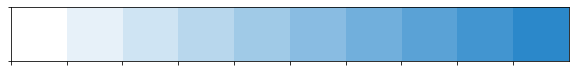

In [10]:
dict_sf = {}
list_sf = ['河北省',
'香港特别行政区',
'天津市',
'山西省',
'内蒙古自治区',
'四川省',
'海南省',
'江西省',
'北京市',
'黑龙江省',
'云南省',
'西藏自治区',
'浙江省',
'广西壮族自治区',
'辽宁省',
'澳门特别行政区',
'福建省',
'安徽省',
'青海省',
'贵州省',
'吉林省',
'湖南省',
'陕西省',
'台湾省',
'山东省',
'江苏省',
'重庆市',
'广东省',
'湖北省',
'甘肃省',
'新疆维吾尔自治区',
'宁夏回族自治区',
'上海市',
'河南省']
for i in list_sf:
    dict_sf[i] = i.strip('省市自治区壮族维吾尔回族特别行政')
#中国地图
def picture_china_map(data,picture_name,label_fontsize=13,color = get_lighter_color('#FFFFFF',color_1)[0]):
    data_zip = [*zip(data.index.tolist(),data)]#构建省份和对应统计人数的列表,地图数据传入的指定格式
    for i in range(len(data_zip)):
        data_zip[i]=[data_zip[i][0].strip('省市自治区壮族维吾尔回族特别行政'),data_zip[i][1]]
        data_zip[i][1]=i+1
    max_ = data_zip[len(data_zip)-1][1]
    a= (
    Map()
    .add("",data_zip,"china",is_map_symbol_show = False,is_roam = False,#数据传入,地图类型设置:中国地图"china"
         name_map=dict_sf,
         label_opts=opts.LabelOpts(formatter= '{b}',font_size=label_fontsize,font_family = '宋体'),#标签设置
         itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6')) #图形的描边颜色
    .set_global_opts(
         visualmap_opts=opts.VisualMapOpts(is_show=False,max_ = max_,range_color = color))#颜色渐变设置
    )
    a = (
         Grid(init_opts = opts.InitOpts(height = '700px',width='1000px'))  #设置图形大小,高度:height,宽度:width
        .add(a, grid_opts=opts.GridOpts(pos_left='35%'))#位置调整
    )
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook()

In [11]:
dict_sf

{'河北省': '河北',
 '香港特别行政区': '香港',
 '天津市': '天津',
 '山西省': '山西',
 '内蒙古自治区': '内蒙古',
 '四川省': '四川',
 '海南省': '海南',
 '江西省': '江西',
 '北京市': '北京',
 '黑龙江省': '黑龙江',
 '云南省': '云南',
 '西藏自治区': '西藏',
 '浙江省': '浙江',
 '广西壮族自治区': '广西',
 '辽宁省': '辽宁',
 '澳门特别行政区': '澳门',
 '福建省': '福建',
 '安徽省': '安徽',
 '青海省': '青海',
 '贵州省': '贵州',
 '吉林省': '吉林',
 '湖南省': '湖南',
 '陕西省': '陕西',
 '台湾省': '台湾',
 '山东省': '山东',
 '江苏省': '江苏',
 '重庆市': '重庆',
 '广东省': '广东',
 '湖北省': '湖北',
 '甘肃省': '甘肃',
 '新疆维吾尔自治区': '新疆',
 '宁夏回族自治区': '宁夏',
 '上海市': '上海',
 '河南省': '河南'}

## 省份地图

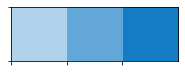

In [12]:
#省份地图
def picture_province_map(type1,type2,picture_name,province=xxsf,label_fontsize=13,color = get_color('#FFFFFF',color_1)[0]):
    provinces = {
    '吉林省': [125.326800, 43.896160], '黑龙江省': [126.662850, 45.742080],
    '辽宁省': [123.429250, 41.835710], '内蒙古': [111.765220, 40.817330],
    '新疆': [87.627100, 43.793430], '青海省': [101.780110, 36.620870],
    '北京市': [116.407170, 39.904690], '天津市': [117.199370, 39.085100],
    '上海市': [121.473700, 31.230370], '重庆市': [106.550730, 29.564710],
    '河北省': [114.469790, 39.035990], '河南省': [113.753220, 34.765710],
    '陕西省': [108.954240, 34.264860], '江苏省': [118.762950, 32.060710],
    '山东省': [117.020760, 36.668260], '山西省': [112.562720, 37.873430],
    '甘肃省': [103.826340, 36.059420], '宁夏': [106.258670, 38.471170],
    '四川省': [104.075720, 30.650890], '西藏': [91.117480, 29.647250],
    '安徽省': [117.285650, 31.861570], '浙江省': [120.153600, 30.265550],
    '湖北省': [114.342340, 30.545390], '湖南省': [112.983400, 28.112660],
    '福建省': [119.296590, 26.099820], '江西省': [115.910040, 28.674170],
    '贵州省': [106.707220, 26.598200], '云南省': [102.709730, 25.045300],
    '广东省': [113.266270, 23.131710], '广西省': [108.327540, 22.815210],
    '香港': [114.165460, 22.275340], '澳门': [113.549130, 22.198750],
    '海南省': [110.348630, 20.019970], '台湾省': [121.520076, 25.030724],
    }
    snjy_count = df_jy.query(f"sfmc=='{province}'&{type1}=='{type2}'").groupby('sqmc').count()['xh'].sort_values(ascending = True)#省内就业计数，不同省份需要修改
    list_xh = []
    for i in range(snjy_count.shape[0]):
        list_xh.append(i + 1)
    list_xh
    snjy_count_zip = [*zip(snjy_count.index.tolist(),list_xh)]
    a = (
    Map()
    .add("",snjy_count_zip,f"{province}".replace('省',''),is_map_symbol_show = False,is_roam = False,#省份地图如:"湖南"
         center = provinces[province],#省份的经纬度
         label_opts=opts.LabelOpts(formatter= '{b}',font_size=label_fontsize,font_family = '宋体'),#标签设置
         itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6'))#图形的描边颜色
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(is_show=False,range_color = color,max_= max(list_xh))))
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook()

## 象形条形图

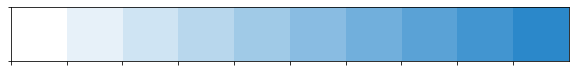

In [13]:
#象形条形图
def pictorial_reversal_bar(x_data,y1_data,y2_data,all_count,picture_name,color=f'{color_1}',color_1=get_lighter_color('#FFFFFF',color_1)[0][1],label_fontsize=16,label_fontfamily='Bahnschrift SemiLight Condensed',axislabel_fontsize=21,height = '700px',pos_left="35%"):
    # 标签格式
    if sum(y1_data) ==all_count:
        jscode = "function (params) {return (params.value/%d*100).toFixed(2)" %(sum(y1_data)) + "+ '%'}"
    else:
        jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % all_count + "+ '%'}"
    print(y1_data,sum(y1_data),jscode)
    a = (
    PictorialBar()
    .add_xaxis(x_data)
    .add_yaxis("",y2_data,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
               itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",y1_data,symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color,font_weight='bold',
#                                          formatter =JsCode("function (params) {return (params.value/3352*100).toFixed(2) + '%' + ' ' + params.value + '人'}"),
                                         formatter=JsCode(jscode),
                                         font_size=label_fontsize,font_family =label_fontfamily                                     
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color),symbol=cube)#设置柱形图样式
  
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color)),axislabel_opts=opts.LabelOpts(font_size=axislabel_fontsize,color='black',font_family = '宋体')))
    )
    a = (
         Grid(init_opts = opts.InitOpts(height = height,width='1000px'))  #设置图形大小,高度:height,宽度:width
        .add(a, grid_opts=opts.GridOpts(pos_left=pos_left))#位置调整
    )
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook(),a

## 饼图

In [14]:
#饼图
def picture_pie(index_name,picture_name,title_fontsize=21,label_fontsize=21):
    if index_name =='dy_shbz':
        shbz_sort = ['除四险一金外，还有其他保障','四险一金','四险','没有任何社保保障']
        data = index_single_options_top(index_name,False,shbz_sort)[2]
        data = data.apply(lambda x: '%.2f' % x)
        title_1 ='社会保障度'
        title_2 =f'{index_single_options_top(index_name,False)[3]:.2f}%'
    else:
        data = index_scores_proportion(index_name,False)[0].rename(index={'5':f"非常{index_dict[index_name[-3:]]}",'4':f"{index_dict[index_name[-3:]]}",'3':f"比较{index_dict[index_name[-3:]]}",'2':f"不太{index_dict[index_name[-3:]]}",'1':f"不{index_dict[index_name[-3:]]}"})
        data = data.apply(lambda x: '%.2f' % x)
        if len(index_dict[index_name]) >=8:
            title_1 = f'{index_dict[index_name][:-3]}' + '\n' + f'{index_dict[index_name][-3:]}'
        else:
            title_1 = f'{index_dict[index_name]}'
        title_2 = f'{index_scores_proportion(index_name,False)[1]:.2f}%'
    myd_name_count = [*zip(data.index,data)]#构建指标和对应数值的列表,饼图数据传入的指定格式
    a = (
    Pie()
    .add("",myd_name_count,radius=["30%", "55%"],
            label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
            label_opts=opts.LabelOpts(interval=0,
                position="outside",
    #             formatter='{b|{b}}'+'\n'+'{d|{d}}%',
                formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
                rich={
                    "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                    "per": {"fontSize": 20},
                    "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
                })
         ) 
    .set_global_opts(
        title_opts=opts.TitleOpts(title=title_1 ,
                                  subtitle=title_2,pos_left='center',pos_top='45%', #标题位置
                                  title_textstyle_opts=opts.TextStyleOpts(font_size = 30,font_family = '宋体',color=color_1),
                                  subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 35,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
        legend_opts=opts.LegendOpts(is_show=False))#去掉图例
       .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
    a = (
     Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts())#位置调整
    )
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook(),a

## 简单条形图

In [15]:
#简单条形图
def picture_reversal_bar(x_data,y1_data,y2_data,picture_name,bgcolor=0.1,reversal_bar_width = 25,color=f'{color_1}',label_fontsize='16',axislabel_fontsize='21',height = '700px',pos_left="30%"):
    a = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis("",y1_data,bar_width=reversal_bar_width,stack="stack1",
               label_opts=opts.LabelOpts(position='right',color=color,formatter = '{c}%',font_weight='bold',font_size = label_fontsize,font_family = 'Times New Roman'),
               itemstyle_opts=opts.ItemStyleOpts(color=color))#设置柱形图样式
    .add_yaxis("",y2_data,stack="stack1",label_opts=opts.LabelOpts(is_show=False),
                     itemstyle_opts=opts.ItemStyleOpts(color='#808080',opacity=bgcolor)) #添加辅助条形图,增加灰色进度条
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(font_size = axislabel_fontsize,color='black',font_family = '宋体'))))
    a =( 
    Grid(init_opts = opts.InitOpts(height = height))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left=pos_left))#位置调整
    )
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook()

## 雷达图

In [16]:
#雷达图
def picture_radar(data,picture_name,text_fontsize=21,color=color_1):
    if data =='dy_dwpj':
        data1 =radar_map(data,'hand',False,'dy_dwzmd','dy_pxjh','dy_jskj','dy_gzhj','dy_gzzzx','dy_gzyl','dy_gzwdx','dy_gwfzqj','dy_gzdd','dy_qywh','dy_gzfw','dy_dwzhmyd')[1]
        data1 = data1.apply(lambda x: '%.2f' % x)
    else:
        data1 = radar_map(data,'auto',False)[1]
        data1 = data1.drop('dy_jyjx_zhmyd')
        data1 = data1.apply(lambda x: '%.2f' % x)
    data2 = [data1.tolist()]
    radar_name = []
    c_schema = []
    c_symbol = []
    for i in data1.index:
        radar_name.append(index_dict[i].replace('满意度',''))
        
    for i in range(len(radar_name)):
        c_schema.append({"name": radar_name[i], "max": 5, "min": 0})
    
    c_symbol.append({"value": data1.tolist(), "symbol": "circle","symbolSize": 10})
    
    a = (
    Radar()
    #雷达图样式设置,维度设置
    .add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=5,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False)),
        radiusaxis_opts=opts.RadiusAxisOpts(
            axislabel_opts=opts.LabelOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
            min_=0,
            max_=5,
            interval=1,
            splitarea_opts=opts.SplitAreaOpts(is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        polar_opts=opts.PolarOpts(),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
        textstyle_opts=opts.TextStyleOpts(color=color,font_size =text_fontsize,font_family = '宋体'))
    #数据传入
    .add(               
        series_name="",
        data=c_symbol,
        color=color,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
        label_opts=opts.LabelOpts(formatter='{c}',font_family='Bahnschrift SemiLight Condensed',font_size=20,font_weight='bolder',position="outside")))
    return make_snapshot(snapshot,a.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5),a.render_notebook()

In [17]:
#图形取数文字输出一起封装
def dy_pie(a):
    if a =='dy_shbz':
        print(f'''{index_single_options_top(a,False)[0]}''')
    else:
        print(f'''{index_scores_proportion(a,False)[2]}''')
    picture_pie(a,index_dict[a])[1]
    add_pic(index_dict[a],15.24)
    return picture_pie(a,index_dict[a])[1]


def pictorial_sorm(a,b,height='700px',pos_left="35%"):#a为字段名，b为s(单选)或者m(多选)
    if b=='s':
        value_count_1 = []
        for i in range(index_multiple_options_top(a,True)[1].shape[0]):
            value_count_1.append(max(index_single_options_top(a,True)[1])*1.3)#构建辅助条形图数据 
        p = pictorial_reversal_bar(x_data=index_single_options_top(a,True)[1].index.tolist(),y1_data=index_single_options_top(a,True)[1].tolist(),y2_data=value_count_1,all_count=index_single_options_top(a,True)[3],height=height,pos_left=pos_left,picture_name=f'{index_dict[a]}')[1]
        add_pic(f'{index_dict[a]}',15.24)
    elif b=="m":
        value_count_1 = []
        for i in range(index_multiple_options_top(a,True)[1].shape[0]):
            value_count_1.append(max(index_multiple_options_top(a,True)[1])*1.3)#构建辅助条形图数据 
        p =pictorial_reversal_bar(x_data=index_multiple_options_top(a,True)[1].index.tolist(),y1_data=index_multiple_options_top(a,True)[1].tolist(),y2_data=value_count_1,all_count=index_multiple_options_top(a,True)[3],height=height,pos_left=pos_left,picture_name=f'{index_dict[a]}')[1]
        add_pic(f'{index_dict[a]}',15.24)
    return p


# 文档基本格式设置

In [18]:
document=Document(pic_path+f'{xxmc}{xl}派遣分析.docx')   # 读取文档

def Heading_1(content):
    result=document.add_heading('',level = 1).add_run(content)
    return result


def Heading_2(content):
    result=document.add_heading('',level = 2).add_run(content)
    return result


def Heading_3(content):
    result=document.add_heading('',level = 3).add_run(content)
    return result


def Heading_4(content):
    result=document.add_heading('',level = 4).add_run(content)
    return result

# 第四章

## 四、继续深造反馈

### （一）继续深造专业相关度

In [19]:
# Heading_2("四、继续深造反馈")
# Heading_3("（一）继续深造专业相关度")
write_zw(f'''毕业生继续深造与专业相关度为{index_scores_proportion('dy_jxszzyxgd',False)[2]}''')
dy_pie('dy_jxszzyxgd')

100.00%，其中“非常相关”占比43.75%，“相关”占比31.25%，“比较相关”占比25.00%。


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 109
Current browser version is 112.0.5615.87 with binary path C:\Users\Administrator\AppData\Local\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	(No symbol) [0x008A6643]
	(No symbol) [0x0083BE21]
	(No symbol) [0x0073DA9D]
	(No symbol) [0x00762911]
	(No symbol) [0x0075D630]
	(No symbol) [0x0075A899]
	(No symbol) [0x00796917]
	(No symbol) [0x0079655C]
	(No symbol) [0x0078FB76]
	(No symbol) [0x007649C1]
	(No symbol) [0x00765E5D]
	GetHandleVerifier [0x00B1A142+2497106]
	GetHandleVerifier [0x00B485D3+2686691]
	GetHandleVerifier [0x00B4BB9C+2700460]
	GetHandleVerifier [0x00953B10+635936]
	(No symbol) [0x00844A1F]
	(No symbol) [0x0084A418]
	(No symbol) [0x0084A505]
	(No symbol) [0x0085508B]
	BaseThreadInitThunk [0x76C0FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77507A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77507A6E+238]


In [19]:
write_tz('继续深造与专业相关度')

### （二）国内升学原因

In [20]:
gnsxyy_count = index_multiple_options_top('dy_gnsxyy',True)[2]
topthree_proportion(gnsxyy_count,'dy_gnsxyy')

'“对本专业感兴趣，愿深入学习”（占比75.00%）、“增加就业竞争力”（占比68.75%）、“家人期望”（占比25.00%）。'

In [21]:
Heading_3("（二）国内升学原因")
write_zw(f'''毕业生选择国内升学的主要原因为{topthree_proportion(gnsxyy_count,'dy_gnsxyy')}''')
pictorial_sorm('dy_gnsxyy','m',height='400px')

[2.0, 4.0, 11.0, 12.0] 29.0 function (params) {return (params.value/16*100).toFixed(2)+ '%'}


In [22]:
write_tz('国内升学原因（多选题）')

### （三）出国（境）原因

In [23]:
cgcjyy_count = index_multiple_options_top('dy_cgcjyy',True)[2]
topthree_proportion(cgcjyy_count,'dy_cgcjyy')

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
Heading_3("（三）出国（境）原因")
write_zw(f'''毕业生选择出国（境）的主要原因为{topthree_proportion(cgcjyy_count,'dy_cgcjyy')}''')
pictorial_sorm('dy_cgcjyy','m',height='400px')

In [ ]:
write_tz('出国（境）原因（多选题）')

In [ ]:
document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第五章  毕业生就业反馈

## 一、就业满意度

In [24]:
document.add_picture(pic_path+'一级标题底色.png')
Heading_1("第五章      毕业生就业反馈")
write_zw(f'''本部分数据来源于“{xxmc}2022届毕业生就业质量调研问卷”，通过毕业生对于就业结果的综合评价来反馈就业质量。毕业生反馈主要从就业满意度、就业适配性、社会福利、职业发展、就业公平性、就业稳定性、灵活就业、疫情影响、未就业分析等九个方面进行分析。''')

Heading_2("一、就业满意度")
write_zw(f'''毕业生就业满意度为{index_scores_proportion('dy_jymyd',False)[2]}''')
dy_pie('dy_jymyd')

90.91%，其中“非常满意”占比13.64%，“满意”占比34.09%，“比较满意”占比43.18%。


In [25]:
write_tz('毕业生就业满意度')

## 二、就业适配性

### （一）就业专业相关度

In [26]:
Heading_2("二、就业适配性")
Heading_3("（一）就业专业相关度")
write_zw(f'''毕业生所学专业与工作的相关度为{index_scores_proportion('dy_jyzyxgd',False)[2]}''')
dy_pie('dy_jyzyxgd')

78.63%，其中“非常相关”占比21.37%，“相关”占比26.61%，“比较相关”占比30.65%。


In [27]:
write_tz('毕业生就业与专业相关度')

In [28]:
jyzybxgyy_count = index_multiple_options_top('dy_jyzybxgyy',True)[2]
topthree_proportion(jyzybxgyy_count,'dy_jyzybxgyy')

'“专业工作岗位招聘少”（占比42.86%）、“专业工作不符合自己的职业期待或规划”（占比37.50%）、“迫于现实先就业再择业”（占比35.71%）。'

In [29]:
write_zw(f'''毕业生选择从事与专业不相关工作的原因主要为{topthree_proportion(jyzybxgyy_count,'dy_jyzybxgyy')}''')
pictorial_sorm('dy_jyzybxgyy','m',height='450px',pos_left="40%",)

[3.0, 6.0, 9.0, 10.0, 16.0, 20.0, 21.0, 24.0] 109.0 function (params) {return (params.value/56*100).toFixed(2)+ '%'}


In [30]:
write_tz('就业与专业不相关原因（多选题）')

### （二）专业就业前景预期

In [31]:
Heading_3("（二）专业就业前景预期")
write_zw(f'''毕业生对自身所学专业的就业前景的预期度为{index_scores_proportion('dy_jyqjyq',False)[2]}''')
dy_pie('dy_jyqjyq')

83.86%，其中“非常乐观”占比9.27%，“乐观”占比33.06%，“比较乐观”占比41.53%。


In [32]:
write_tz('专业就业前景预期')

### （三）职业期待匹配度

In [33]:
Heading_3("（三）职业期待匹配度")
write_zw(f'''毕业生职业期待匹配度为{index_scores_proportion('dy_zwppd',False)[2]}''')
dy_pie('dy_zwppd')

79.84%，其中“非常匹配”占比10.89%，“匹配”占比26.21%，“比较匹配”占比42.74%。


In [34]:
write_tz('毕业生职业期待匹配度')

### （四）人职匹配度

In [35]:
Heading_3("（四）人职匹配度")
#计算各指标平均分
nlppd_mean = round(df_dy['dy_nlppd'].dropna().astype(int).mean(),2)
xqppd_mean = round(df_dy['dy_xqppd'].dropna().astype(int).mean(),2)
jzgppd_mean = round(df_dy['dy_jzgppd'].dropna().astype(int).mean(),2)
xgppd_mean = round(df_dy['dy_xgppd'].dropna().astype(int).mean(),2)

#构建人职匹配度和平均分的列表
rzppd_name = ['能力','兴趣','价值观','性格']
rzppd_mean = [nlppd_mean,xqppd_mean,jzgppd_mean,xgppd_mean]
rzppd_mean

[3.77, 3.59, 3.73, 3.72]

In [36]:
p_rzppd = (
    PictorialBar()
    .add_xaxis(rzppd_name)
    .add_yaxis("",rzppd_mean,
               label_opts=opts.LabelOpts(position="right",color=color_1,formatter = '{c}',font_size = 21,font_family = 'Times New Roman',font_weight='bold'),
               itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}'),
               symbol_size=25,             #每个图标的大小，重复图表则设置，不重复（类似山峰图）则去掉     
               symbol_repeat= True,        #是否重复图标
               is_symbol_clip=True,        #是否裁剪图标
               symbol=star,                #图标path
              )
    .reversal_axis()
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                              axislabel_opts=opts.LabelOpts(font_size = 21,color='black',font_family = '宋体')))
)
p_rzppd = (
     Grid(init_opts = opts.InitOpts(height='350px',width='800px'))
    .add(p_rzppd, grid_opts=opts.GridOpts(pos_left="20%"))
)
p_rzppd.render_notebook()

In [37]:
write_zw(f'''人职匹配度根据帕森斯的人职匹配理论即特质因素理论，从人的特质即能力倾向、兴趣、价值观和人格等方面来衡量个人是否适应职业。匹配程度分为5个等级，评分越高，匹配程度越高，此处的匹配度为样本的均值。''')
write_zw(f'''毕业生评价目前从事的职业与性格的匹配度为{xgppd_mean}分，价值观匹配度为{jzgppd_mean}分，兴趣匹配度为{xqppd_mean}分，能力匹配度为{nlppd_mean}分。''')
make_snapshot(snapshot, p_rzppd.render(), pic_path+'人职匹配度.png',pixel_ratio = 5)
add_pic('人职匹配度',15.24)
write_tz('毕业生人职匹配度')

## 三、社会福利

### （一）薪资情况

In [38]:
Heading_2("三、社会福利")
Heading_3("（一）薪资情况")
df_dy["dy_jypjxz"].count() == 0 
df_dy["dy_jypjxz"].dropna()
if df_dy["dy_jypjxz"].count() == 0 :
    bys_xz_ave = 0
else:
    bys_xz_ave=int(df_dy["dy_jypjxz"].apply(pd.to_numeric).mean())
write_zw(f'''通过对薪资进行加权平均，得到毕业生的平均月薪为{bys_xz_ave}元，毕业生月薪主要为{index_single_options_top('dy_jyyx',False)[0]}''')

In [39]:
jyyx_sort = [
 '3000元及以下',
 '3001-4000元',
 '4001-5000元',
 '5001-6000元',
 '6001-7000元',
 '7001-8000元',
 '8001-9000元',
 '9001-10000元',
 '10001-15000元',
 '15001-20000元',
 '20000元以上']

a = index_single_options_top('dy_jyyx',False,jyyx_sort)[2]
a['15000元及以上']= round(a['15001-20000元'] + a['20000元以上'],2)
a.drop(['15001-20000元','20000元以上'],inplace=True)
a

dy_jyyx
3000元及以下         1.21
3001-4000元       3.23
4001-5000元       5.65
5001-6000元      10.48
6001-7000元      11.29
7001-8000元      11.69
8001-9000元       9.27
9001-10000元     12.10
10001-15000元    25.81
15000元及以上        9.27
Name: dy_xh, dtype: float64

In [40]:
jyyx = (
    Bar(init_opts = opts.InitOpts(height = '800px',width='1200px'))#设置图形大小,高度:height,宽度:width
    .add_xaxis(a.index.tolist())
    .add_yaxis("",a.tolist(),bar_width=40,
               label_opts=opts.LabelOpts(position="top",color='black',formatter = '{c}%',font_size = 21,font_family = 'Times New Roman'),
               itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}'))#设置柱形图样式
    .set_global_opts(yaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 19,rotate=15,font_family = '宋体')))
    .extend_axis(                  #增加扩展轴     
        yaxis=opts.AxisOpts(
            name="",
            type_="value",
           #设置次坐标轴最大值
            position="right",
            is_show = False
            )
        )
)
line = (                         #折线图
    Line()
    .add_xaxis(a.index.tolist()) #x轴
    .add_yaxis(
        "",
        a.tolist(),#数据
        #is_smooth=True,
        label_opts=opts.LabelOpts(is_show=False,position='top',
                                  formatter=JsCode("function (params) {return params.value[1] + '%'}"),
                                  font_size = 21,font_family = 'Times New Roman'),
        yaxis_index=1,
        linestyle_opts=opts.LineStyleOpts(color=f'{color_1}',width=1.5),
        itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}')
    )

)
jyyx.overlap(line).render_notebook()

In [41]:
make_snapshot(snapshot,jyyx.render(), pic_path+f'就业月薪.png',pixel_ratio = 5)
add_pic('就业月薪',15.24)
write_tz('毕业生薪资分布')

In [42]:
write_zw(f'''毕业生对目前薪资的满意度为{index_scores_proportion('dy_xzmyd',False)[2]}''')
dy_pie('dy_xzmyd')

66.53%，其中“非常满意”占比6.05%，“满意”占比10.48%，“比较满意”占比50.00%。


In [43]:
write_tz('毕业生薪资满意度')

### （二）社会保障情况

In [44]:
Heading_3("（二）社会保障情况")
shbz_sort = ['除四险一金外，还有其他保障','四险一金','四险','没有任何社保保障']
write_zw(f'''{index_single_options_top('dy_shbz',False,shbz_sort)[0]}''')
dy_pie('dy_shbz')

毕业生社会保障度为99.60%，其中“除四险一金外，还有其他保障”占比70.33%、“四险一金”占比28.05%、“四险”占比1.22%。


In [45]:
write_tz('毕业生社会保障情况')

In [46]:
write_zw(f'''毕业生社会保障满意度为{index_scores_proportion('dy_shbzmyd',False)[2]}''')
dy_pie('dy_shbzmyd')

82.52%，其中“非常满意”占比8.13%，“满意”占比28.86%，“比较满意”占比45.53%。


In [47]:
write_tz('毕业生对社会保障满意度')

## 四、职业发展

### （一）对用人单位综合满意度

In [48]:
Heading_2("四、职业发展")
Heading_3("（一）对用人单位综合满意度")
write_zw(f'''毕业生对用人单位综合满意度为{index_scores_proportion('dy_dwzhmyd',False)[2]}''')
dy_pie('dy_dwzhmyd')

93.49%，其中“非常满意”占比18.70%，“满意”占比45.12%，“比较满意”占比29.67%。


In [49]:
write_tz('毕业生对用人单位综合满意度')

### （二）对用人单位分项评价

In [50]:
data = radar_map('dy_dwpj','hand',False,'dy_dwzmd','dy_pxjh','dy_jskj','dy_gzhj','dy_gzzzx','dy_gzyl','dy_gzwdx','dy_gwfzqj','dy_gzdd','dy_qywh','dy_gzfw','dy_dwzhmyd')[1]

#如果排名有并列，一起输出
list_index = []
text_dwpj = ''
for value in list(data.unique()[:3]):
    list_index.extend(list(data[data==value].index))

for index in list_index:
    text_dwpj += f'“{index_dict[index]}”（{data[index]:.2f}分）、'
text_dwpj = text_dwpj[:-1] + '。'
text_dwpj

'“工作氛围”（3.97分）、“工作稳定性”（3.91分）、“单位知名度”（3.80分）。'

In [51]:
Heading_3("（二）对用人单位分项评价")
write_zw(f'''毕业生对用人单位的满意度从七个方面进行分项评价，评价分为五个维度并将其等级量化：“非常满意”=5分，“满意”=4分，“比较满意”=3分，“不太满意”=2分，“很不满意”=1分，此处的满意度为样本评分的均值。''')
write_zw('''综合来看，五分制评价标准下，毕业生满意度比较高的方面为'''+ text_dwpj)
picture_radar('dy_dwpj','毕业生对用人单位分项评分')[1]

In [52]:
add_pic('毕业生对用人单位分项评分',15.24)
write_tz('毕业生对用人单位分项评分')

### （三）发展前景预期

In [53]:
Heading_3("（三）发展前景预期")
write_zw(f'''毕业生对未来长期的岗位发展前景期望度为{index_scores_proportion('dy_zyfzyq',False)[2]}''')
dy_pie('dy_zyfzyq')

86.69%，其中“非常乐观”占比8.06%，“乐观”占比55.24%，“比较乐观”占比23.39%。


In [54]:
write_tz('毕业生对岗位发展前景预期')

## 五、就业公平性

In [55]:
Heading_2("五、就业公平性")

jyqs_qk = index_multiple_options_top('dy_jyqs',True)[1].drop('没有遇到过就业歧视')
jyqs_qk_count = df_dy['dy_jyqs'].drop(df_dy['dy_jyqs'][df_dy['dy_jyqs']=='没有遇到过就业歧视'].index).count()
write_zw(f'''毕业生在求职中遇到过就业歧视的占比为{100-index_multiple_options_top('dy_jyqs',False)[2]['没有遇到过就业歧视']:.2f}%，主要歧视因素为{topthree_proportion(round(index_multiple_options_top('dy_jyqs',True)[1].drop('没有遇到过就业歧视')/jyqs_qk_count*100,2),'dy_jyqs')}''')
jyqs_qk.rename(index={'身体条件（健康、相貌、身高等）':'身体条件'},inplace=True)

In [56]:
value_count_1 = []
for i in range(jyqs_qk.shape[0]):
    value_count_1.append(max(jyqs_qk)*1.3)#构建辅助条形图数据 

jyqs_1 = ['遇到过就业歧视','没有遇到过歧视']
jyqs_2 = [100-index_multiple_options_top('dy_jyqs',False)[2]['没有遇到过就业歧视'],index_multiple_options_top('dy_jyqs',False)[2]['没有遇到过就业歧视']]
jyqs_count =[*zip(jyqs_1,jyqs_2)]
jyqs_count 

[('遇到过就业歧视', 76.0), ('没有遇到过歧视', 24.0)]

In [57]:
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % jyqs_qk_count + "+ '%'}"   
a = (
    PictorialBar()
    .add_xaxis(jyqs_qk.index.tolist())
    .add_yaxis("",value_count_1,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
               itemstyle_opts=opts.ItemStyleOpts(color=color_1,opacity=0.2),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",jyqs_qk.tolist(),symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color_1,font_weight='bold',
#                                          formatter =JsCode("function (params) {return (params.value/3352*100).toFixed(2) + '%' + ' ' + params.value + '人'}"),
                                         formatter=JsCode(jscode),
                                         font_size=16,font_family ='Bahnschrift SemiLight Condensed'                                   
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=cube)#设置柱形图样式
  
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(font_size=21,color='black',font_family = '宋体')))
    .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}'])
)
jyqs = (
Pie()
.add("",jyqs_count,radius=["30%", "55%"],center=["20%", "55%"],label_opts=opts.LabelOpts(is_show=False)) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='就业歧视率' ,
                              subtitle=f'''   {100-index_multiple_options_top('dy_jyqs',False)[2]['没有遇到过就业歧视']:.2f}%''',pos_left='14%',pos_top='50%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(font_size = 20,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 20,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False)))#去掉图例

grid = (
    Grid(init_opts=opts.InitOpts(height='500px',width='900px'))   #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left="50%"))
    .add(jyqs, grid_opts=opts.GridOpts(pos_left="")))
grid.render_notebook()

In [58]:
make_snapshot(snapshot,grid.render(), pic_path+f'就业歧视情况.png',pixel_ratio = 5)
add_pic('就业歧视情况',15.24)
write_tz('毕业生就业遇到就业歧视的情况（多选题）')

## 六、就业稳定性

### （一）稳定性

In [59]:
Heading_2("六、就业稳定性")
Heading_3("（一）稳定性")

lzcs_sort = ['0次','1次','2次','3次及以上'] #自定义排序
write_zw(f'''以毕业生毕业半年左右依旧在岗的情况来衡量就业稳定性，毕业生综合稳定性为{index_single_options_top('dy_lzcs',False)[2]['0次']:.2f}%（离职率{100-index_single_options_top('dy_lzcs',False)[2]['0次']:.2f}%），其中{re.sub('“离职0次”.*?、','',re.sub('“','“离职',index_single_options_top('dy_lzcs',False,lzcs_sort)[0]))}''')
lzcs_1 = index_single_options_top('dy_lzcs',False,lzcs_sort)[2].index.tolist()
lzcs_2 = index_single_options_top('dy_lzcs',False,lzcs_sort)[2].apply(lambda x: '%.2f' % x).tolist()
lzcs_count =[*zip(lzcs_1,lzcs_2)]

for i in lzcs_count:
    if i[1]=='0.00':
        lzcs_count.remove(i)
    else:
        continue
lzcs_count

[('0次', '92.68'), ('1次', '4.88'), ('2次', '1.63'), ('3次及以上', '0.81')]

In [60]:
lzcs = (
Pie()
.add("",lzcs_count,radius=["30%", "55%"],
        label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
        label_opts=opts.LabelOpts(interval=0,
            position="outside",
#             formatter='{b|{b}}'+'\n'+'{d|{d}}%',
            formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
            rich={
                "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                "per": {"fontSize": 20},
                "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
            })
     ) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='就业稳定性' ,
                              subtitle=f'''{index_single_options_top('dy_lzcs',False)[2]['0次']:.2f}%''',pos_left='center',pos_top='45%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(font_size = 30,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 35,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False))#去掉图例
   .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
lzcs = (
 Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
.add(lzcs, grid_opts=opts.GridOpts())#位置调整
)
lzcs.render_notebook()

In [61]:
make_snapshot(snapshot,lzcs.render(), pic_path+f'离职次数.png',pixel_ratio = 5)
add_pic('离职次数',15.24)
write_tz('毕业生就业稳定性（离职率衡量）')

### （二）离职原因

In [62]:
Heading_3("（二）离职原因")
write_zw(f'''离职过的毕业生，离职的主要原因为{index_multiple_options_top('dy_lzyy',True)[0]}''')
pictorial_sorm('dy_lzyy','m',height='600px')

[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 5.0, 6.0, 7.0, 10.0] 46.0 function (params) {return (params.value/20*100).toFixed(2)+ '%'}


In [63]:
write_tz('毕业生离职原因（多选题）')

## 七、灵活就业

In [64]:
Heading_2("七、灵活就业")
Heading_3("（一）自由职业")

df_dy['dy_zyzylx'].replace('全媒体运营工作者（如各类平台博主、网络主播等）','全媒体运营工作者',inplace=True)
write_zw(f'''毕业生自由职业的岗位类型主要为{index_single_options_top('dy_zyzylx',False)[0]}''')
pictorial_sorm('dy_zyzylx','s',height='350px')

[1, 1] 2 function (params) {return (params.value/2*100).toFixed(2)+ '%'}


In [65]:
write_tz('毕业生自由职业岗位类型')

In [66]:
write_zw(f'''毕业生选择自由职业的原因主要为{index_multiple_options_top('dy_zyzyyy',True)[0]}''')
pictorial_sorm('dy_zyzyyy','m',height='450px')

[1.0, 1.0, 2.0, 2.0] 6.0 function (params) {return (params.value/2*100).toFixed(2)+ '%'}


In [67]:
write_tz('毕业生选择自由职业原因（多选题）')

In [68]:
Heading_3("（二）灵活就业情况")
Heading_4("1.灵活就业方式及打算")

In [69]:
df_dy['dy_lhjy_fs'].replace({'受雇于兼职雇主等（他雇）':'受雇于兼职雇主等','受雇于人力资源服务公司/第三方等（第三方雇佣）':'受雇于人力资源服务公司/第三方等','平台自主结算、售卖自有商品等（自雇）':'平台自主结算、售卖自有商品等'},inplace=True)
lhjy_1 = index_single_options_top('dy_lhjy_fs',False)[2].index.tolist()
lhjy_2 = index_single_options_top('dy_lhjy_fs',False)[2].apply(lambda x: '%.2f' % x).tolist()
lhjy_count =[*zip(lhjy_1,lhjy_2)]

write_zw(f'''毕业生灵活就业的方式主要为“{index_single_options_top('dy_lhjy_fs',False)[2].index[0]}”（占比{index_single_options_top('dy_lhjy_fs',False)[2][0]:.2f}%）、“{index_single_options_top('dy_lhjy_fs',False)[2].index[1]}”（占比{index_single_options_top('dy_lhjy_fs',False)[2][1]:.2f}%）。''')

In [70]:
lhjy = (
Pie()
.add("",lhjy_count,radius=["30%", "55%"],
        label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
        label_opts=opts.LabelOpts(interval=0,
            position="outside",
#             formatter='{b|{b}}'+'\n'+'{d|{d}}%',
            formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
            rich={
                "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                "per": {"fontSize": 20},
                "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
            })
     ) 
.set_global_opts(legend_opts=opts.LegendOpts(is_show=False))#去掉图例
   .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
lhjy = (
 Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
.add(lhjy, grid_opts=opts.GridOpts())#位置调整
)
lhjy.render_notebook()

In [71]:
make_snapshot(snapshot,lhjy.render(), pic_path+f'毕业生灵活就业方式.png',pixel_ratio = 5)
add_pic('毕业生灵活就业方式',15.24)
write_tz('毕业生灵活就业方式')

In [72]:
df_dy['dy_lhjy_gh'].replace({'短期灵活就业，并持续为升学做准备':'短期并持续为升学做准备','短期灵活就业，并持续关注其他单位就业的机会':'短期并持续关注其他单位就业的机会','短期灵活就业，并持续为考公做准备':'短期并持续为考公做准备','长期灵活就业，在专业领域内深耕':'长期并在专业领域内深耕'},inplace=True)
lhjygh_1 = index_single_options_top('dy_lhjy_gh',False)[2].index.tolist()
lhjygh_2 = index_single_options_top('dy_lhjy_gh',False)[2].apply(lambda x: '%.2f' % x).tolist()
lhjygh_count =[*zip(lhjygh_1,lhjygh_2)]

write_zw(f'''灵活就业的毕业生，未来的打算主要为“{index_single_options_top('dy_lhjy_gh',False)[2].index[0]}”（占比{index_single_options_top('dy_lhjy_gh',False)[2][0]:.2f}%）、“{index_single_options_top('dy_lhjy_gh',False)[2].index[1]}”（占比{index_single_options_top('dy_lhjy_gh',False)[2][1]:.2f}%）。''')

In [73]:
lhjygh = (
Pie()
.add("",lhjygh_count,radius=["30%", "55%"],
        label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
        label_opts=opts.LabelOpts(interval=0,
            position="outside",
#             formatter='{b|{b}}'+'\n'+'{d|{d}}%',
            formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
            rich={
                "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                "per": {"fontSize": 20},
                "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
            })
     ) 
.set_global_opts(legend_opts=opts.LegendOpts(is_show=False))#去掉图例
   .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
lhjygh = (
 Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
.add(lhjygh, grid_opts=opts.GridOpts())#位置调整
)
lhjygh.render_notebook()

In [74]:
make_snapshot(snapshot,lhjygh.render(), pic_path+f'毕业生灵活就业未来打算.png',pixel_ratio = 5)
add_pic('毕业生灵活就业未来打算',15.24)
write_tz('毕业生灵活就业未来打算')

In [75]:
Heading_4("2.灵活就业工作时长")

write_zw(f'''灵活就业的毕业生，每周平均工作时长主要为{index_single_options_top('dy_lhjy_gzts',False)[0]}''')
pictorial_sorm('dy_lhjy_gzts','s',height='450px')

[1, 1, 2] 4 function (params) {return (params.value/4*100).toFixed(2)+ '%'}


In [76]:
write_tz('灵活就业毕业生每周工作时长')

In [77]:
write_zw(f'''灵活就业的毕业生，每天平均工作时长主要为{index_single_options_top('dy_lhjy_gzsc',False)[0]}''')
pictorial_sorm('dy_lhjy_gzsc','s',height='450px')

[1, 3] 4 function (params) {return (params.value/4*100).toFixed(2)+ '%'}


In [78]:
write_tz('灵活就业毕业生每天工作时长') 

## 八、疫情影响

### （一）对就业结果的影响

In [79]:
Heading_2("八、疫情影响")
Heading_3("（一）对就业结果的影响")

lsghsfyz_count = df_dy.groupby('dy_lsghsfyz').count()['dy_xh']
lsghsfyz_ratio = lsghsfyz_count/lsghsfyz_count.sum()

lsghsfyz_name_count =[*zip(lsghsfyz_ratio.index,lsghsfyz_ratio.values)]
lsghsfyz_name_count
yxd = round(lsghsfyz_ratio[1]*100,2)
yxd

79.17

In [80]:
df_dy['dy_byqx_1'] = df_dy['dy_byqx'].replace({'其他录用形式就业':'单位就业(非基层)','签就业协议形式就业':'单位就业(非基层)','签劳动合同形式就业':'单位就业(非基层)'})
lsgh_count = df_dy.query("dy_lsghsfyz=='否'").groupby(['dy_lsgh','dy_byqx_1']).count()['dy_xh']
lsgh_count.rename({'参加国家和地方基层项目就业（选调生、特岗教师、西部计划、大学生村官、三支一扶等）':'基层项目就业','单位就业':'单位就业(非基层)'},inplace=True)

#构建桑基图数据表
link=[]                                      
for i in range(len(lsgh_count)):
    dic={}
    dic['source']=lsgh_count.index[i][0]
    dic['target']=lsgh_count.index[i][1] + '_'
    dic['value']=int(lsgh_count.values[i])
    link.append(dic)
link

[{'source': '单位就业(非基层)', 'target': '单位就业(非基层)_', 'value': 32},
 {'source': '基层项目就业', 'target': '单位就业(非基层)_', 'value': 6},
 {'source': '国内升学', 'target': '单位就业(非基层)_', 'value': 14},
 {'source': '自主创业', 'target': '单位就业(非基层)_', 'value': 2},
 {'source': '自由职业', 'target': '单位就业(非基层)_', 'value': 1}]

In [81]:
zyjg = (
Pie()
.add("",lsghsfyz_name_count,radius=["30%", "55%"],center=["20%", "50%"],label_opts=opts.LabelOpts(is_show=False)) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='影响度',
                              subtitle=f'{yxd}'+'%',pos_left='15.5%',pos_top='43%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(font_size = 25,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 25,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False))#去掉图例
   .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
zyjg = (
 Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
.add(zyjg, grid_opts=opts.GridOpts())#位置调整
)

nodes = [                                                            #定义数据指标和颜色
    {"name": "单位就业(非基层)",'itemStyle':{'color':color_1}},
    {"name": "国内升学",'itemStyle':{'color':color_2}},
    {"name": "基层项目就业",'itemStyle':{'color':color_3}},
    {"name": "自由职业",'itemStyle':{'color':color_4}},
    {"name": "出国出境",'itemStyle':{'color':color_5}},
    {"name": "自主创业",'itemStyle':{'color':color_1}},
    {"name": "应征入伍",'itemStyle':{'color':color_2}},
    {"name": "单位就业(非基层)_",'itemStyle':{'color':color_1}},
    {"name": "基层项目就业_",'itemStyle':{'color':color_2}},]

links = link

p_lsgh = (
    Sankey(init_opts = opts.InitOpts(height = '700px'))
    .add(
        "",
        nodes,
        links,
        pos_left="40%",
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.3, color="source"),
        label_opts=opts.LabelOpts(position="right",font_size = 15,font_family = '宋体')
    )
)
grid = (
    Grid(init_opts=opts.InitOpts(height='500px',width='1000px'))   #设置图形大小,高度:height,宽度:width
    .add(zyjg, grid_opts=opts.GridOpts(pos_left=""))
    .add(p_lsgh, grid_opts=opts.GridOpts(pos_left="70%")))
grid.render_notebook()

In [82]:
write_zw(f'''疫情对毕业生毕业去向的选择产生影响的占比为{yxd:.2f}%，变化趋势如下图所示。''')
make_snapshot(snapshot,grid.render(), pic_path+f'疫情对就业结果的影响.png',pixel_ratio = 5)
add_pic('疫情对就业结果的影响',15.24)
write_tz('疫情对就业结果的影响')

### （二）对职业规划的影响

In [83]:
Heading_3("（二）对职业规划的影响")

# qzjc_count = df_dy.groupby('dy_yqyx_zygh').count()['dy_xh']
# qzjc_ratio = qzjc_count/qzjc_count.sum()
# qzjc_ratio['有影响'] = qzjc_ratio['求职进程延期']+qzjc_ratio['求职进程提前']
# qzjc_ratio.drop(['求职进程延期','求职进程提前'],inplace=True)
# qzjc_name_ratio = [*zip(qzjc_ratio.index,qzjc_ratio.values)]
# subtitle = round(qzjc_ratio['有影响']*100,2)

zygh_wyx = index_multiple_options_top('dy_yqyx_zygh',False)[2]['没有影响']
zygh_yxd = 100 - zygh_wyx
zygh_name = ['有影响','没有影响']
zygh_ratio = [zygh_yxd,zygh_wyx]
zygh_name_ratio = [*zip(zygh_name,zygh_ratio)]

zygh_yx_ratio = index_multiple_options_top('dy_yqyx_zygh',False)[2].drop('没有影响').sort_values(ascending=True)
zygh_yx_ratio_1 = []
for i in range(len(zygh_yx_ratio)):
    zygh_yx_ratio_1.append(max(zygh_yx_ratio)*1.3)#构建辅助条形图数据

In [84]:
#jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % zygh_yx_ratio + "+ '%'}"   
a = (
    PictorialBar()
    .add_xaxis(zygh_yx_ratio.index.tolist())
    .add_yaxis("",zygh_yx_ratio_1,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
               itemstyle_opts=opts.ItemStyleOpts(color=color_1,opacity=0.2),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",zygh_yx_ratio.values.tolist(),symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color_1,font_weight='bold',
                                         formatter='{c}%',
                                         font_size=16,font_family ='Bahnschrift SemiLight Condensed'                                   
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=cube)#设置柱形图样式
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(font_size=21,color='black',font_family = '宋体')))
    .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}'])
)

p_zygh = (
Pie()
.add("",zygh_name_ratio,radius=["38%", "65%"],center=["20%", "50%"],label_opts=opts.LabelOpts(is_show = False)) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='影响度' ,
                              subtitle=f'''{zygh_yxd}%''',pos_left='15.5%',pos_top='42%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(font_size = 25,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 25,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False))#去掉图例
)


grid = (
    Grid(init_opts=opts.InitOpts(height='400px',width='1000px'))   #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left="50%"))
    .add(p_zygh, grid_opts=opts.GridOpts(pos_left="")))
grid.render_notebook()

In [85]:
write_zw(f'''疫情对毕业生的职业规划影响度为{zygh_yxd:.2f}%，主要体现在“{zygh_yx_ratio.index[-1]}”（占比{zygh_yx_ratio[-1]:.2f}%）、“{zygh_yx_ratio.index[-2]}”（占比{zygh_yx_ratio[-2]:.2f}%）、“{zygh_yx_ratio.index[-3]}”（占比{zygh_yx_ratio[-3]:.2f}%）。''')
make_snapshot(snapshot,grid.render(), pic_path+f'职业规划影响度.png',pixel_ratio = 5)
add_pic('职业规划影响度',15.24)
write_tz('疫情对职业规划的影响（多选题）')

### （三）对就业心态的影响

In [86]:
Heading_3("（三）对就业心态的影响")
write_zw(f'''面对疫情，毕业生的求职心态乐观度为{index_scores_proportion('dy_yqyx_xlzt',False)[2]}''')
dy_pie('dy_yqyx_xlzt')

85.67%，其中“非常乐观”占比13.97%，“乐观”占比27.21%，“比较乐观”占比44.49%。


In [87]:
write_tz('疫情对就业心态的影响')

## 九、未就业分析

In [88]:
Heading_2("九、未就业分析")
write_zw(f'''截止于{bynd}年8月31日，未落实毕业去向的毕业生有{map_type_class('lsbyqx','否','xl_c',False)[0][f'{xl}']}人，未落实率{map_type_class('lsbyqx','否','xl_c',False)[1][f'{xl}']}%。本节主要分析未就业毕业生对于目前状况的反馈。 ''')

### （一）未就业原因

In [89]:
Heading_3("（一）未就业原因")
write_zw(f'''有就业意向的毕业生认为自己暂未就业的主要原因为{index_multiple_options_top('dy_wjyyy',True)[0]}''')
pictorial_sorm('dy_wjyyy','m',height='500px')

[1, 1, 1, 1] 4 function (params) {return (params.value/4*100).toFixed(2)+ '%'}


In [90]:
write_tz('毕业生暂未成功就业原因（多选题）')

### （二）备考规划

In [91]:
Heading_3("（二）备考规划")
bkds_count = df_dy.groupby('dy_bkds').count()['dy_xh']
bkds_ratio = bkds_count/bkds_count.sum()
bkjh_name_ratio =[*zip(bkds_ratio.index,bkds_ratio.values)]
bkds_ratio.index[0]

'短期内不工作全心备考'

In [92]:
bkjh = (
Pie()
.add("",bkjh_name_ratio,radius=["25%", "50%"],
        label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
        label_opts=opts.LabelOpts(interval=0,
            position="outside",
            #formatter='{b|{b}}'+'\n'+'{d|{d}}%',
            formatter='{d|{d}}{per|%}'+'\n'*4+'{b|{b}}',
            rich={
                "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                "per": {"fontSize": 20},
                "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
            })
     ) 
.set_global_opts(
    legend_opts=opts.LegendOpts(is_show=False))#去掉图例
   .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
bkjh = (
 Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
.add(bkjh, grid_opts=opts.GridOpts())#位置调整
)
bkjh.render_notebook()

In [94]:
write_zw(f'''拟参加公招考试和拟升学的毕业生中，主要的备考规划为“{bkds_ratio.index[0]}”（占比{bkds_ratio[0]*100:.2f}%），其他规划为“{bkds_ratio.index[1]}”（占比{bkds_ratio[1]*100:.2f}%）。''')
make_snapshot(snapshot,bkjh.render(), pic_path+f'备考计划.png',pixel_ratio = 5)
add_pic('备考计划',15.24)
write_tz('未就业毕业生备考规划')

### （三）期望帮扶

In [95]:
Heading_3("（三）期望帮扶")
write_zw(f'''有就业意向的毕业生在求职过程中期望得到的帮扶主要为{index_multiple_options_top('dy_qwbf',True)[0]}''')
pictorial_sorm('dy_qwbf','m',height='550px')

[1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0] 18.0 function (params) {return (params.value/8*100).toFixed(2)+ '%'}


In [96]:
write_tz('未就业毕业生期望帮扶（多选题）')
document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第六章      教育教学反馈

## 一、 毕业生对母校评价

### （一）母校推荐度

In [97]:
document.add_picture(pic_path+'一级标题底色.png')
Heading_1("第六章      教育教学反馈")
write_zw(f'''本部分数据来源于“{xxmc}{bynd}届毕业生就业质量调研问卷”，主要从母校总体评价、教育教学评价、就业创业服务评价三个方面分析。''')
Heading_2("一、 毕业生对母校评价")
Heading_3("（一）母校推荐度")
write_zw(f'''毕业生对母校推荐度为{index_scores_proportion('dy_mxtjd',False)[2]}''')
dy_pie('dy_mxtjd')

92.65%，其中“非常愿意”占比26.84%，“愿意”占比41.18%，“比较愿意”占比24.63%。


In [98]:
write_tz('毕业生对母校推荐度')

### （二）母校满意度

In [99]:
Heading_3("（二）母校满意度")
write_zw(f'''毕业生对母校满意度为{index_scores_proportion('dy_mxmyd',False)[2]}''')
dy_pie('dy_mxmyd')

93.75%，其中“非常满意”占比25.37%，“满意”占比43.01%，“比较满意”占比25.37%。


In [100]:
write_tz('毕业生对母校满意度')

## 二、 教育教学评价

### （一）教育教学满意度

#### 1.教育教学总体满意度

In [101]:
Heading_2("二、 教育教学评价")
Heading_3("（一）教育教学满意度")
Heading_4("1.教育教学总体满意度")
write_zw(f'''毕业生对母校教育教学满意度为{index_scores_proportion('dy_jyjx_zhmyd',False)[2]}''')
dy_pie('dy_jyjx_zhmyd')

94.48%，其中“非常满意”占比33.09%，“满意”占比38.60%，“比较满意”占比22.79%。


In [102]:
write_tz('毕业生对教育教学满意度')

#### 2.教育教学分项评分

In [103]:
data = radar_map('dy_jyjx','auto',False)[1]
data = data.drop('dy_jyjx_zhmyd')

#如果排名有并列，一起输出
list_index = []
text_jyjx = ''
for value in list(data.unique()[:3]):
    list_index.extend(list(data[data==value].index))

for index in list_index:
    text_jyjx += f'“{index_dict[index]}”（{data[index]:.2f}分）、'
text_jyjx = text_jyjx[:-1] + '。'
text_jyjx

'“专业教育满意度”（4.07分）、“师资水平满意度”（3.99分）、“通识教育满意度”（3.96分）。'

In [104]:
Heading_4("2.教育教学分项评分")
write_zw(f'''毕业生对教育教学的满意度从八个方面进行分项评价，评价分为五个维度并将其等级量化：“非常满意”=5分，“满意”=4分，“比较满意”=3分，“不太满意”=2分，“不满意”=1分，此处的满意度为样本评分的均值。''')
write_zw('''综合来看，五分制评价标准下，毕业生满意度比较高的方面为'''+ text_jyjx)
picture_radar('dy_jyjx','教育教学评价')[1]

In [105]:
add_pic('教育教学评价',15.24)
write_tz('毕业生对教育教学分项评分')

### （二）通识教育评价及建议

In [106]:
Heading_3("（二）通识教育评价及建议")
write_zw(f'''毕业生对母校通识教育满意度为{index_scores_proportion('dy_jyjx_tsjy',False)[2]}''')
dy_pie('dy_jyjx_tsjy')

93.01%，其中“非常满意”占比35.29%，“满意”占比33.46%，“比较满意”占比24.26%。


In [107]:
write_tz('毕业生对通识教育满意度')

In [108]:
write_zw(f'''毕业生认为通识教育培养最需要加强的为{index_multiple_options_top('dy_tsjyjy',True)[0]}''')
pictorial_sorm('dy_tsjyjy','m',height='400px')

[61.0, 78.0, 82.0, 118.0, 119.0, 156.0] 614.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [109]:
write_tz('毕业生对通识教育建议（多选题）')

### （三）专业教育评价及建议

In [110]:
Heading_3("（三）专业教育评价及建议")
write_zw(f'''毕业生对所在学院专业课程教育满意度为{index_scores_proportion('dy_jyjx_zyjy',False)[2]}''')
dy_pie('dy_jyjx_zyjy')

95.59%，其中“非常满意”占比36.03%，“满意”占比40.07%，“比较满意”占比19.49%。


In [111]:
write_tz('毕业生对专业教育满意度')

In [112]:
write_zw(f'''毕业生认为专业课程教育培养最需要加强的为{index_multiple_options_top('dy_zykcjy',True)[0]}''')
pictorial_sorm('dy_zykcjy','m',height='400px')

[27.0, 35.0, 47.0, 119.0, 144.0, 211.0] 583.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [113]:
write_tz('毕业生对专业教育建议（多选题）')

### （四）实践教学评价及建议

In [114]:
Heading_3("（四）实践教学评价及建议")
write_zw(f'''毕业生对母校实践教学满意度为{index_scores_proportion('dy_jyjx_sjjx',False)[2]}''')
dy_pie('dy_jyjx_sjjx')

90.81%，其中“非常满意”占比32.72%，“满意”占比33.46%，“比较满意”占比24.63%。


In [115]:
write_tz('毕业生对实践教学满意度')

In [116]:
write_zw(f'''毕业生认为实践教学最需要加强的为{index_multiple_options_top('dy_sjjxjy',True)[0]}''')
pictorial_sorm('dy_sjjxjy','m',height='450px')

[34.0, 34.0, 49.0, 66.0, 73.0, 115.0, 126.0, 130.0] 627.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [117]:
write_tz('毕业生对实践教学建议（多选题）')

### （五）职业能力教育评价及建议

In [118]:
Heading_3("（五）职业能力教育评价及建议")
write_zw(f'''毕业生对母校职业能力教育满意度为{index_scores_proportion('dy_jyjx_zynljy',False)[2]}''')
dy_pie('dy_jyjx_zynljy')

89.71%，其中“非常满意”占比31.99%，“满意”占比34.19%，“比较满意”占比23.53%。


In [119]:
write_tz('毕业生对职业能力教育满意度')

In [120]:
write_zw(f'''毕业生认为职业能力教育培养最需要加强的为{index_multiple_options_top('dy_zynljy',True)[0]}''')
pictorial_sorm('dy_zynljy','m',height='450px',pos_left='25%')

[19.0, 39.0, 47.0, 61.0, 83.0, 114.0, 127.0, 143.0] 633.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [121]:
write_tz('毕业生对职业能力教育建议（多选题）')

### （六）师资水平评价及建议

In [122]:
Heading_3("（六）师资水平评价及建议")
write_zw(f'''毕业生对母校师资水平满意度为{index_scores_proportion('dy_jyjx_szsp',False)[2]}''')
dy_pie('dy_jyjx_szsp')

94.48%，其中“非常满意”占比33.82%，“满意”占比36.40%，“比较满意”占比24.26%。


In [123]:
write_tz('毕业生对师资水平满意度')

In [124]:
write_zw(f'''毕业生认为师资水平最需要加强的为{index_multiple_options_top('dy_zzdgjjy',True)[0]}''')
pictorial_sorm('dy_zzdgjjy','m',height='600px',pos_left='25%')

[14.0, 21.0, 27.0, 35.0, 43.0, 46.0, 49.0, 54.0, 65.0, 71.0, 74.0, 79.0] 578.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [125]:
write_tz('毕业生对师资水平建议（多选题）')

## 三、就业创业服务评价

### （一）就业创业服务满意度

In [126]:
Heading_2("三、就业创业服务评价")
Heading_3("（一）就业创业服务满意度")
write_zw(f'''毕业生对母校就业创业服务满意度为{index_scores_proportion('dy_jycyfwmyd',False)[2]}''')
dy_pie('dy_jycyfwmyd')

90.44%，其中“非常满意”占比18.75%，“满意”占比36.76%，“比较满意”占比34.93%。


In [127]:
write_tz('毕业生对就业创业服务满意度')

### （二）就业创业服务建议

In [128]:
list_1 =[]
zd = 'dy_jycy'+'_'
for i in df_dy.columns.values:
    if len(re.findall(zd, i)) > 0:
        list_1.append(i)
        
dy_list=[]
dy_name=[]        
for i,j in enumerate(list_1):
    locals()[f'{list_1[i]}_count'] = round(df_dy.query(f"{j}!='未参与'")[j].apply(pd.to_numeric).mean(),2)
    dy_list.append(locals()[f'{list_1[i]}_count'])
    dy_name.append(j)
dy_name_list = dict(zip(dy_name,dy_list))#两个列表合并成字典
data = pd.Series(dy_name_list).sort_values(ascending=False)#字典转换成Series并降序

In [129]:
#如果排名有并列，一起输出
list_index = []
text_jycy = ''
for value in list(data.unique()[:3]):
    list_index.extend(list(data[data==value].index))

for index in list_index:
    text_jycy += f'“{index_dict[index]}”（{data[index]:.2f}分）、'
text_jycy = text_jycy[:-1] + '。'
text_jycy

'“就业困难群体帮扶”（4.03分）、“求职心理调适”（3.99分）、“信息提供与发布”（3.96分）、“就业手续办理”（3.96分）。'

In [130]:
Heading_3("（二）就业创业服务评价")
write_zw('毕业生对母校各项就业创业服务评价较高的是'+ text_jycy)

In [131]:
data = data.apply(lambda x: '%.2f' % x)
radar_name = []
c_schema = []
c_symbol = []
for i in data.index:
    radar_name.append(index_dict[i])
        
for i in range(len(radar_name)):
    c_schema.append({"name": radar_name[i], "max": 5, "min": 0})
    
c_symbol.append({"value": data.tolist(), "symbol": "circle","symbolSize": 10})

In [132]:
jycy_Radar = (
     Radar()
     .add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=6,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False)),
        radiusaxis_opts=opts.RadiusAxisOpts(
            axislabel_opts=opts.LabelOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
            min_=0,
            max_=5,
            interval=1,
            splitarea_opts=opts.SplitAreaOpts(is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        polar_opts=opts.PolarOpts(center=["50%", "50%"],radius="80%"),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
        textstyle_opts=opts.TextStyleOpts(color=color_1,font_size =16,font_family = '宋体'))
    #数据传入
    .add(               
        series_name="",
        data=c_symbol,
        color=color_1,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
        label_opts=opts.LabelOpts(formatter='{c}',font_family='Bahnschrift SemiLight Condensed',font_size=15,font_weight='bolder',position="outside")))

jycy_Radar.render_notebook()

In [133]:
make_snapshot(snapshot,jycy_Radar.render(), pic_path+f'毕业生对就业创业服务评价.png',pixel_ratio = 5)
add_pic('毕业生对就业创业服务评价',15.24)
write_tz('毕业生对就业创业服务评价')

In [134]:
document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第七章      社会评价

## 一、用人单位对毕业生评价

### （一）总体满意度

In [135]:
document.add_picture(pic_path+'一级标题底色.png')
Heading_1("第七章      社会评价")
write_zw(f'''本部分数据来源于“{xxmc}2022年重点用人单位调研问卷”，主要从用人单位对毕业生评价和用人单位对学校评价两个方面分析。''')
Heading_2("一、用人单位对毕业生评价")
Heading_3("（一）总体满意度")
write_zw(f'''用人单位对毕业生满意度为{index_scores_proportion('cdy_bysmyd',False)[2]}''')
dy_pie("cdy_bysmyd")

100.00%，其中“非常满意”占比39.29%，“满意”占比42.86%，“比较满意”占比17.86%。


In [136]:
write_tz('用人单位对毕业生满意度')

### （二）能力和素质评价

In [137]:
#调研系统bug产生空值,需要过滤none值
#各分项能力评分,乘以权重求和
df_dw['zyzsjn_score'] = df_dw['cdy_bysmyd_xxhq'].dropna(how='all').astype(int)*0.2584+df_dw['cdy_bysmyd_zynl'].dropna(how='all').astype(int)*0.1826+df_dw['cdy_bysmyd_sjnl'].dropna(how='all').astype(int)*0.2472+df_dw['cdy_bysmyd_fxjjnl'].dropna(how='all').astype(int)*0.3118
df_dw['synl_score'] = df_dw['cdy_bysmyd_cxnl'].dropna(how='all').astype(int)*0.2805+df_dw['cdy_bysmyd_xxnl'].dropna(how='all').astype(int)*0.553+df_dw['cdy_bysmyd_zwgl'].dropna(how='all').astype(int)*0.1666
df_dw['kqynl_score'] = df_dw['cdy_bysmyd_gtnl'].dropna(how='all').astype(int)*0.2601+df_dw['cdy_bysmyd_rjjw'].dropna(how='all').astype(int)*0.3686+df_dw['cdy_bysmyd_tdhz'].dropna(how='all').astype(int)*0.1245+df_dw['cdy_bysmyd_jhzz'].dropna(how='all').astype(int)*0.2468
df_dw['zyrz_score'] = df_dw['cdy_bysmyd_cjdj'].dropna(how='all').astype(int)*0.5393+df_dw['cdy_bysmyd_zygh'].dropna(how='all').astype(int)*0.1882+df_dw['cdy_bysmyd_gwlj'].dropna(how='all').astype(int)*0.2725
df_dw['grtz_score'] = df_dw['cdy_bysmyd_zrg'].dropna(how='all').astype(int)*0.2035+df_dw['cdy_bysmyd_cxd'].dropna(how='all').astype(int)*0.2213+df_dw['cdy_bysmyd_zxd'].dropna(how='all').astype(int)*0.2266+df_dw['cdy_bysmyd_yzl'].dropna(how='all').astype(int)*0.3486

#计算平均得分
zyzsjn_score_avg = round(df_dw['zyzsjn_score'].apply(pd.to_numeric).mean(),2)
synl_score_avg = round(df_dw['synl_score'].apply(pd.to_numeric).mean(),2)
kqynl_score_avg = round(df_dw['kqynl_score'].apply(pd.to_numeric).mean(),2)
zyrz_score_avg = round(df_dw['zyrz_score'].apply(pd.to_numeric).mean(),2)
grtz_score_avg = round(df_dw['grtz_score'].apply(pd.to_numeric).mean(),2)

#分项能力平均得分
zynl_avg = round(df_dw['cdy_bysmyd_zynl'].apply(pd.to_numeric).mean(),2)
xxhqnl_avg = round(df_dw['cdy_bysmyd_xxhq'].apply(pd.to_numeric).mean(),2)
sjnl_avg = round(df_dw['cdy_bysmyd_sjnl'].apply(pd.to_numeric).mean(),2)
fxjjwtnl_avg = round(df_dw['cdy_bysmyd_fxjjnl'].apply(pd.to_numeric).mean(),2)

cxnl_avg = round(df_dw['cdy_bysmyd_cxnl'].apply(pd.to_numeric).mean(),2)
xxnl_avg = round(df_dw['cdy_bysmyd_xxnl'].apply(pd.to_numeric).mean(),2)
zwglnl_avg = round(df_dw['cdy_bysmyd_zwgl'].apply(pd.to_numeric).mean(),2)

gtnl_avg = round(df_dw['cdy_bysmyd_gtnl'].apply(pd.to_numeric).mean(),2)
rjjw_avg = round(df_dw['cdy_bysmyd_rjjw'].apply(pd.to_numeric).mean(),2)
jhzz_avg = round(df_dw['cdy_bysmyd_jhzz'].apply(pd.to_numeric).mean(),2)
tdhz_avg = round(df_dw['cdy_bysmyd_tdhz'].apply(pd.to_numeric).mean(),2)

cjdj_avg = round(df_dw['cdy_bysmyd_cjdj'].apply(pd.to_numeric).mean(),2)
zygh_avg = round(df_dw['cdy_bysmyd_zygh'].apply(pd.to_numeric).mean(),2)
gwlj_avg = round(df_dw['cdy_bysmyd_gwlj'].apply(pd.to_numeric).mean(),2)

zrg_avg = round(df_dw['cdy_bysmyd_zrg'].apply(pd.to_numeric).mean(),2)
cxd_avg = round(df_dw['cdy_bysmyd_cxd'].apply(pd.to_numeric).mean(),2)
zxd_avg = round(df_dw['cdy_bysmyd_zxd'].apply(pd.to_numeric).mean(),2)
yzl_avg = round(df_dw['cdy_bysmyd_yzl'].apply(pd.to_numeric).mean(),2)

In [138]:
Heading_3("（二）能力和素质评价")
write_zw(f'''用人单位对毕业生的能力和素质评价从专业和知识技能、适应能力、可迁移能力、职业认知和个人特质五个方面十八个指标综合分析 。用人单位对毕业生的评价分为五个维度并将其等级量化：“非常满意”=5分，“满意”=4分，“比较满意”=3分，“不太满意”=2分，“很不满意”=1分，此处的满意度为样本评分的均值。''')
write_zw(f'''综合来看，五分制评价标准下，用人单位对毕业生“专业知识和技能”评分为{zyzsjn_score_avg:.2f}分、“适应能力”评分{synl_score_avg:.2f}分、“可迁移能力”评分{kqynl_score_avg:.2f}分、“职业认知”评分{zyrz_score_avg:.2f}分、“个人特质”评分{grtz_score_avg:.2f}分，各分项能力评分如下图所示。''')
# radar_map('cdy_bysmyd','auto',True)[0]
# picture_radar('cdy_bysmyd','教育教学评价')[1] 

In [139]:
formatter_string_1 = "\n" * 12 + f"专业能力：{zynl_avg:.2f}分" + "\n"* 2 + f"信息获取能力：{xxhqnl_avg:.2f}分" + "\n" * 2 + f"实践能力：{sjnl_avg:.2f}分" + "\n" * 2 + f"分析和解决问题能力：{fxjjwtnl_avg:.2f}分"
formatter_string_2 = "\n" * 12 +f"创新能力：{cxnl_avg:.2f}分" + "\n" * 2 + f"学习能力：{xxnl_avg:.2f}分" + "\n" * 2 + f"自我管理能力：{zwglnl_avg:.2f}分"
formatter_string_3 = "\n" * 12 +f"沟通能力：{gtnl_avg:.2f}分" + "\n" * 2 + f"人际交往能力：{rjjw_avg:.2f}分" + "\n" * 2 + f"计划组织能力：{jhzz_avg:.2f}分" + "\n" * 2 + f"团队合作能力：{tdhz_avg:.2f}分"
formatter_string_4 = "\n" * 12 +f"成就动机：{cjdj_avg:.2f}分" + "\n" * 2 + f"岗位理解：{gwlj_avg:.2f}分" + "\n" * 2 + f"职业规划：{zygh_avg:.2f}分"
formatter_string_5 = "\n" * 12 +f"责任感：{zrg_avg:.2f}分" + "\n" * 2 + f"诚信：{cxd_avg:.2f}分" + "\n" * 2 + f"自信：{zxd_avg:.2f}分" + "\n" * 2 + f"意志力：{yzl_avg:.2f}分"

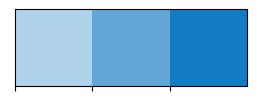

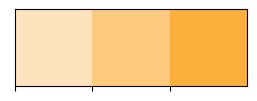

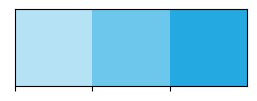

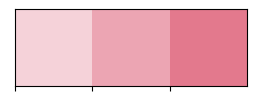

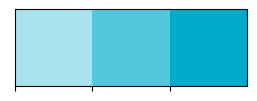

In [140]:
colors_1 = get_color('#FFFFFF',color_1)[0]
colors_2 = get_color('#FFFFFF',color_2)[0]
colors_3 = get_color('#FFFFFF',color_3)[0]
colors_4 = get_color('#FFFFFF',color_4)[0]
colors_5 = get_color('#FFFFFF',color_5)[0]

In [141]:
p1_Gauge = (
    Gauge()
    .add("", [("\n"*10+f"专业知识和技能"+ "\n"+ f"{zyzsjn_score_avg:.2f}分",zyzsjn_score_avg)], radius="45%",min_=0,max_=5,
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string_1,font_size=22,font_family="Bahnschrift SemiLight Condensed"),
         title_label_opts=opts.LabelOpts(font_size=22,font_family="Bahnschrift SemiLight Condensed",color=color_1,font_weight='bolder'))
    .set_series_opts(center = ['10%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_1[0]], [0.7, colors_1[1]], [1, colors_1[2]]], width=30)))
)
p2_Gauge = (
    Gauge()
    .add("", [("\n"*10+f"适应能力"+ "\n"+ f"{synl_score_avg:.2f}分", synl_score_avg)], radius="45%",min_=0,max_=5,
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string_2,font_size=22,font_family="Bahnschrift SemiLight Condensed"),
         title_label_opts=opts.LabelOpts(font_size=22,font_family="Bahnschrift SemiLight Condensed",color=color_2,font_weight='bolder'))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['30%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_2[0]], [0.7, colors_2[1]], [1, colors_2[2]]], width=30)))
)
p3_Gauge = (
    Gauge()
    .add("", [("\n"*10+f"可迁移能力"+ "\n"+ f"{kqynl_score_avg:.2f}分", kqynl_score_avg)], radius="45%",min_=0,max_=5,
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string_3,font_size=22,font_family="Bahnschrift SemiLight Condensed"),
         title_label_opts=opts.LabelOpts(font_size=22,font_family="Bahnschrift SemiLight Condensed",color=color_3,font_weight='bolder'))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['50%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_3[0]], [0.7, colors_3[1]], [1, colors_3[2]]], width=30)))
)
p4_Gauge = (
    Gauge()
    .add("", [("\n"*10+f"职业认知"+ "\n"+ f"{zyrz_score_avg:.2f}分", zyrz_score_avg)], radius="45%",min_=0,max_=5,
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string_4,font_size=22,font_family="Bahnschrift SemiLight Condensed"),
         title_label_opts=opts.LabelOpts(font_size=22,font_family="Bahnschrift SemiLight Condensed",color=color_4,font_weight='bolder'))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['70%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_4[0]], [0.7, colors_4[1]], [1, colors_4[2]]], width=30)))
)
p5_Gauge = (
    Gauge()
    .add("", [("\n"*10+f"个人特质"+ "\n"+ f"{grtz_score_avg:.2f}分", grtz_score_avg)], radius="45%",min_=0,max_=5,
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string_5,font_size=22,font_family="Bahnschrift SemiLight Condensed"),
         title_label_opts=opts.LabelOpts(font_size=22,font_family="Bahnschrift SemiLight Condensed",color=color_5,font_weight='bolder'))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['90%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_5[0]], [0.7, colors_5[1]], [1, colors_5[2]]], width=30)))
)
grid = (
     Grid(init_opts=opts.InitOpts(width='1500px',height='600px'))
    .add(p1_Gauge, grid_opts=opts.GridOpts(pos_right=""))
    .add(p2_Gauge, grid_opts=opts.GridOpts(pos_left=""))
    .add(p3_Gauge, grid_opts=opts.GridOpts(pos_left=""))
    .add(p4_Gauge, grid_opts=opts.GridOpts(pos_left=""))
    .add(p5_Gauge, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [142]:
make_snapshot(snapshot,grid.render(), pic_path+f'用人单位对毕业生能力和素质的评价.png',pixel_ratio = 5)
add_pic('用人单位对毕业生能力和素质的评价',15.24)
write_tz('用人单位对毕业生能力和素质的评价')

## 二、用人单位对学校评价

### （一）人才培养评价

#### 1.人才培养认同度

In [143]:
Heading_2("二、用人单位对学校评价")
Heading_3("（一）人才培养评价")
Heading_4("1.人才培养认同度")
write_zw(f'''用人单位对学校人才培养的认同度为{index_scores_proportion('cdy_rcpyppd',False)[2]}''')
dy_pie('cdy_rcpyppd')

100.00%，其中“非常匹配”占比22.32%，“匹配”占比54.46%，“比较匹配”占比23.21%。


In [144]:
write_tz('用人单位对学校人才培养认同度')

#### 2.人才培养建议

In [145]:
Heading_4("2.人才培养建议")
write_zw(f'''用人单位认为学校在人才培养方面应该提升的方面主要为{index_multiple_options_top('cdy_rcpyjy',True)[0]}''')
pictorial_sorm('cdy_rcpyjy','m',height='450px',pos_left='40%')

[6.0, 13.0, 26.0, 28.0, 32.0, 33.0, 61.0, 65.0] 264.0 function (params) {return (params.value/112*100).toFixed(2)+ '%'}


In [146]:
write_tz('用人单位对学校人才培养建议（多选题）')

### （二）就业服务评价

#### 1.就业服务满意度

In [147]:
Heading_3("（二）就业服务评价")
Heading_4("1.就业服务满意度")

In [148]:
data = radar_map('cdy_jyfwpj','auto',False)[1]
data = data.apply(lambda x: '%.2f' % x)

jyfwmyd_ratio = round(index_scores_proportion('cdy_jyfwmyd',False)[0],2).rename(index={'5':"非常满意",'4':"满意",'3':"比较满意",'2':"不太满意",'1':"不满意"})
jyfwmyd_name_ratio = [*zip(jyfwmyd_ratio.index,jyfwmyd_ratio.values)]
jyfw_myd = index_scores_proportion('cdy_jyfwmyd',False)[1]
jyfw_myd

100.0

In [149]:
#如果排名有并列，一起输出
list_index = []
text_jyfwpj = ''
for value in list(data.unique()[:3]):
    list_index.extend(list(data[data==value].index))

for index in list_index:
    text_jyfwpj += f'“{index_dict[index]}”（{data[index]}分）、'
text_jyfwpj = text_jyfwpj[:-1] + '。'
text_jyfwpj

write_zw(f'''用人单位对学校就业服务满意度为{index_scores_proportion('cdy_jyfwmyd',False)[2]}''')
write_zw('用人单位对学校就业服务的评价相对较高的方面主要为'+ text_jyfwpj)

In [150]:
radar_name = []
c_schema = []
c_symbol = []
for i in data.index:
    radar_name.append(index_dict[i])
        
for i in range(len(radar_name)):
    c_schema.append({"name": radar_name[i], "max": 5, "min": 0})
    
c_symbol.append({"value": data.tolist(), "symbol": "circle","symbolSize": 10})

In [151]:
a = (
    Radar()
    #雷达图样式设置,维度设置
    .add_schema(
        schema=c_schema,
        shape="circle",
        center=["70%", "50%"],
        radius="60%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=6,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False)),
        radiusaxis_opts=opts.RadiusAxisOpts(
            axislabel_opts=opts.LabelOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
            min_=0,
            max_=5,
            interval=1,
            splitarea_opts=opts.SplitAreaOpts(is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        polar_opts=opts.PolarOpts(center=["70%", "50%"],radius="60%"),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
        textstyle_opts=opts.TextStyleOpts(color=color_1,font_size =21,font_family = '宋体'))
    #数据传入
    .add(               
        series_name="",
        data=c_symbol,
        color=color_1,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
        label_opts=opts.LabelOpts(formatter='{c}',font_family='Bahnschrift SemiLight Condensed',font_size=19,font_weight='bolder',position="outside"))
    .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
    
b = (
Pie()
.add("",jyfwmyd_name_ratio,radius=["30%", "55%"],center=["25%", "50%"], 
     label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
            label_opts=opts.LabelOpts(interval=0,
                position="outside",
                formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
                rich={
                    "b": {"fontSize": 21, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                    "per": {"fontSize": 18},
                    "d": {"fontSize": 18, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
                })) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='就业服务满意度',
                              subtitle=f'''      {jyfw_myd}%''',pos_left='18.5%',pos_top='47%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(align='center',font_size = 21,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(align='center',font_size = 21,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False))#去掉图例
)

grid = (
    Grid(init_opts=opts.InitOpts(height='600px',width='1200px'))   #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts())
    .add(b, grid_opts=opts.GridOpts()))
grid.render_notebook()

In [152]:
make_snapshot(snapshot,grid.render(), pic_path+f'用人单位对学校就业服务评价.png',pixel_ratio = 5)
add_pic('用人单位对学校就业服务评价',15.24)
write_tz('用人单位对学校就业服务评价')

#### 2.就业服务建议

In [153]:
Heading_4("2.就业服务建议")
write_zw(f'''用人单位认为学校在就业服务方面最需要加强的为{index_multiple_options_top('cdy_jyfwjy',True)[0]}''')
pictorial_sorm('cdy_jyfwjy','m',height='500px')

[2.0, 2.0, 4.0, 5.0, 15.0, 35.0, 41.0, 46.0, 102.0, 107.0, 112.0] 471.0 function (params) {return (params.value/199*100).toFixed(2)+ '%'}


In [154]:
write_tz('用人单位对学校就业服务建议（多选题）')

#### 3.到学校招聘原因

In [155]:
Heading_4("3.到学校招聘原因")
write_zw(f'''用人单位选择到校招聘毕业生的主要原因为{index_multiple_options_top('cdy_lxzpyy',True)[0]}''')
pictorial_sorm('cdy_lxzpyy','m',height='420px')

[29.0, 38.0, 41.0, 49.0, 71.0, 75.0, 146.0] 449.0 function (params) {return (params.value/199*100).toFixed(2)+ '%'}


In [156]:
write_tz('用人单位到学校招聘原因（多选题）')

document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第八章      校园招聘分析

In [157]:
sql5='''
select a.school_name,b.about_major,b.job_name,job_number ,b.company_name,c.industry_category,c.company_property from 	
(select 
    c.company_id,b.`publish_id`,d.school_id,d.`school_name`,d.province_name,d.city_name
    from c_career_talk a
         inner join c_career_talk_job b on a.career_talk_id=b.career_talk_id
         inner join c_company c on a.company_id=c.company_id
         inner join sch_school d on a.school_id=d.school_id
	  where d.school_name='%s'
    UNION 
    select 
    d.company_id,b.`publish_id`,f.school_id,f.`school_name`,f.province_name,f.city_name
    from c_jobfair_apply a 
         inner join c_jobfair_apply_job b on a.apply_id=b.apply_id
         inner join sch_job_fair c on a.fair_id=c.fair_id
         inner join c_company d on a.company_id=d.company_id
         inner join sch_school f on a.school_id=f.school_id
	  where f.school_name='%s'
    UNION
    select
    d.company_id,c.`publish_id`,f.school_id,f.`school_name`,f.province_name,f.city_name
    from sch_online_recruitment a
         left join c_sch_income g on a.school_id=g.school_id and a.company_id=g.company_id
         inner join c_recruitment_job c on a.recruitment_id=c.recruitment_id
         inner join c_company d on a.company_id=d.company_id
         inner join sch_school f on a.school_id=f.school_id
    where f.school_name='%s' and a.is_delete=0 and (a.company_id=0 or (d.state in ('已通过','认证中') and a.state='已发布' and g.state='已通过' and g.is_blacklist=0))) a
inner join c_job_publish b on a.publish_id=b.publish_id
inner join c_company c on a.company_id=c.company_id

'''%(f"{xxmc}",f"{xxmc}",f"{xxmc}")
df_zp = pd.read_sql(sql=sql5,con=conn_2) #执行查询语句并将毕业生调研数据置于df
df_zp

D:\anocodar\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,school_name,about_major,job_name,job_number,company_name,industry_category,company_property
0,西安工业大学,电子信息工程，自动化，通信工程，网络工程，计算机科学与技术，软件工程,硬件开发工程师,10,北京长焜科技有限公司,信息传输、软件和信息技术服务业,民营企业
1,西安工业大学,通信工程，计算机科学与技术，软件工程,IT工程师,5,富士胶片制造（深圳）有限公司,制造业,三资企业
2,西安工业大学,不限专业,质量工程师,3,陶丽西（苏州）陶瓷釉色料有限公司,制造业,三资企业
3,西安工业大学,不限专业,容器设计工程师,30,豪迈集团股份有限公司,制造业,其他企业
4,西安工业大学,产品设计，动画，环境设计，视觉传达设计,插画设计,5,杭州全速网络技术有限公司,信息传输、软件和信息技术服务业,民营企业
...,...,...,...,...,...,...,...
7768,西安工业大学,不限专业,摄影师,2,西安洞洞幺文化传媒有限公司,租赁和商务服务业,其他企业
7769,西安工业大学,电子信息工程，电子信息科学与技术，电气工程及其自动化，通信工程，数学与应用数学，光电信息科学...,数字IC版图设计工程师,5,西安智诚微电子科技有限公司,信息传输、软件和信息技术服务业,民营企业
7770,西安工业大学,计算机科学与技术,网站运营,7,深圳市元亨瑞视科技有限公司,制造业,民营企业
7771,西安工业大学,不限专业,机械工程师2021.03.23,15,中建材凯盛机器人四川有限公司,制造业,国有企业


In [158]:
sql_dwrz=f"""select if(month(income_time)>8,(year(income_time)+1)||'届',year(income_time)||'届') as jb,school_id,school_name,company_name,
industry_category,company_property,scale,company_id,company_province,company_city
from(
select cast(if(YEAR(FROM_UNIXTIME(a.create_time))<2015,'2015-01-01 00:00:00',FROM_UNIXTIME(a.create_time)) as timestamp)as income_time,
cast(a.school_id as varchar) as school_id,
c.school_name,b.company_name,b.industry_category,b.company_property,b.scale,b.company_id,
case when b.province in ('西藏','内蒙古') then b.province||'自治区'
            when b.province in ('广西') then b.province||'壮族自治区' 
            when b.province in ('新疆') then b.province||'维吾尔自治区' 
            when b.province in ('宁夏') then b.province||'回族自治区'
            when b.province in ('香港','澳门') then b.province||'特别行政区'
            when b.province in ('北京','上海','天津','重庆') then b.province||'市' 
            when length(b.province) = 0 then b.province   
            else b.province||'省' end as company_province,
b.city_name as company_city
from c_sch_income a inner join
(select distinct company_id,company_name,registered_capital,label,stock_code,mobile,job_mobile,tel,mail,job_mail,hr,city_name,address,post_code,org_code,area_name,m_company_id,
regexp_replace(province,'省|壮族自治区|维吾尔自治区|回族自治区|自治区|特别行政区|市','') as province,
case when industry_category in ("信息传输、软件和信息技术服务业","计算机/互联网/通信/电子","软件和信息技术服务业") then "信息传输、软件和信息技术服务业"
		 when industry_category in ("建筑业","房地产/建筑") then "建筑业"
		 when industry_category in ("科学研究和技术服务业") then "科学研究和技术服务业"
		 when industry_category in ("租赁和商务服务业") then "租赁和商务服务业"
		 when industry_category in ("批发和零售业","批发业","零售业") then "批发和零售业"
		 when industry_category in ("教育","教育业","专业服务/教育/培训") then "教育"
		 when industry_category in ("金融业","会计/金融/银行/保险") then "金融业"
		 when industry_category in ("制造业","贸易/消费/制造/营运") then "制造业"
		 when industry_category in ("住宿和餐饮业") then "住宿和餐饮业"
		 when industry_category in ("公共管理、社会保障和社会组织","政府/非盈利机构/其他") then "公共管理、社会保障和社会组织"
		 when industry_category in ("卫生和社会工作","制药/医疗") then "卫生和社会工作"
		 when industry_category in ("文化、体育和娱乐业","广告/媒体") then "文化、体育和娱乐业"
		 when industry_category in ("居民服务、修理和其他服务业","服务业") then "居民服务、修理和其他服务业"
		 when industry_category in ("房地产业") then "房地产业"
		 when industry_category in ("交通运输、仓储和邮政业","物流/运输") then "交通运输、仓储和邮政业"
		 when industry_category in ("军队") then "军队"
		 when industry_category in ("电力、热力、燃气及水生产和供应业","能源/原材料") then "电力、热力、燃气及水生产和供应业"
		 when industry_category in ("水利、环境和公共设施管理业") then "水利、环境和公共设施管理业"
		 when industry_category in ("采矿业") then "采矿业"
		 when industry_category in ("农、林、牧、渔业") then "农、林、牧、渔业"
		 when industry_category in ("国际组织") then "国际组织" else "其他" end as industry_category,
 case when company_property in ("民营企业","其他企业","股份制企业","私营企业","上市公司") then "其他企业"
        when company_property in ("国有企业","国有及集体企业") then "国有企业"
        when company_property in ("三资企业","中外合资","外资企业","外商独资/代表处","港澳台及外资企业") then "三资企业"
        when company_property in ("医疗卫生单位") then "医疗卫生单位"
        when company_property in ("中初教育单位") then "中初教育单位"
        when company_property in ("其他事业单位") then "其他事业单位"
        when company_property in ("机关","党政机关") then "机关"
        when company_property in ("高等教育单位") then "高等教育单位"
        when company_property in ("科研设计单位","科研单位") then "科研设计单位"
        when company_property in ("部队") then "部队"
        when company_property in ("城镇社区") then "城镇社区"
        when company_property in ("农村建制村") then "农村建制村" ELSE "其他" end AS company_property,
 case when scale ="50-150人" then "50-150人"
        when scale ="少于50人" then "少于50人"
        when scale ="150-500人" then "150-500人"
        when scale ="500-1000人" then "500-1000人"
        when scale ="1000-5000人" then "1000-5000人"
        when scale ="10000人以上" then "10000人以上"
        when scale ="5000-10000人" then "5000-10000人" else "其他" end as scale,last_login_time
from c_company where is_disable=0 and state<>'未通过' and is_cancel_recruit = 0 and province not regexp '[0-9]') b on a.company_id=b.company_id
inner join 
(select a.school_id,a.school_name,a.school_code,a.is_211,a.is_985,b.xxcc as is_syl,b.xxlx as school_type,b.bxcc as school_level,b.xxhy as school_industry,
a.area_name,a.province_name,
case when a.city_name in ('长沙市','长沙') then '长沙'
     when a.city_name in ('株洲','株州') then '株洲'
     when a.city_name in ('湘潭','湘潭市') then '湘潭'
     when a.city_name in ('岳阳','岳阳市') then '岳阳'
     when length(a.city_name) = 0 then "其他" else a.city_name end as city_name
from sch_school a left join standard_code.dim_school b on a.school_name=b.xxmc
where a.is_yun=1 and a.is_online=1) c on a.school_id=c.school_id
where a.is_delete=0 and a.is_blacklist=0 and a.state='已通过' and c.school_name ='{xxmc}' )
where if(month(income_time)>8,(year(income_time)+1),year(income_time))>2015

"""
df_dwrz = pd.read_sql(sql=sql_dwrz,con=conn_2) #执行查询语句并将毕业生调研数据置于df
df_dwrz

D:\anocodar\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,jb,school_id,school_name,company_name,industry_category,company_property,scale,company_id,company_province,company_city
0,2022届,2419,西安工业大学,中电鸿信信息科技有限公司,信息传输、软件和信息技术服务业,国有企业,150-500人,370838,江苏省,南京市
1,2022届,2419,西安工业大学,木林森活性炭江苏有限公司,水利、环境和公共设施管理业,其他企业,150-500人,476491,江苏省,南京
2,2022届,2419,西安工业大学,上海钢联物流股份有限公司,交通运输、仓储和邮政业,其他企业,500-1000人,53024,上海市,宝山
3,2022届,2419,西安工业大学,中茂光伏科技集团（西安）有限公司,建筑业,其他企业,150-500人,513257,陕西省,西安市
4,2022届,2419,西安工业大学,中国石油天然气股份有限公司新疆油田分公司,采矿业,国有企业,10000人以上,184589,新疆维吾尔自治区,克拉玛依
...,...,...,...,...,...,...,...,...,...,...
5258,2022届,2419,西安工业大学,中铁宝桥（舟山）有限公司,制造业,国有企业,150-500人,489246,浙江省,舟山市
5259,2022届,2419,西安工业大学,西安秋池餐饮管理有限公司,住宿和餐饮业,其他企业,500-1000人,494057,陕西省,西安市
5260,2022届,2419,西安工业大学,普源精电科技股份有限公司,信息传输、软件和信息技术服务业,其他,5000-10000人,370737,江苏省,苏州市
5261,2022届,2419,西安工业大学,陕西橘子教育科技有限公司,教育,其他企业,150-500人,188524,陕西省,西安


## 一、 单位储备情况

In [263]:


dwcbsl = df_dwrz.query(f"jb in ('{bynd-3}届','{bynd-2}届','{bynd-1}届','{bynd}届')").groupby('jb').count()['company_id']

dwcb = (
    Bar(init_opts = opts.InitOpts(height = '400px',width='600px'))#设置图形大小,高度:height,宽度:width
    .add_xaxis(dwcbsl.index.tolist())
    .add_yaxis("",dwcbsl.tolist(),bar_width=30, yaxis_index=0,
               label_opts=opts.LabelOpts(position="top",color=color_1,formatter = '{c}',font_weight='bold',font_size = 14,font_family = 'Times New Roman'),
               itemstyle_opts=opts.ItemStyleOpts(color=color_1))#设置柱形图样式
    .set_global_opts(yaxis_opts=opts.AxisOpts(is_show=False),#不显示y轴
                     xaxis_opts=opts.AxisOpts( axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(color='black',font_size = 16,font_family = '宋体')))
    .extend_axis(                  #增加扩展轴     
        yaxis=opts.AxisOpts(
            name="",
            type_="value",
           #设置次坐标轴最大值
            position="right",
            is_show = False
            )
        )
)
line1 = (  #折线图
    Line(init_opts = opts.InitOpts(height = '400px',width='600px'))
    .add_xaxis(dwcbsl.index.tolist())#x轴
    .add_yaxis(
        "",
        dwcbsl.tolist(),#数据
        is_smooth=True,
        label_opts=opts.LabelOpts(is_show=False,position='top',
                                  #formatter=JsCode("function (params) {return params.value[1]}"),
                                  font_size = 16,font_family = 'Times New Roman'),
        yaxis_index=1,
        linestyle_opts=opts.LineStyleOpts(color=f'{color_1}',width=1.5),
        itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}')
    )

)
dwcb.overlap(line1).render_notebook()

In [264]:
xzdw_count = df_dwrz.count()['company_id']
document.add_picture(pic_path+'一级标题底色.png')

Heading_1("第八章      校园招聘分析")
write_zw(f'''校园招聘分析数据来源于{xxmc}“云就业”管理平台、“{xxmc}{bynd}届毕业生就业质量调研问卷”、“{xxmc}{bynd}年重点用人单位调研问卷”，校园招聘分析主要从单位储备情况、参会用人单位情况、校园招聘信息、校招行为分析四个方面进行分析。''')
Heading_2("一、 单位储备情况")
write_zw(f'''以用人单位入驻时间来衡量，学校截止到{bynd}年8月31日校园招聘单位库中共积累{xzdw_count}家用人单位，其中{bynd}届新入驻单位有{dwcbsl[f'{bynd}届']}家。''')

In [265]:
make_snapshot(snapshot,dwcb.render(), pic_path+f'入驻单位储备.png',pixel_ratio = 5)
add_pic('入驻单位储备',13.24)
write_tz('学校单位储备情况')

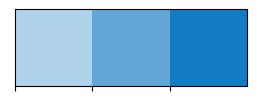

In [277]:
dwdy = df_dwrz.query(f"jb == '{bynd}届'").groupby('company_province').count()['company_id'].sort_values(ascending=False)
dwdy_ratio =(dwdy/dwdy.sum()*100).round(2)
dwdy_ratio_1=max(dwdy_ratio)*1.3-dwdy_ratio#构建辅助条形图数据 
dwdy_count_zip = [*zip(dwdy.index.tolist(),dwdy_ratio)]#构建省份和对应统计人数的列表,地图数据传入的指定格式
for i in range(len(dwdy_count_zip)):
    dwdy_count_zip[i]=[dwdy_count_zip[i][0].strip('省市自治区壮族维吾尔回族特别行政'),dwdy_count_zip[i][1]]

dwdy_map= (
    Map()
    .add("",dwdy_count_zip,"china",is_map_symbol_show = False,is_roam = False,#数据传入,地图类型设置:中国地图"china"
         name_map=dict_sf,
         #label_opts=opts.LabelOpts(formatter= '{b}\n{c}%',font_size=13,font_family = '宋体'),#标签设置
         itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6')) #图形的描边颜色
    .set_global_opts(
         visualmap_opts=opts.VisualMapOpts(max_ = dwdy_count_zip[1][1],min_ = dwdy_count_zip[len(dwdy_count_zip)-1][1],
                                          range_color = get_color('#FFFFFF',color_1)[0]))#颜色渐变设置
    )

dwdy_map.render_notebook()

In [275]:
dwdy_count_zip

[['陕西', 28.63],
 ['广东', 15.12],
 ['浙江', 9.8],
 ['北京', 9.43],
 ['江苏', 7.1],
 ['上海', 6.11],
 ['山东', 3.42],
 ['四川', 2.86],
 ['湖北', 2.01],
 ['河南', 1.87],
 ['福建', 1.78],
 ['安徽', 1.58],
 ['湖南', 1.25],
 ['重庆', 1.08],
 ['天津', 1.05],
 ['河北', 0.95],
 ['辽宁', 0.82],
 ['甘肃', 0.66],
 ['新疆', 0.66],
 ['山西', 0.62],
 ['江西', 0.59],
 ['贵州', 0.46],
 ['内蒙古', 0.46],
 ['广西', 0.43],
 ['云南', 0.3],
 ['黑龙江', 0.2],
 ['吉林', 0.2],
 ['宁夏', 0.16],
 ['青海', 0.16],
 ['海南', 0.1],
 ['=VLOOKUP(B', 0.1],
 ['深圳', 0.03]]

## 二、参会用人单位情况

### （一）单位地域

In [278]:
Heading_2("二、参会用人单位情况")
Heading_3("（一）单位地域")

write_zw(f'''参与学校{bynd}届毕业生校园招聘活动的用人单位中，单位所在地主要分布在“{dwdy_ratio.index[0]}”（占比{dwdy_ratio[0]:.2f}%）、“{dwdy_ratio.index[1]}”（占比{dwdy_ratio[1]:.2f}%）、“{dwdy_ratio.index[2]}”（占比{dwdy_ratio[2]:.2f}%）。''')

In [279]:
make_snapshot(snapshot,dwdy_map.render(), pic_path+f'校招省份地图.png',pixel_ratio = 5)
add_pic('校招省份地图',15.24)

In [280]:
picture_reversal_bar(dwdy_ratio.sort_values(ascending=True).index.tolist(),dwdy_ratio.sort_values(ascending=True).tolist(),dwdy_ratio_1,'校招单位省份',reversal_bar_width=15,axislabel_fontsize=15,height='1000px')[1]

In [281]:
add_pic('校招单位省份',15.24)
write_tz('校招单位地域分布')

### （二）单位行业

In [167]:
dwhy = df_dwrz.query(f"jb == '{bynd}届'").groupby('industry_category').count()['company_id'].sort_values(ascending=True)

value_count_1 = []
for i in range(dwhy.shape[0]):
    value_count_1.append(max(dwhy)*1.3)#构建辅助条形图数据 
p = pictorial_reversal_bar(x_data=dwhy.index.tolist(),y1_data=dwhy.tolist(),y2_data=value_count_1,all_count=dwhy.sum(),height='900px',picture_name='校招单位行业')[1]
p

[1, 1, 1, 16, 18, 18, 19, 20, 32, 43, 45, 47, 60, 77, 90, 105, 110, 140, 178, 306, 633, 1082] 3042 function (params) {return (params.value/3042*100).toFixed(2)+ '%'}


In [168]:
dwhy_ratio = round(dwhy/dwhy.sum()*100,2)
Heading_3("（二）单位行业")
write_zw(f'''参与学校{bynd}届校园招聘活动的用人单位中，单位行业主要为“{dwhy_ratio.index[-1]}”（占比{dwhy_ratio[-1]:.2f}%）、“{dwhy_ratio.index[-2]}”（占比{dwhy_ratio[-2]:.2f}%）、“{dwhy_ratio.index[-3]}”（占比{dwhy_ratio[-3]:.2f}%）。''')

In [169]:
add_pic('校招单位行业',15.24)
write_tz('校招单位行业分布')

### （三）单位性质 

In [170]:
dwxz = df_dwrz.query(f"jb == '{bynd}届'").groupby('company_property').count()['company_id'].sort_values(ascending=True)

value_count_1 = []
for i in range(dwxz.shape[0]):
    value_count_1.append(max(dwxz)*1.3)#构建辅助条形图数据 
p = pictorial_reversal_bar(x_data=dwxz.index.tolist(),y1_data=dwxz.tolist(),y2_data=value_count_1,all_count=dwxz.sum(),height='500px',picture_name='校招单位性质')[1]
p

[7, 9, 19, 22, 32, 35, 208, 222, 672, 1816] 3042 function (params) {return (params.value/3042*100).toFixed(2)+ '%'}


In [171]:
dwxz_ratio = round(dwxz/dwxz.sum()*100,2)
Heading_3("（三）单位性质")
write_zw(f'''参与学校{bynd}届校园招聘活动的用人单位中，单位性质主要为“{dwxz_ratio.index[-1]}”（占比{dwxz_ratio[-1]:.2f}%）、“{dwxz_ratio.index[-2]}”（占比{dwxz_ratio[-2]:.2f}%）、“{dwxz_ratio.index[-3]}”（占比{dwxz_ratio[-3]:.2f}%）。''')

In [172]:
add_pic('校招单位性质',15.24)
write_tz('校招单位性质分布')

## 三、校园招聘信息

In [173]:
career_talk_sql =f'''select cast(a.career_talk_id as varchar) as career_talk_id,a.meet_name,cast(a.company_id as varchar) as company_id,a.industry_category,a.company_property,a.scale,a.meet_time,
if(MONTH(a.meet_time)>8,year(a.meet_time)+1,year(a.meet_time)) as jb,a.company_name,if(a.recept_faculty in('') or a.recept_faculty regexp "招生|就业|推荐|无|招聘|校招",'招生就业工作处',a.recept_faculty) as recept_faculty,
a.type_desc,MONTH(a.meet_time)||'月' as month
from
(select a.career_talk_id,a.meet_name,a.company_id,c.industry_category,c.company_property,c.scale,a.m_company_id,a.school_id,a.school_name,
a.address,FROM_UNIXTIME(a.meet_time) as meet_time,c.company_name,a.recept_faculty,
b.city_name as school_city,b.province_name as school_province,b.school_type,b.school_industry,b.school_level,b.is_syl,a.is_yun as type,case when a.is_yun=1 then '云宣讲' else '宣讲会' end as type_desc
from c_career_talk a inner join (select a.school_id,a.school_name,a.school_code,a.is_211,a.is_985,b.xxcc as is_syl,b.xxlx as school_type,b.bxcc as school_level,b.xxhy as school_industry,
a.area_name,a.province_name,
case when a.city_name in ('长沙市','长沙') then '长沙'
     when a.city_name in ('株洲','株州') then '株洲'
     when a.city_name in ('湘潭','湘潭市') then '湘潭'
     when a.city_name in ('岳阳','岳阳市') then '岳阳'
     when length(a.city_name) = 0 then "其他" else a.city_name end as city_name
from sch_school a left join standard_code.dim_school b on a.school_name=b.xxmc
where a.is_yun=1 and a.is_online=1) b on a.school_id=b.school_id
inner join (select distinct company_id,company_name,registered_capital,label,stock_code,mobile,job_mobile,tel,mail,job_mail,hr,
province,city_name,address,post_code,org_code,area_name,m_company_id,
case when industry_category in ("信息传输、软件和信息技术服务业","计算机/互联网/通信/电子","软件和信息技术服务业") then "信息传输、软件和信息技术服务业"
when industry_category in ("建筑业","房地产/建筑") then "建筑业"
when industry_category in ("科学研究和技术服务业") then "科学研究和技术服务业"
 when industry_category in ("租赁和商务服务业") then "租赁和商务服务业"
 when industry_category in ("批发和零售业","批发业","零售业") then "批发和零售业"
 when industry_category in ("教育","教育业","专业服务/教育/培训") then "教育"
 when industry_category in ("金融业","会计/金融/银行/保险") then "金融业"
 when industry_category in ("制造业","贸易/消费/制造/营运") then "制造业"
 when industry_category in ("住宿和餐饮业") then "住宿和餐饮业"
when industry_category in ("公共管理、社会保障和社会组织","政府/非盈利机构/其他") then "公共管理、社会保障和社会组织"
 when industry_category in ("卫生和社会工作","制药/医疗") then "卫生和社会工作"
when industry_category in ("文化、体育和娱乐业","广告/媒体") then "文化、体育和娱乐业"
 when industry_category in ("居民服务、修理和其他服务业","服务业") then "居民服务、修理和其他服务业"
 when industry_category in ("房地产业") then "房地产业"
 when industry_category in ("交通运输、仓储和邮政业","物流/运输") then "交通运输、仓储和邮政业"
 when industry_category in ("军队") then "军队"
 when industry_category in ("电力、热力、燃气及水生产和供应业","能源/原材料") then "电力、热力、燃气及水生产和供应业"
 when industry_category in ("水利、环境和公共设施管理业") then "水利、环境和公共设施管理业"
 when industry_category in ("采矿业") then "采矿业"
 when industry_category in ("农、林、牧、渔业") then "农、林、牧、渔业"
 when industry_category in ("国际组织") then "国际组织" else "其他" end as industry_category,
 case when company_property in ("民营企业","其他企业","股份制企业","私营企业","上市公司") then "民营企业"
        when company_property in ("国有企业","国有及集体企业") then "国有企业"
        when company_property in ("三资企业","中外合资","外资企业","外商独资/代表处","港澳台及外资企业") then "三资企业"
        when company_property in ("医疗卫生单位") then "医疗卫生单位"
        when company_property in ("中初教育单位") then "中初教育单位"
        when company_property in ("其他事业单位") then "其他事业单位"
        when company_property in ("机关","党政机关") then "机关"
        when company_property in ("高等教育单位") then "高等教育单位"
        when company_property in ("科研设计单位","科研单位") then "科研设计单位"
        when company_property in ("部队") then "部队"
        when company_property in ("城镇社区") then "城镇社区"
        when company_property in ("农村建制村") then "农村建制村" ELSE "其他" end AS company_property,
 case when scale ="50-150人" then "50-150人"
        when scale ="少于50人" then "少于50人"
        when scale ="150-500人" then "150-500人"
        when scale ="500-1000人" then "500-1000人"
        when scale ="1000-5000人" then "1000-5000人"
        when scale ="10000人以上" then "10000人以上"
        when scale ="5000-10000人" then "5000-10000人" else "其他" end as scale
from c_company where is_disable=0 and state<>'未通过' and is_cancel_recruit = 0 ) c on a.company_id=c.company_id
where a.is_delete=0 and a.is_publish=1 and a.book_state='已同意' and FROM_UNIXTIME(a.meet_time) between date_add(now(), interval -1 year) and date_add(now(),interval 1 month)) a
where if(MONTH(a.meet_time)>8,year(a.meet_time)+1,year(a.meet_time)) = '{bynd}' and a.school_name ='{xxmc}'

'''
df_xjh = pd.read_sql(sql=career_talk_sql,con=conn_2) #执行查询语句并将毕业生调研数据置于df
df_xjh

D:\anocodar\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,career_talk_id,meet_name,company_id,industry_category,company_property,scale,meet_time,jb,company_name,recept_faculty,type_desc,month
0,499987,河南济源钢铁（集团）有限公司,33764,制造业,民营企业,5000-10000人,2022-03-17 10:00:00,2022,河南济源钢铁（集团）有限公司,招生就业工作处,宣讲会,3月
1,505142,浙江省工业设备安装集团有限公司,122361,建筑业,国有企业,1000-5000人,2022-04-22 14:30:00,2022,浙江省工业设备安装集团有限公司,招生就业工作处,宣讲会,4月
2,504607,养生堂·农夫山泉 “堂堂新生”2022春季招聘会,277123,批发和零售业,民营企业,10000人以上,2022-04-08 19:00:00,2022,养生堂有限公司,招生就业工作处,宣讲会,4月
3,500089,CVTE视源股份22春招线下宣讲会,398639,科学研究和技术服务业,科研设计单位,10000人以上,2022-03-17 18:30:00,2022,广州视琨电子科技有限公司,招生就业工作处,宣讲会,3月
4,507733,腾讯云智研发公司2023届实习生招聘,417179,信息传输、软件和信息技术服务业,三资企业,1000-5000人,2022-05-16 19:00:00,2022,腾讯云计算（西安）有限责任公司,招生就业工作处,宣讲会,5月
...,...,...,...,...,...,...,...,...,...,...,...,...
111,501257,宇信科技2022校园招聘宣讲会,49275,信息传输、软件和信息技术服务业,三资企业,5000-10000人,2022-03-16 12:00:00,2022,北京宇信科技集团股份有限公司,招生就业工作处,宣讲会,3月
112,498958,天水华天科技股份有限公司2022年校园招聘会,118744,制造业,民营企业,10000人以上,2022-03-24 16:00:00,2022,天水华天科技股份有限公司,招生就业工作处,宣讲会,3月
113,505829,此“克”即未来—森思泰克空中宣讲会,160871,科学研究和技术服务业,民营企业,500-1000人,2022-04-27 14:00:00,2022,森思泰克河北科技有限公司,招生就业工作处,云宣讲,4月
114,508436,旗滨集团校园招聘,171017,制造业,民营企业,5000-10000人,2022-05-12 10:00:00,2022,株洲旗滨集团股份有限公司,招生就业工作处,云宣讲,5月


In [174]:
career_talk_sql_1 =f''' select t1.num,t2.num total,t1.industry_category,t1.years,t1.months from
(select count(a.career_talk_id) as num,a.industry_category,year(a.meet_time)||'年' as years,MONTH(a.meet_time) as months
from
(select a.career_talk_id,a.meet_name,a.company_id,c.industry_category,a.school_id,a.school_name,FROM_UNIXTIME(a.meet_time) as meet_time,c.company_name,a.is_yun as type,case when a.is_yun=1 then '云宣讲' else '宣讲会' end as type_desc
from c_career_talk a
inner join (select distinct company_id,company_name,
case when industry_category in ("信息传输、软件和信息技术服务业","计算机/互联网/通信/电子","软件和信息技术服务业") then "信息传输、软件和信息技术服务业"
when industry_category in ("建筑业","房地产/建筑") then "建筑业"
when industry_category in ("科学研究和技术服务业") then "科学研究和技术服务业"
 when industry_category in ("租赁和商务服务业") then "租赁和商务服务业"
 when industry_category in ("批发和零售业","批发业","零售业") then "批发和零售业"
 when industry_category in ("教育","教育业","专业服务/教育/培训") then "教育"
 when industry_category in ("金融业","会计/金融/银行/保险") then "金融业"
 when industry_category in ("制造业","贸易/消费/制造/营运") then "制造业"
 when industry_category in ("住宿和餐饮业") then "住宿和餐饮业"
when industry_category in ("公共管理、社会保障和社会组织","政府/非盈利机构/其他") then "公共管理、社会保障和社会组织"
 when industry_category in ("卫生和社会工作","制药/医疗") then "卫生和社会工作"
when industry_category in ("文化、体育和娱乐业","广告/媒体") then "文化、体育和娱乐业"
 when industry_category in ("居民服务、修理和其他服务业","服务业") then "居民服务、修理和其他服务业"
 when industry_category in ("房地产业") then "房地产业"
 when industry_category in ("交通运输、仓储和邮政业","物流/运输") then "交通运输、仓储和邮政业"
 when industry_category in ("军队") then "军队"
 when industry_category in ("电力、热力、燃气及水生产和供应业","能源/原材料") then "电力、热力、燃气及水生产和供应业"
 when industry_category in ("水利、环境和公共设施管理业") then "水利、环境和公共设施管理业"
 when industry_category in ("采矿业") then "采矿业"
 when industry_category in ("农、林、牧、渔业") then "农、林、牧、渔业"
 when industry_category in ("国际组织") then "国际组织" else "其他" end as industry_category
from c_company where is_disable=0 and state<>'未通过' and is_cancel_recruit = 0 ) c on a.company_id=c.company_id
where a.is_delete=0 and a.is_publish=1 and a.book_state='已同意') a
where if(MONTH(a.meet_time)>8,year(a.meet_time)+1,year(a.meet_time)) = '{bynd}' and a.school_name ='{xxmc}'
group by industry_category,year(a.meet_time)||'年',MONTH(a.meet_time)) t1
left join
(select count(a.career_talk_id) as num,a.industry_category
from
(select a.career_talk_id,a.meet_name,a.company_id,c.industry_category,a.school_id,a.school_name,FROM_UNIXTIME(a.meet_time) as meet_time,c.company_name,a.is_yun as type,case when a.is_yun=1 then '云宣讲' else '宣讲会' end as type_desc
from c_career_talk a
inner join (select distinct company_id,company_name,
case when industry_category in ("信息传输、软件和信息技术服务业","计算机/互联网/通信/电子","软件和信息技术服务业") then "信息传输、软件和信息技术服务业"
when industry_category in ("建筑业","房地产/建筑") then "建筑业"
when industry_category in ("科学研究和技术服务业") then "科学研究和技术服务业"
 when industry_category in ("租赁和商务服务业") then "租赁和商务服务业"
 when industry_category in ("批发和零售业","批发业","零售业") then "批发和零售业"
 when industry_category in ("教育","教育业","专业服务/教育/培训") then "教育"
 when industry_category in ("金融业","会计/金融/银行/保险") then "金融业"
 when industry_category in ("制造业","贸易/消费/制造/营运") then "制造业"
 when industry_category in ("住宿和餐饮业") then "住宿和餐饮业"
when industry_category in ("公共管理、社会保障和社会组织","政府/非盈利机构/其他") then "公共管理、社会保障和社会组织"
 when industry_category in ("卫生和社会工作","制药/医疗") then "卫生和社会工作"
when industry_category in ("文化、体育和娱乐业","广告/媒体") then "文化、体育和娱乐业"
 when industry_category in ("居民服务、修理和其他服务业","服务业") then "居民服务、修理和其他服务业"
 when industry_category in ("房地产业") then "房地产业"
 when industry_category in ("交通运输、仓储和邮政业","物流/运输") then "交通运输、仓储和邮政业"
 when industry_category in ("军队") then "军队"
 when industry_category in ("电力、热力、燃气及水生产和供应业","能源/原材料") then "电力、热力、燃气及水生产和供应业"
 when industry_category in ("水利、环境和公共设施管理业") then "水利、环境和公共设施管理业"
 when industry_category in ("采矿业") then "采矿业"
 when industry_category in ("农、林、牧、渔业") then "农、林、牧、渔业"
 when industry_category in ("国际组织") then "国际组织" else "其他" end as industry_category
from c_company where is_disable=0 and state<>'未通过' and is_cancel_recruit = 0 ) c on a.company_id=c.company_id
where a.is_delete=0 and a.is_publish=1 and a.book_state='已同意' ) a
where if(MONTH(a.meet_time)>8,year(a.meet_time)+1,year(a.meet_time)) = '{bynd}' and a.school_name ='{xxmc}'
group by industry_category) t2 on t1.industry_category = t2.industry_category
order by t2.num desc,t1.industry_category,t1.years,t1.months
'''
data = pd.read_sql(sql=career_talk_sql_1,con=conn_2) #执行查询语句并将毕业生调研数据置于df
data

D:\anocodar\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,num,total,industry_category,years,months
0,18,259,制造业,2021年,9
1,140,259,制造业,2021年,10
2,40,259,制造业,2021年,11
3,8,259,制造业,2021年,12
4,29,259,制造业,2022年,3
...,...,...,...,...,...
60,1,2,金融业,2022年,5
61,1,1,住宿和餐饮业,2021年,10
62,1,1,公共管理、社会保障和社会组织,2021年,10
63,1,1,卫生和社会工作,2022年,6


In [175]:
Heading_2("三、 校园招聘信息")
Heading_3("（一）双选会举办情况")
write_zw(f'''{bynd}届我校共举办双选会 场，其中视频双选会举办 场、线下双选会举办 场、专场双选会举办 场。''')

### （二）宣讲会举办情况

In [176]:
Heading_3("（二）宣讲会举办情况")
write_zw(f'''{bynd}届学校共举办宣讲会{data.sum()['num']}场，分月份分行业举办情况如下表所示。''')

month = pd.DataFrame([9,10,11,12,1,2,3,4,5,6],columns=['months'])
trow = len(data['industry_category'].unique())+3
tcol = 12

write_tz('分行业宣讲会举办情况')#题注
table = document.add_table(rows=trow,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '参会行业' 
table.cell(0,0).merge(table.cell(1,0))#合并选中的单元格
table.cell(0,1).text = f'{bynd-1}年'
table.cell(0,1).merge(table.cell(0,4))
table.cell(0,5).text = f'{bynd}年'
table.cell(0,5).merge(table.cell(0,10))
table.cell(1,1).text = '9月'
table.cell(1,2).text = '10月'
table.cell(1,3).text = '11月'
table.cell(1,4).text = '12月'
table.cell(1,5).text = '1月'
table.cell(1,6).text = '2月'
table.cell(1,7).text = '3月'
table.cell(1,8).text = '4月'
table.cell(1,9).text = '5月'
table.cell(1,10).text = '6月'
table.cell(0,11).text = '总计'
table.cell(0,11).merge(table.cell(1,11))

for i in range(2,trow-1):
    for j in range(tcol):
        if j == 0:
            table.cell(i,j).text = data['industry_category'].unique()[i-2]
        elif j == 11:
            table.cell(i,j).text = str(data[data['industry_category'] == data['industry_category'].unique()[i-2]]['total'].unique()[0])
        else:
            if len(data[data['months'] == int(month.loc[j-1])][data['industry_category'] == data['industry_category'].unique()[i-2]]['num']) != 0:
                table.cell(i,j).text = str(int(data[data['months'] == int(month.loc[j-1])][data['industry_category'] == data['industry_category'].unique()[i-2]]['num']))
            else:
                table.cell(i,j).text = '-'
                
#加入尾部汇总行
table.cell(trow-1,0).text='总计'
table.cell(trow-1,1).text=str(data.query(f"months==9").sum()['num'])
table.cell(trow-1,2).text=str(data.query(f"months==10").sum()['num'])
table.cell(trow-1,3).text=str(data.query(f"months==11").sum()['num'])
table.cell(trow-1,4).text=str(data.query(f"months==12").sum()['num'])
table.cell(trow-1,5).text=str(data.query(f"months==1").sum()['num'])
table.cell(trow-1,6).text=str(data.query(f"months==2").sum()['num'])
table.cell(trow-1,7).text=str(data.query(f"months==3").sum()['num'])
table.cell(trow-1,8).text=str(data.query(f"months==4").sum()['num'])
table.cell(trow-1,9).text=str(data.query(f"months==5").sum()['num'])
table.cell(trow-1,10).text=str(data.query(f"months==6").sum()['num'])
table.cell(trow-1,11).text=str(data.sum()['num'])

#调整单元格内部的格式
table_format()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_97604\2506582571.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(data[data['months'] == int(month.loc[j-1])][data['industry_category'] == data['industry_category'].unique()[i-2]]['num']) != 0:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_97604\2506582571.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table.cell(i,j).text = str(int(data[data['months'] == int(month.loc[j-1])][data['industry_category'] == data['industry_category'].unique()[i-2]]['num']))


In [177]:
# month_sort=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
# df_xjh['month'] = df_xjh['month'].astype('category').cat.set_categories(month_sort) #自定义排序

# xjh_month_count = df_xjh.groupby('month').count()['career_talk_id'].sort_index(ascending=True)
# xjh_month_ratio = (xjh_month_count/xjh_month_count.sum()*100).round(2)
# xjh_month_count_1=max(xjh_month_count)*1.3-xjh_month_count#构建辅助条形图数据 

In [178]:
# xjh_month_pic = (
#     Bar(init_opts = opts.InitOpts(height = '700px',width='800px'))#设置图形大小,高度:height,宽度:width
#     .add_xaxis(xjh_month_count.index.tolist())
#     .add_yaxis("",xjh_month_count.tolist(),bar_width=25, yaxis_index=0,
#                label_opts=opts.LabelOpts(position="top",color='black',formatter = '{c}',font_size = 21,font_family = 'Times New Roman'),
#                itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}'))#设置柱形图样式
#     .set_global_opts(yaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
#                      xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 14,font_family = '宋体')))
#     .extend_axis(                  #增加扩展轴     
#         yaxis=opts.AxisOpts(
#             name="",
#             type_="value",
#            #设置次坐标轴最大值
#             position="right",
#             is_show = False
#             )
#         )
# )
# line2 = (  #折线图
#     Line()
#     .add_xaxis(xjh_month_count.index.tolist())#x轴
#     .add_yaxis(
#         "",
#         xjh_month_count.tolist(),#数据
#         is_smooth=True,
#         label_opts=opts.LabelOpts(is_show=False,position='top',
#                                   formatter=JsCode("function (params) {return params.value[1]+'%'}"),
#                                   font_size = 21,font_family = 'Times New Roman'),
#         yaxis_index=1,
#         linestyle_opts=opts.LineStyleOpts(color=f'{color_1}',width=1.5),
#         itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}')
#     )

# )
# xjh_month_pic.overlap(line2).render_notebook()

In [179]:
# make_snapshot(snapshot,xjh_month_pic.render(), pic_path+f'宣讲会月份.png',pixel_ratio = 5)
# add_pic('宣讲会月份',15.24)
# write_tz('宣讲会月份')

In [180]:
# xjh_count = df_xjh.groupby('recept_faculty').count()['career_talk_id'].sort_values(ascending=True)
# xjh_ratio = (xjh_count/xjh_count.sum()*100).round(2)
# xjh_ratio_1=max(xjh_ratio)*1.3-xjh_ratio#构建辅助条形图数据 
# picture_reversal_bar(xjh_ratio.index.tolist(),xjh_ratio.tolist(),xjh_ratio_1,'宣讲会院系分布',reversal_bar_width=15,axislabel_fontsize=15,height='700px')[1]

## 四、 校招行为对比分析

### （一）招聘与求职途径

In [181]:
Heading_2("四、 校招行为对比分析")
Heading_3("（一）招聘与求职途径")
write_zw(f'''通过对用人单位及毕业生的调研数据进行对比分析，统计出用人单位招聘和毕业生求职的主要渠道。''')

In [182]:
write_zw(f'''用人单位主要招聘渠道为{index_multiple_options_top('cdy_zpqd',True)[0]}''')
pictorial_sorm('cdy_zpqd','m')

[17.0, 23.0, 24.0, 28.0, 50.0, 66.0, 73.0, 94.0, 102.0, 104.0, 124.0, 126.0, 135.0] 966.0 function (params) {return (params.value/199*100).toFixed(2)+ '%'}


In [183]:
write_tz('用人单位招聘途径（多选题）')

In [184]:
write_zw(f'''毕业生主要求职渠道为{index_multiple_options_top('dy_qztj',True)[0]}''')
pictorial_sorm('dy_qztj','m')

[3.0, 4.0, 16.0, 16.0, 19.0, 35.0, 56.0, 56.0, 59.0, 69.0, 71.0, 79.0, 119.0] 602.0 function (params) {return (params.value/250*100).toFixed(2)+ '%'}


In [185]:
write_tz('毕业生求职途径（多选题）')

### （二）招聘与求职薪资范围

In [186]:
zpxq_sql=f'''  
 select
	from_unixtime( a.publish_time) AS publish_time,
	a.publish_id as publish_id,
	job_name,
	trim(b.key_name) AS job_type,
	c.industry_category AS industry_category,
	c.company_property AS company_property,
	trim(REGEXP_REPLACE(about_major,'[ 、，]',',')) as about_major,
	temp.school_name
FROM
	c_job_publish a
	inner JOIN standard_code.kzp_diction b ON a.category_id = b.key_id
	inner JOIN c_company c ON a.company_id = c.company_id 
	inner join (
    #--宣讲会职位信息
    select 
    c.company_id,c.company_name,c.province,b.publish_id,d.school_id,d.school_name
    from c_career_talk a
          inner join c_career_talk_job b on a.career_talk_id=b.career_talk_id
          inner join c_company c on a.company_id=c.company_id
          inner join sch_school d on a.school_id=d.school_id
		where a.is_delete=0 and a.is_publish=1 and a.book_state='已同意'
    UNION 
    #--双选会职位信息
    select 
    d.company_id,d.company_name,d.province,b.publish_id,f.school_id,f.school_name
    from c_jobfair_apply a 
         inner join c_jobfair_apply_job b on a.apply_id=b.apply_id
         inner join sch_job_fair c on a.fair_id=c.fair_id
         inner join c_company d on a.company_id=d.company_id
         inner join sch_school f on a.school_id=f.school_id
where c.is_delete=0 and c.is_approve=2 and a.is_approve>0 and a.is_delete=0
    #--在线招聘职位信息
    UNION
    select
    d.company_id,d.company_name,d.province,c.publish_id,f.school_id,f.school_name
    from sch_online_recruitment a
         left join c_sch_income g on a.school_id=g.school_id and a.company_id=g.company_id
         inner join c_recruitment_job c on a.recruitment_id=c.recruitment_id
         inner join c_company d on a.company_id=d.company_id
         inner join sch_school f on a.school_id=f.school_id
where a.is_delete=0 and (a.company_id=0 or (d.state in ('已认证','认证中') and a.state='已发布' and g.is_blacklist=0 and g.state='已通过'))
) as temp  on a.publish_id = temp.publish_id
WHERE
	from_unixtime( a.publish_time) BETWEEN '{bynd-1}-09-01' and '{bynd}-08-31' and
	b.key_level = '3' and job_status > -1 and is_publish = 1 and about_major !='' and school_name ='{xxmc}' 
order by publish_time
'''
df_zpxq = pd.read_sql(sql=zpxq_sql,con=conn_2) #执行查询语句并将毕业生调研数据置于df
df_zpxq

D:\anocodar\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,publish_time,publish_id,job_name,job_type,industry_category,company_property,about_major,school_name
0,2021-09-01 00:27:10,1452090,图像算法工程师-2023届校招,其他,科学研究和技术服务业,民营企业,"计算机科学与技术,软件工程",西安工业大学
1,2021-09-01 00:35:39,1452093,软件工程师-2023届校招,软件工程师,科学研究和技术服务业,民营企业,"通信工程,计算机科学与技术,软件工程",西安工业大学
2,2021-09-01 08:23:11,1719384,研发工程师2021.09.01,化工实验室研究员/技术员,制造业,三资企业,不限专业,西安工业大学
3,2021-09-01 09:09:03,1722260,技术类,结构/土木/土建工程师,建筑业,国有企业,不限专业,西安工业大学
4,2021-09-01 09:40:33,1698033,经济管理类,会计,建筑业,国有企业,不限专业,西安工业大学
...,...,...,...,...,...,...,...,...
4117,2022-08-30 17:13:42,1832137,营销管理储备生,其他,制造业,民营企业,不限专业,西安工业大学
4118,2022-08-30 17:15:36,1832141,技术人员,建筑工程师,建筑业,国有企业,安全工程,西安工业大学
4119,2022-08-30 17:23:47,1832167,众合科技2023届秋季 校园招聘,其他,信息传输、软件和信息技术服务业,其他,"电子与通信工程,计算机应用技术,计算机技术,软件工程,通信与信息系统,通信工程",西安工业大学
4120,2022-08-30 17:40:58,1832208,电气仪表技术管理,其他,制造业,国有企业,"电气工程及其自动化,自动化",西安工业大学


In [187]:
df_dw["cdy_pjzpxz"].dropna()
if df_dw["cdy_pjzpxz"].count() == 0 :
    bys_zpxz_ave = 0
else:
    bys_zpxz_ave=int(df_dw["cdy_pjzpxz"].apply(pd.to_numeric).mean())

df_dy["dy_qwpjxz"].dropna()    
if df_dy["dy_qwpjxz"].count() == 0 :
    bys_qwyz_ave = 0
else:
    bys_qwyz_ave=int(df_dy["dy_qwpjxz"].apply(pd.to_numeric).mean())

In [188]:
#需要合并毕业生期望薪资区间，需要用以下代码处理（有几份单位问卷期望薪资区间设置没有和招聘薪资统一）

# qwxz_data = round((df_dy.groupby('dy_qwyz').count()['dy_xh']/df_dy['dy_qwyz'].count().sum())*100,2)
# qwxz_data['5001-7000元'] = qwxz_data['5001-6000元'] + qwxz_data['6001-7000元']
# qwxz_data['7001-10000元'] = qwxz_data['7001-8000元'] + qwxz_data['8001-9000元']+ qwxz_data['9001-10000元']
# qwxz_data.drop(['5001-6000元','6001-7000元','7001-8000元','8001-9000元','9001-10000元'],inplace=True)

# qwxz_data = pd.DataFrame(qwxz_data).reset_index().rename(columns={0:'value'})
# sort_xz = ['3000元以下','3001-4000元','4001-5000元', '5001-7000元','7001-10000元','10001-15000元','15001-20000元','20000元以上']
# qwxz_data['dy_qwyz'] = qwxz_data['dy_qwyz'].astype('category').cat.set_categories(sort_xz)
# qwxz_data = qwxz_data.groupby('dy_qwyz').sum()['dy_xh']
# qwxz_data.sort_values(ascending=False).index[0]

In [189]:
#毕业生期望薪资区间和单位招聘薪资区间统一（1000一档），需要用以下代码处理，否则注释下面三行
sort_xz = ['3000元以下','3001-4000元','4001-5000元', '5001-6000元','6001-7000元','7001-8000元','8001-9000元','9001-10000元','10001-15000元','15001-20000元','20000元以上']
df_dy['dy_qwyz'] = df_dy['dy_qwyz'].astype('category').cat.set_categories(sort_xz)
qwxz_data = round((df_dy.groupby('dy_qwyz').count()['dy_xh']/df_dy['dy_qwyz'].count().sum())*100,2)

In [190]:
#单位招聘薪资
df_dw['cdy_zpxz'] = df_dw['cdy_zpxz'].astype('category').cat.set_categories(sort_xz)
zpxz_data = round((df_dw.groupby('cdy_zpxz').count()['cdy_ybid']/df_dw['cdy_zpxz'].count().sum())*100,2)

area_color_js_1 = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color:'%s'}, {offset: 1, color: '%s'}], false)"%(color_1,color_1)
)

area_color_js_2 = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color:'%s'}, {offset: 1, color: '%s'}], false)"%(color_2,color_2)
)

xzfw_pic = (
    Line(init_opts = opts.InitOpts(width = '1600px'))
    .add_xaxis(zpxz_data.index.tolist())
    .add_yaxis(
        "招聘薪资",
        zpxz_data.tolist(),
        is_smooth=True,
        areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js_1),opacity=0.3),#折线图以下面积颜色设置,面积图加上这个参数,折线图去掉这个参数
        label_opts=opts.LabelOpts(is_show=False,position='top',
                                  formatter=JsCode("function (params) {return params.value[1] + '%'}"),
                                  font_size = 21,font_family = 'Times New Roman'),
        linestyle_opts=opts.LineStyleOpts(color=color_1,width=1.5),
        itemstyle_opts=opts.ItemStyleOpts(color=color_1),
        symbol_size=10,
    )
    .add_yaxis(
        "期望薪资",
        qwxz_data.tolist(),
        is_smooth=True,
        areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js_2),opacity=0.3),#折线图以下面积颜色设置,面积图加上这个参数,折线图去掉这个参数
        label_opts=opts.LabelOpts(is_show=False,position='top',
                                  formatter=JsCode("function (params) {return params.value[1] + '%'}"),
                                  font_size = 21,font_family = 'Times New Roman'),
        linestyle_opts=opts.LineStyleOpts(color=color_2,width=1.5),
        itemstyle_opts=opts.ItemStyleOpts(color=color_2),
        symbol_size=10,
    )
    .set_global_opts(yaxis_opts=opts.AxisOpts(is_show = True,offset=30,axislabel_opts=opts.LabelOpts(formatter='{value}.00%')), #去掉Y轴
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(
                         font_size = 18,font_family = '宋体',color = 'black',rotate = 0)))#设置坐标轴文字样式（rotate调整标签角度）   
)
make_snapshot(snapshot,xzfw_pic.render(), pic_path+'招聘与求职薪资范围.png',pixel_ratio = 5)
xzfw_pic.render_notebook()


In [191]:
Heading_3("（二）招聘与求职薪资范围")
write_zw(f'''通过对用人单位及毕业生的调研数据进行对比分析，统计出用人单位发布的招聘薪资及毕业生期望获得薪资。''')
write_zw(f'''用人单位在聘用毕业生时，给出的平均薪资为{bys_zpxz_ave}元，薪资范围主要集中在“{index_single_options_top("cdy_zpxz",False)[2].index[0]}”（占比{index_single_options_top("cdy_zpxz",False)[2].values[0]:.2f}%）；毕业期望的平均薪资为{bys_qwyz_ave}元，薪资范围主要集中在“{qwxz_data.sort_values(ascending=False).index[0]}”（占比{qwxz_data.sort_values(ascending=False)[0]:.2f}%）。''')

In [192]:
add_pic('招聘与求职薪资范围',15.24)
write_tz('招聘与求职薪资范围')

### （三）招聘与求职遇到困难

In [193]:
#合并'没有什么影响，和往年差别不大'和'和往常一样'两个选项
df_dw['cdy_zpkn'] = df_dw['cdy_zpkn'].apply(lambda x: x.replace('没有什么影响，和往年差别不大','和往常一样'))

In [194]:
Heading_3("（三）招聘与求职遇到困难")
write_zw(f'''用人单位在招聘过程中遇到的主要困难为{index_multiple_options_top('cdy_zpkn',True)[0]}''')
pictorial_sorm('cdy_zpkn','m',height='550px')

[7.0, 16.0, 25.0, 29.0, 40.0, 47.0, 48.0, 63.0, 94.0] 369.0 function (params) {return (params.value/199*100).toFixed(2)+ '%'}


In [195]:
write_tz('用人单位招聘遇到困难（多选题）')

In [196]:
write_zw(f'''毕业生在求职过程中遇到的主要困难为{index_multiple_options_top('dy_qzwt',True)[0]}''')
pictorial_sorm('dy_qzwt','m',height='550px')

[20.0, 30.0, 31.0, 35.0, 66.0, 85.0, 88.0, 103.0, 103.0] 561.0 function (params) {return (params.value/250*100).toFixed(2)+ '%'}


In [197]:
write_tz('毕业生求职遇到困难（多选题）')

### （四）用人单位关注因素及毕业生在校经历

In [198]:
Heading_3("（四）用人单位关注因素及毕业生在校经历")
write_zw(f'''通过对用人单位及毕业生的调研数据进行对比分析，统计出用人单位在录用毕业生时的关注因素及毕业生在校经历。''')
write_zw(f'''用人单位录用毕业生时主要关注因素为{index_multiple_options_top('cdy_kzys',True)[0]}''')
pictorial_sorm('cdy_kzys','m',height='500px')

[5.0, 7.0, 20.0, 22.0, 23.0, 61.0, 70.0, 93.0, 102.0, 148.0] 551.0 function (params) {return (params.value/199*100).toFixed(2)+ '%'}


In [199]:
write_tz('用人单位关注因素（多选题）')

In [200]:
# zxjl_count = index_multiple_options_top('dy_zxjl',True)[2].rename({'担任过学生干部':'学生干部经历','学习成绩优异（本专业前20%或获得过奖学金）':'学习成绩/奖学金','获得过竞赛奖项':'竞赛获奖情况','有过专业相关兼职经历或三个月以上实习经历':'社会实践/实习经历','组织过学院、社团活动':'校园活动参与度','获得职业资格证书':'职业资格证书'})
# zxjl_count['其他'] = zxjl_count['没有过以上经历'] + zxjl_count['其他']
# zxjl_count.drop(['没有过以上经历'],inplace=True)
# zxjl_count.index.tolist()

# kzys_count = index_multiple_options_top('cdy_kzys',False)[2].rename({'学习成绩优异/奖学金':'学习成绩/奖学金','校园活动参与情况':'校园活动参与度',})
# kzys_count.drop(['毕业院校','学历层次','所学专业'],inplace=True)
# kzys_count = kzys_count*-1

# #自定义排序
# kzys_count = pd.DataFrame(kzys_count).reset_index().rename(columns={0:'value'})
# kzys_count['index'] = kzys_count['index'].astype('category').cat.set_categories(zxjl_count.index.tolist())
# kzys_count = kzys_count.groupby('index').sum()['value']
# kzys_count

In [201]:
df_dy['dy_zxjl'] = df_dy['dy_zxjl'].apply(lambda x: x.replace('学习成绩优异（本专业前20%或获得过奖学金）','学习成绩优异').replace('有过专业相关兼职经历或三个月以上实习经历','社会实践/实习经历'))

In [202]:
write_zw(f'''毕业生在校经历较多的为{index_multiple_options_top('dy_zxjl',True)[0]}''')
pictorial_sorm('dy_zxjl','m',height='500px')

[35.0, 51.0, 61.0, 74.0, 81.0, 118.0, 167.0] 587.0 function (params) {return (params.value/272*100).toFixed(2)+ '%'}


In [203]:
write_tz('毕业生在校经历（多选题）')

In [204]:
# p_kzys_zxjl = (
#     Bar()
#     .add_xaxis(zxjl_count.index.tolist())
#     .add_yaxis("用人单位",kzys_count.tolist(),bar_width=35,stack="stack1",
#                label_opts=opts.LabelOpts(position="inside",color='white',
#                                          formatter = JsCode("function (params) {return params.value*-1 + '%'}"),#利用回调函数让标签数值显示正数
#                                          font_size = 13,font_family = 'Bahnschrift SemiLight Condensed'), 
#               itemstyle_opts=opts.ItemStyleOpts(color=color_2))
#     .add_yaxis("毕业生",zxjl_count.tolist(),stack="stack1",
#                label_opts=opts.LabelOpts(position="inside",color="white",formatter = '{c}%',font_size = 13,font_family = 'Bahnschrift SemiLight Condensed'),
#               itemstyle_opts=opts.ItemStyleOpts(color=color_1))
#     .reversal_axis()
#     .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),
#                      legend_opts=opts.LegendOpts(item_width=40,item_height=30,textstyle_opts=opts.TextStyleOpts(font_size = 18,font_family = '宋体')),#调整图例格式
#                      yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(color=color_1,font_size = 21,font_family = '宋体',font_weight='bolder',margin=50),#刻度标签设置,margin设置与轴线之间的距离
#                      axisline_opts=opts.AxisLineOpts(is_show=False),
#                      axistick_opts=opts.AxisTickOpts(is_show=False))) 
# )
# p_kzys_zxjl = (
#      Grid(init_opts = opts.InitOpts(height = '500px'))
#     .add(p_kzys_zxjl, grid_opts=opts.GridOpts(pos_left="40%"))
# )
# p_kzys_zxjl.render_notebook()

### （五）热门招聘需求

In [205]:
a1 =  df_zpxq['about_major'].str.split(',',expand=True)

In [206]:
a2=[]
a3=pd.DataFrame()
for i in a1.columns.values:
    for j in a1[i].values:
        a2.append(j)
a3['about_major'] = a2
a3['about_major'] =a3['about_major'].drop(a3[a3['about_major']=='不限专业'].index)
a3['count'] = 1
zwzy_count = a3.dropna().groupby('about_major').count().sort_values(ascending=False,by='count')
zwzy_words = []#构建词云图数据表
for i in range(len(zwzy_count.index.values)):
    zwzy_words.append((zwzy_count.index.values[i],str(zwzy_count.values[i][0])))

In [207]:
gzlb_count = df_zpxq.drop(df_zpxq[df_zpxq['job_type']=='其他'].index).groupby('job_type').count()['publish_id'].sort_values(ascending=False)
gzlb_words = []#构建词云图数据表
for i in range(len(gzlb_count)):
    gzlb_words.append((gzlb_count.index[i],str(gzlb_count[i])))

In [208]:
Heading_3("（五）热门招聘需求")
write_zw(f'''通过对用人单位面向{bynd}届毕业生在学校“云就业”平台上发布的专业需求来看，热门需求专业主要为“{zwzy_count.index[0]}”、“{zwzy_count.index[1]}”；热门招聘岗位主要为“{gzlb_count.index[0]}”、“{gzlb_count.index[1]}”。''')
# gzlb_words_pic = (
#     WordCloud()
#     .add("",gzlb_words[:15], word_size_range=[40, 100], shape='diamond',
#          textstyle_opts=opts.TextStyleOpts(font_family="宋体")))
# gzlb_words_pic.render_notebook()

In [209]:
# make_snapshot(snapshot,gzlb_words_pic.render(), pic_path+f'招聘职位类别.png',pixel_ratio = 5)
# add_pic('招聘职位类别',15.24)
#write_tz('招聘职位类别')

In [210]:
gzlb_words_pic = (
    WordCloud()
    .add("",gzlb_words[:10], word_size_range=[25, 55], shape='diamond',pos_left="40%",
         textstyle_opts=opts.TextStyleOpts(font_family="宋体")))

zwzy_words_pic = (
    WordCloud()
    .add("",zwzy_words[:10], word_size_range=[25, 55],shape='diamond',pos_left="0.01%",
         textstyle_opts=opts.TextStyleOpts(font_family="宋体")))

grid = (
    Grid(init_opts=opts.InitOpts(height='700px',width='1300px'))   #设置图形大小,高度:height,宽度:width
    .add(gzlb_words_pic, grid_opts=opts.GridOpts())
    .add(zwzy_words_pic, grid_opts=opts.GridOpts()))
grid.render_notebook()

In [211]:
make_snapshot(snapshot,grid.render(), pic_path+f'热门需求岗位及热门专业.png',pixel_ratio = 5)
add_pic('热门需求岗位及热门专业',15.24)
write_tz('用人单位热门需求专业（左）及热门岗位（右）')

In [212]:
#picture_radar('dy_gzys','毕业生关注因素')[1]

### （六）用人单位专业对口关注度

In [213]:
Heading_3("（六）用人单位专业对口关注度")
write_zw(f'''通过对用人单位的调研数据进行分析，用人单位对专业对口的关注度为{index_scores_proportion('cdy_zygzd',False)[2]}''')
dy_pie('cdy_zygzd')

94.97%，其中“非常关注”占比43.22%，“关注”占比36.68%，“比较关注”占比15.08%。


In [214]:
write_tz('用人单位对专业对口关注度')

### （七）毕业生求职过程

In [215]:
# formatter_1 = "%.2f"%(average('dy_qzsc')[1])+'月'+'\n'*2+'求职时长'
# formatter_2 = "%.2f"%(qzfy_avg)+'元'+'\n'*2+'求职费用'
#formatter_2 = "%.2f"%(xb_ratio['xh']['男']*100)+'%'+'\n'*9+'男生'

In [216]:
# qzfy='path://M719.04 679.98v53.28h87.58c8.28 0 15 6.72 15 15s-6.72 15-15 15h-87.58v68.84c0 8.28-6.72 15-15 15s-15-6.72-15-15v-68.84h-87.58c-8.28 0-15-6.72-15-15s6.72-15 15-15h87.58v-53.28h-87.58c-8.28 0-15-6.72-15-15s6.72-15 15-15h82.64l-63.7-63.7c-5.86-5.86-5.86-15.36 0-21.21 5.86-5.86 15.36-5.86 21.21 0l62.48 62.48 62.38-62.38c5.86-5.86 15.36-5.86 21.21 0 5.86 5.86 5.86 15.36 0 21.21l-63.6 63.6h82.54c8.28 0 15 6.72 15 15s-6.72 15-15 15h-87.58z m227.18 23.9c0 64.69-25.19 125.51-70.93 171.25s-106.56 70.93-171.25 70.93-125.51-25.19-171.25-70.93c-45.74-45.74-70.93-106.56-70.93-171.25s25.19-125.51 70.93-171.25c45.74-45.74 106.56-70.93 171.25-70.93s125.51 25.19 171.25 70.93c45.74 45.74 70.93 106.56 70.93 171.25z m-30 0c0-117-95.18-212.18-212.18-212.18s-212.18 95.18-212.18 212.18 95.18 212.18 212.18 212.18 212.18-95.18 212.18-212.18z m-482.2 144.08H130.66c-19.3 0-35-15.7-35-35v-682.3c0-19.3 15.7-35 35-35h700.68c19.3 0 35 15.7 35 35v317.55c0 8.28 6.72 15 15 15s15-6.72 15-15V130.66c0-35.84-29.16-65-65-65H130.66c-35.84 0-65 29.16-65 65v682.3c0 35.84 29.16 65 65 65h303.36c8.28 0 15-6.72 15-15s-6.72-15-15-15zM802.7 300.43H159.3c-8.28 0-15-6.72-15-15V153.68c0-8.28 6.72-15 15-15h643.4c8.28 0 15 6.72 15 15v131.74c0 8.28-6.72 15-15 15z m-15-131.74H174.3v101.74h613.4V168.69zM438.3 501.43c0 8.28-6.72 15-15 15h-264c-8.28 0-15-6.72-15-15V369.69c0-8.28 6.72-15 15-15h264c8.28 0 15 6.72 15 15v131.74z m-30-116.74h-234v101.74h234V384.69z m399.07 52.09c8.28 0 15-6.72 15-15v-52.09c0-8.28-6.72-15-15-15h-264c-8.28 0-15 6.72-15 15v84.26c0 8.28 6.72 15 15 15s15-6.72 15-15v-69.26h234v37.09c0 8.28 6.72 15 15 15zM438.3 599.12v131.74c0 8.28-6.72 15-15 15h-264c-8.28 0-15-6.72-15-15V599.12c0-8.28 6.72-15 15-15h264c8.28 0 15 6.72 15 15z m-30 15h-234v101.74h234V614.12z'
# qzsc='path://M921.084278 0H102.915722A103.030073 103.030073 0 0 0 0 102.915722v818.168556a103.030073 103.030073 0 0 0 102.915722 102.915722h818.168556a103.041508 103.041508 0 0 0 102.915722-102.915722V102.915722a103.030073 103.030073 0 0 0-102.915722-102.915722z m-121.0975 781.496253a40.022781 40.022781 0 0 1-56.36351 5.168657L450.679382 542.880434a39.88556 39.88556 0 0 1-14.076584-25.523099 40.525924 40.525924 0 0 1-1.143508-9.708383V245.14525a40.022781 40.022781 0 0 1 40.022781-40.022781 40.022781 40.022781 0 0 1 40.022781 40.022781v247.512312l279.370445 232.475181a40.022781 40.022781 0 0 1 5.111481 56.36351z'

In [217]:
# qzfy_pic = (
#     Liquid()
#     .add("求职费用",[200],is_outline_show=False,shape = qzfy,is_animation=False,color =color_3,background_color=color_6,
#          label_opts=opts.LabelOpts(font_size=35,position="right",color=color_1,distance=100,
#         formatter=f'{formatter_2}'))
#     .set_global_opts(legend_opts=opts.LegendOpts(pos_top=10,item_width=40,item_height=30,
#                                                  textstyle_opts=opts.TextStyleOpts(font_size = 18,font_family = '宋体'))) #调整图例格式
# )
# qzfy_pic.render_notebook()

In [218]:
# make_snapshot(snapshot,qzfy_pic.render(), pic_path+f'求职费用.png',pixel_ratio = 5)
# add_pic('求职费用',15.24)
# write_tz('求职费用')

In [219]:
# qzsc_pic = (
#     Liquid()
#     .add("求职时长",[200],is_outline_show=False,shape = qzsc,is_animation=False,color =color_3,background_color=color_2,
#          label_opts=opts.LabelOpts(font_size=35,position="right",color=color_1,distance=100,
#         formatter=f'{formatter_1}'))
#     .set_global_opts(legend_opts=opts.LegendOpts(pos_top=10,item_width=40,item_height=30,
#                                                  textstyle_opts=opts.TextStyleOpts(font_size = 18,font_family = '宋体'))) #调整图例格式
# )
# qzsc_pic.render_notebook()

In [220]:
# make_snapshot(snapshot,qzsc_pic.render(), pic_path+f'求职时长.png',pixel_ratio = 5)
# add_pic('求职时长',15.24)
# write_tz('求职时长')

In [221]:
Heading_3("（七）毕业生求职过程")

dy_offer = df_dy['dy_offer'].str.split('个',expand=True).dropna(how='all')
offer_count=df_dy['dy_offer'].count()
dy_offer[0]=dy_offer[0].astype('int')#转换为int格式
offer_avg=math.ceil(dy_offer[0].sum()/offer_count)

dy_ms = df_dy['dy_ms'].str.split('次',expand=True).dropna(how='all')[0].str.split('-',expand=True).dropna(how='all').fillna(0)
ms_count=df_dy['dy_ms'].count()
dy_ms1=dy_ms.replace('1-3','2').replace('4-6','5').replace('7-9','8').replace('10-12','11').replace('13','13')
dy_ms1[0]=dy_ms1[0].astype('int')#转换为int格式
ms_avg=math.ceil(dy_ms1[0].sum()/ms_count)

dy_jl=df_dy['dy_jl'].str.split('份',expand=True).dropna(how='all')
jl_count=df_dy['dy_jl'].count()
dy_jl1=dy_jl.replace('1-15','8').replace('16-30','23').replace('31-45','38').replace('46-60','53').replace('60','60')
dy_jl1[0]=dy_jl1[0].astype('int')#转换为int格式
jl_avg=math.ceil(dy_jl1[0].sum()/jl_count)#向上取整
offer_avg

4

In [222]:
#平均求职时长
qzsc = average('dy_qzsc')[1]

#平均求职费用
if df_dy['dy_qzfy'].count() == 0 :
        qzfy_avg = 0
else:
    dy_qzfy=df_dy['dy_qzfy'].str.split(r'[-元]',expand=True)
    dy_qzfy = dy_qzfy.apply(pd.to_numeric, errors='coerce') #字符串转为数值，并将无效值强制转换为NaN
    for i in range(len(dy_qzfy[0])): #计算薪资区间的平均值（取区间中值，两端取端点值）
        if dy_qzfy[1][i] is None:
            dy_qzfy[2][i] = dy_qzfy[0][i]
        else:
            dy_qzfy[2][i] = (dy_qzfy[0][i]+dy_qzfy[1][i])/2
    qzfy_avg = int(dy_qzfy[2].mean())

#平均offer获得个数
offer = average('dy_offer')[0]

first_offer_time = df_dy.groupby('dy_first_offer_time').count()['dy_xh'].sort_values(ascending=False)
final_offer_time = df_dy.groupby('dy_final_offer_time').count()['dy_xh'].sort_values(ascending=False)

write_zw(f'''毕业生在求职过程中平均投递简历{jl_avg}份，平均获得面试机会{ms_avg}次，平均收到offer{offer_avg}个。从开始求职到落实工作，平均花费金额{qzfy_avg}元，平均用时{qzsc:.1f}个月。''')
write_zw(f'''毕业生获得首份offer的时间主要集中在{first_offer_time.index[0]}份，最终确认offer的时间主要集中在{final_offer_time.index[0]}份。''')

     0    1
0    3    月
1    5    月
2    5    月
3    3    月
4    5    月
..  ..  ...
267  3    月
268  5    月
269  1  月以内
270  3    月
271  1  月以内

[246 rows x 2 columns]


In [223]:
# x_data = ["简历数", "面试数", "offer数"]
# y_data = [jl_avg, ms_avg, offer_avg]

# data = [[x_data[i], y_data[i]] for i in range(len(x_data))]

# qzgc_pic=(
#     Funnel(init_opts=opts.InitOpts(width="600px", height="500px"))
#     .add(
#         series_name="",
#         data_pair=data,
#         gap=1,
#         label_opts=opts.LabelOpts(is_show=True, position="outside",formatter="{b}:{c}"),
#         itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1),
#     )
# )
# qzgc_pic.render_notebook()

In [224]:
# make_snapshot(snapshot,qzgc_pic.render(), pic_path+f'求职过程.png',pixel_ratio = 5)
# add_pic('求职过程',15.24)
# write_tz('求职过程')

In [225]:
document.save(pic_path+f'{xxmc}研究生报告.docx')#文档保存